# Overview

##### ElecKart is a leading e-commerce chain based in Ontario, Canada, specialising in electronic products. It sells all major electronic items such as TVs, cameras, OLED screens, and microwaves. The company follows the marketplace model and acts as a platform where buyers and sellers can interact with each other. Sellers can put various products on the website, and buyers purchase these products from them. The company serves as a technology provider for a free but regulated marketplace and deals with all the top-end and low-end brands to cater to different types of customers.

##### The brand has shown commendable growth in just a few years of its operation. However, over the last one year, ElecKart has faced a revenue dip even after spending a significant amount of money on marketing and promotions. There was a high customer churn ratio because the company was failing to understand customer demographics and cater to the needs of their customers.

# Problem Statement

##### As part of the marketing consultancy team, we aim to develop a Marketing Mix Model (MMM) to quantify the impact of various marketing levers—such as digital advertising, TV, print, promotions, and other channels—on sales performance over the past year. The goal is to use these insights to recommend an optimal budget allocation strategy for the upcoming year, maximizing ROI while aligning with overall business objectives.



# Methodology of the process

##### Step 1: Importing warnings and necessary libraries
##### Step 2: Loading the dataset and understanding
##### Step 3: Data Cleaning and Preparation
##### Step 4: Feature Engineering - KPI Creation
##### Step 5: Exploratory Data Analysis (EDA) & MM Model Creation
##### Step 6: Model Building - Marketing Mix Wise (Linear, Logarithmic and Multiplicative Model)
##### Step 7: Conclusion

# Step 1: Importing warnings and necessary libraries

In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:0.3f}'.format)

# Step 2: Loading the dataset and understanding

In [3]:
# Loading the dataset

path = '/content/drive/MyDrive/E-Commerce - Eleckart/ConsumerElectronics.csv'
consumer_elec = pd.read_csv(path)
consumer_elec.head(2)

fsn_id           order_date  Year  Month             order_id        order_item_id   gmv  units deliverybdays deliverycdays s1_fact.order_payment_type  sla                 cust_id                 pincode product_analytic_super_category product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10 3419300926147000.000 3419300926147000.000  6400      1            \N            \N                        COD    5  -1.01299130778588E+018  -7.79175582905735E+018                              CE           CameraAccessory               CameraAccessory              CameraTripod         7190                        0
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10 1420830839915200.000 1420830839915200.000  6900      1            \N            \N                        COD    7  -8.99032457905512E+018   7.33541149097431E+018                              CE           CameraAccessory               CameraAccessory              CameraTripod         7190                        0

In [4]:
consumer_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [5]:
consumer_elec.describe()

Year       Month             order_id          order_item_id       units         sla  product_mrp  product_procurement_sla
count 1648824.000 1648824.000          1648824.000            1648824.000 1648824.000 1648824.000  1648824.000              1648824.000
mean     2015.519       6.586 2842444674146622.000  13756277530325592.000       1.022       5.688     4108.309                    5.403
std         0.500       3.623 1269134332596894.250  55945981798631008.000       0.254       2.983     8510.918                   53.466
min      2015.000       1.000         76331515.000          108016495.000       1.000       0.000        0.000                   -1.000
25%      2015.000       3.000 1602588503969575.000   1606725138262300.000       1.000       4.000      799.000                    1.000
50%      2016.000       6.000 2611824528743350.000   2619185472741150.000       1.000       6.000     1599.000                    2.000
75%      2016.000      10.000 3610613539366250.000   4397705931628400.000       1.000       7.000     3499.000                    3.000
max      2016.000      12.000 5395076790260600.000 300037347717704000.000      50.000    1006.000   299999.000                 1000.000

In [6]:
consumer_elec.shape

(1648824, 20)

In [7]:
# Checking for any missing data
consumer_elec.isnull().sum()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
dtype: int64

##### The dataset has no missing value, that's a great way to start!

In [8]:
# Checking the columns of the dataset

consumer_elec.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv', 'units', 'deliverybdays', 'deliverycdays', 's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode', 'product_analytic_super_category', 'product_analytic_category', 'product_analytic_sub_category', 'product_analytic_vertical', 'product_mrp', 'product_procurement_sla'], dtype='object')

In [9]:
# Checking the distribution to understand the dataset

consumer_elec.describe(percentiles = [0.25, 0.5, 0.75, 0.90, 0.99, 0.999])

Year       Month             order_id          order_item_id       units         sla  product_mrp  product_procurement_sla
count 1648824.000 1648824.000          1648824.000            1648824.000 1648824.000 1648824.000  1648824.000              1648824.000
mean     2015.519       6.586 2842444674146622.000  13756277530325592.000       1.022       5.688     4108.309                    5.403
std         0.500       3.623 1269134332596894.250  55945981798631008.000       0.254       2.983     8510.918                   53.466
min      2015.000       1.000         76331515.000          108016495.000       1.000       0.000        0.000                   -1.000
25%      2015.000       3.000 1602588503969575.000   1606725138262300.000       1.000       4.000      799.000                    1.000
50%      2016.000       6.000 2611824528743350.000   2619185472741150.000       1.000       6.000     1599.000                    2.000
75%      2016.000      10.000 3610613539366250.000   4397705931628400.000       1.000       7.000     3499.000                    3.000
90%      2016.000      11.000 4520541993801910.000   4561094519921880.000       1.000       9.000     7120.000                    5.000
99%      2016.000      12.000 4626530348261358.000 300037347714467776.000       2.000      13.000    45990.000                   13.000
99.9%    2016.000      12.000 4639920775381027.000 300037347717600000.000       4.000      17.000    54950.000                 1000.000
max      2016.000      12.000 5395076790260600.000 300037347717704000.000      50.000    1006.000   299999.000                 1000.000

##### The dataset appears to be well-rounded, containing a diverse set of variables related to e-commerce sales, product pricing, and logistics. However, several aspects of the data warrant further exploration and preprocessing before proceeding with modelling.

# Step 3: Data Cleaning and Preparation

In [10]:
#Removing the NaN's and \N's so that there are no empty points in the dataset

consumer_elec.replace(r'^\s+$', np.nan, regex=True, inplace = True)
consumer_elec.replace('\\N', np.nan, inplace = True)

In [11]:
# Checking the null percentage for each column
round(100*(consumer_elec.isnull().sum()/len(consumer_elec.index)), 2)

fsn_id                             0.000
order_date                         0.000
Year                               0.000
Month                              0.000
order_id                           0.000
order_item_id                      0.000
gmv                                0.300
units                              0.000
deliverybdays                     79.630
deliverycdays                     79.630
s1_fact.order_payment_type         0.000
sla                                0.000
cust_id                            0.300
pincode                            0.300
product_analytic_super_category    0.000
product_analytic_category          0.000
product_analytic_sub_category      0.000
product_analytic_vertical          0.350
product_mrp                        0.000
product_procurement_sla            0.000
dtype: float64

In [12]:
# We can see that there are columns now which are empty as there were null values in it, now we are going to evaluate one by one
# Keeping only rows where GMV is not missing

consumer_elec = consumer_elec[consumer_elec['gmv'].notna()]


In [13]:
# Checking the null percentage for each column once again to make sure the missing percentages
round(100*(consumer_elec.isnull().sum()/len(consumer_elec.index)), 2)

fsn_id                             0.000
order_date                         0.000
Year                               0.000
Month                              0.000
order_id                           0.000
order_item_id                      0.000
gmv                                0.000
units                              0.000
deliverybdays                     79.570
deliverycdays                     79.570
s1_fact.order_payment_type         0.000
sla                                0.000
cust_id                            0.000
pincode                            0.000
product_analytic_super_category    0.000
product_analytic_category          0.000
product_analytic_sub_category      0.000
product_analytic_vertical          0.350
product_mrp                        0.000
product_procurement_sla            0.000
dtype: float64

#### We can se that the 'deliverybdays', 'deliverycdays' and 'product_analytic_vertical' are the ones having missing value and in the rows, let us inspect them to make the dataset clearer.

In [14]:
consumer_elec = consumer_elec[consumer_elec['product_analytic_vertical'].notna()]
consumer_elec['product_analytic_super_category'].unique()


array(['CE'], dtype=object)

##### We can see that there is only one unique value in the column so we can drop it as we wont be needing this in our analysis

In [15]:
consumer_elec.drop('product_analytic_super_category', axis=1, inplace=True)
consumer_elec.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv', 'units', 'deliverybdays', 'deliverycdays', 's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode', 'product_analytic_category', 'product_analytic_sub_category', 'product_analytic_vertical', 'product_mrp', 'product_procurement_sla'], dtype='object')

##### Checking the products present in different category

In [16]:
consumer_elec.product_analytic_category.unique()

array(['CameraAccessory', 'GamingHardware', 'EntertainmentSmall',
       'GameCDDVD', 'Camera'], dtype=object)

In [17]:
consumer_elec.product_analytic_sub_category.unique()

array(['CameraAccessory', 'GamingAccessory', 'Speaker', 'HomeAudio',
       'CameraStorage', 'AmplifierReceiver', 'AudioMP3Player', 'Game',
       'Camera', 'GamingConsole', 'HomeTheatre', 'AudioAccessory',
       'TVVideoSmall', 'GameMembershipCards'], dtype=object)

In [18]:
#The three product sub categories for the MMM are - Camera Accessory, Home Audio and Gaming Accessory.
#Removing the rows with other sub categories as we dont clean the dataset as much as we can

consumer_elec = consumer_elec.loc[(consumer_elec.product_analytic_sub_category=='CameraAccessory') |
                       (consumer_elec.product_analytic_sub_category=='GamingAccessory')|
                       (consumer_elec.product_analytic_sub_category=='HomeAudio')]

In [19]:
#Checking the product assortment where the product belongs to

consumer_elec.product_analytic_vertical.unique()

array(['CameraTripod', 'Lens', 'CameraBag', 'Flash', 'CameraBattery',
       'CameraBatteryCharger', 'GamePad', 'GamingAccessoryKit',
       'GamingHeadset', 'GamingMemoryCard', 'MotionController',
       'GamingMouse', 'GamingAdapter', 'TVOutCableAccessory', 'GamingGun',
       'JoystickGamingWheel', 'HomeAudioSpeaker', 'CameraRemoteControl',
       'Binoculars', 'Filter', 'GamingMousePad', 'Strap',
       'GamingKeyboard', 'Dock', 'SlingBox', 'GamingSpeaker',
       'CoolingPad', 'BoomBox', 'CameraBatteryGrip', 'CameraAccessory',
       'CameraFilmRolls', 'CameraMount', 'DockingStation', 'DJController',
       'ExtensionTube', 'FMRadio', 'HiFiSystem', 'KaraokePlayer',
       'Telescope', 'VoiceRecorder', 'GamingChargingStation',
       'CameraEyeCup', 'GameControlMount', 'SoundMixer', 'CameraLEDLight',
       'CameraMicrophone', 'FlashShoeAdapter', 'Softbox',
       'ReflectorUmbrella', 'Teleconverter', 'CameraHousing'],
      dtype=object)

In [20]:
# Let us check and convert the GMV - Gross Merchendising Value to undetstand better

consumer_elec['gmv'] = pd.to_numeric(consumer_elec['gmv'])
consumer_elec.gmv.unique()

array([6400., 6900., 1990., ..., 4487., 4909., 5487.])

In [21]:
#Checking the minimum and maximum values of GMV
print(consumer_elec.gmv.min())
print(consumer_elec.gmv.max())

0.0
148050.0


##### We can see that the minimum value of GMV is 0.0 and the maximum is 148050.0, generally GMV is always a positive number but there is 0.0.

##### We can say that 0.0 GMV might indicate promotional sales or free offers, which still have value in understanding the bigger picture (even if they don't contribute to GMV directly).

##### For the time being we aren't deleting them as they are the part of real life transactions and might be helpful to flag zero value transactions later.

##### On the other hand, they can be duplicates, we might have a quick check



In [22]:
duplicates = consumer_elec[consumer_elec.duplicated(['fsn_id','order_date','order_id','order_item_id',
                               'gmv','cust_id','pincode',
                               'product_analytic_category','product_analytic_sub_category',
                               'product_analytic_vertical'])]
duplicates

fsn_id           order_date  Year  Month             order_id          order_item_id      gmv  units deliverybdays deliverycdays s1_fact.order_payment_type  sla                 cust_id                  pincode product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla
76506    ACCE6YVWVHXXKCHW  2016-02-22 14:52:12  2016      2 3417290135521600.000   3417290135521600.000  350.000      1             7             8                    Prepaid    8  -1.07035781735315E+018    8.45640885616433E+018            GamingHardware               GamingAccessory       JoystickGamingWheel          599                        2
675305   ACCE7AV9TZHHAESC  2016-04-27 07:03:09  2016      4 2532857872757300.000   2532857872757300.000 4090.000      1             2             3                    Prepaid    5  233114630667481984.000 -4071447699433639936.000            GamingHardware               GamingAccessory                   GamePad         4990                        2
944830   ACCDH7MFZJGRWJCW  2016-04-27 00:19:25  2016      4 3575842474884000.000 300037347717633984.000  287.000      1             5             6                    Prepaid    5 8788006738130379776.000  2175163142166510080.000            GamingHardware               GamingAccessory                   GamePad          410                        1
944903   ACCDH7MFZJGRWJCW  2016-04-27 00:19:25  2016      4 3575842474884000.000   3575842474884000.000  287.000      1           NaN           NaN                    Prepaid    7 8788006738130379776.000  2175163142166510080.000            GamingHardware               GamingAccessory                   GamePad          410                        1
969493   ACCE94WYZR6GFDFP  2016-04-27 00:33:53  2016      4 1569690464156100.000   1569690464156100.000  190.000      1           NaN           NaN                    Prepaid    6 6615160307439460352.000 -7307608120567170048.000           CameraAccessory               CameraAccessory                    Filter          380                        1
...                   ...                  ...   ...    ...                  ...                    ...      ...    ...           ...           ...                        ...  ...                     ...                      ...                       ...                           ...                       ...          ...                      ...
1647201  VOREYV2HWZDUFZ9Y  2015-09-29 23:19:16  2015      9 4404040347013500.000   4404040347013500.000 5200.000      1           NaN           NaN                    Prepaid   11   -8.7451731063629E+018     3.1115855848644E+018        EntertainmentSmall                     HomeAudio             VoiceRecorder        10500                        5
1647202  VOREYV2HWZDUFZ9Y  2015-09-30 22:08:55  2015      9 2404860211262700.000   2404860211262700.000 5200.000      1           NaN           NaN                        COD   10  -8.90379286900787E+018   -5.60164751149697E+018        EntertainmentSmall                     HomeAudio             VoiceRecorder        10500                        5
1647203  VOREYV2HWZDUFZ9Y  2015-09-06 22:14:34  2015      9 3381987673542980.000 300037347712641984.000 4299.000      1           NaN           NaN                        COD    7   6.09775807960118E+018   -5.15252222605545E+018        EntertainmentSmall                     HomeAudio             VoiceRecorder        10500                        5
1647204  VOREYV2HWZDUFZ9Y  2015-09-11 16:11:52  2015      9 2388231540197500.000 300037347714801984.000 4599.000      1           NaN           NaN                        COD    7   2.83122075392855E+018    3.60782023838401E+018        EntertainmentSmall                     HomeAudio             VoiceRecorder        10500                        5
1647205  VOREYV2HWZDUFZ9Y  2015-09-22 10:25:36  2015      9 1397525368627000.000   1397525368627000.000 5399.000      1           NaN           NaN                        COD   15 

###### There are 37355 rows which are duplicated, the best way is to remove them to tighten our dataset!

In [23]:
consumer_elec.drop_duplicates(subset=['fsn_id','order_date','order_id','order_item_id',
                                 'gmv','cust_id','pincode',
                                 'product_analytic_category','product_analytic_sub_category',
                                 'product_analytic_vertical'], inplace=True)
consumer_elec.shape

(527240, 19)

In [24]:
#Checking for missing data in columns once again
consumer_elec.isnull().sum()

fsn_id                                0
order_date                            0
Year                                  0
Month                                 0
order_id                              0
order_item_id                         0
gmv                                   0
units                                 0
deliverybdays                    410026
deliverycdays                    410026
s1_fact.order_payment_type            0
sla                                   0
cust_id                               0
pincode                               0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical             0
product_mrp                           0
product_procurement_sla               0
dtype: int64

##### We can still see that the dataset has missing values in 'deliverybdays' and 'deliverycdays'. Let us see how can we manage them

In [25]:
# The columns deliverybdays and deliverycdays are populated with \N, which is incorrect.In order to solve it, we need to replace them with null.
print(consumer_elec.deliverybdays.isnull().sum()/len(consumer_elec))
print(consumer_elec.deliverycdays.isnull().sum()/len(consumer_elec))

0.7776837872695547
0.7776837872695547


In [26]:
# We can drop delivercdays and deliverybdays column as it has 77% null values, wont serve any purpose
consumer_elec.drop(['deliverybdays', 'deliverycdays'],axis=1, inplace = True)
len(consumer_elec.columns)

17

In [27]:
#Moving to 'order_date' column and check for datatype and nulls and manage them

consumer_elec['order_date'] = pd.to_datetime(consumer_elec['order_date'])
len(consumer_elec.order_date.unique())

460448

##### As mentioned in the dataset, we need to use the data from July 2015 to June 2016. We will make a quick check of such data and make sure our dataset tightens going forward!

In [28]:
consumer_elec.loc[(consumer_elec.order_date < '2015-07-01') | (consumer_elec.order_date >= '2016-07-01')]

fsn_id          order_date  Year  Month             order_id        order_item_id      gmv  units s1_fact.order_payment_type  sla                  cust_id                  pincode product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla
1071934  ACCCX3SGRHSRGTHZ 2016-07-01 01:07:36  2016      7 1611380362751500.000 1611380362751500.000 9999.000      1                        COD    6 -6062166819020010496.000  8011106654138590208.000           CameraAccessory               CameraAccessory                      Lens        19500                        2
1074944  ACCD6HEGVCDHXPNQ 2016-07-03 16:12:47  2016      7 2602425887006100.000 2602425887006100.000  399.000      1                        COD    6  2872406203167170048.000 -7543985763413010432.000            GamingHardware               GamingAccessory                   GamePad          449                       -1
1077916  ACCDFZEJAXVJDGS7 2016-07-01 01:03:17  2016      7 4611922526101700.000 4611922526101700.000 3699.000      1                    Prepaid    2 -2126839628533280000.000 -3973362991373910016.000        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker         5290                       -1
1080123  ACCDHQ8N6DGBYGKZ 2016-07-02 07:04:29  2016      7 3612045698494600.000 3612045698494600.000  949.000      1                        COD    1  1164936338609760000.000  2370358404467279872.000           CameraAccessory               CameraAccessory              CameraTripod         1499                        2
1082641  ACCDPYBFTPE5PRGT 2016-07-02 06:49:00  2016      7 4609992565256700.000 4609992565256700.000 1050.000      1                    Prepaid    1 -9069302869700119552.000  4705607051154690048.000            GamingHardware               GamingAccessory             GamingHeadset         1792                        1
1084813  ACCDTKPGAUZZAW8P 2016-07-02 07:03:53  2016      7 3612078345378800.000 3612078345378800.000  539.000      1                        COD    2  6590091415862979584.000  -813320379369053952.000            GamingHardware               GamingAccessory                   GamePad          899                        5
1085073  ACCDTREV54TU7YFE 2016-07-02 05:59:50  2016      7 3611050099412000.000 3611050099412000.000  799.000      1                        COD    1  -508659332183723008.000 -8102905572291919872.000            GamingHardware               GamingAccessory               GamingMouse         1370                        0
1087591  ACCDXU57QZHYSZNA 2016-07-02 05:34:22  2016      7 3611850198933800.000 3611850198933800.000 1210.000      1                        COD   10 -3662618871881310208.000  6513330541343979520.000           CameraAccessory               CameraAccessory      CameraBatteryCharger         4000                        3
1087961  ACCDY8HPXWX5DXN4 2016-07-02 04:06:18  2016      7 2610195893966200.000 2610195893966200.000 1499.000      1                    Prepaid    3 -1243774602492379904.000  2175163142166510080.000           CameraAccessory               CameraAccessory                Binoculars         1750                       -1
1094153  ACCE4VG8A49WEZYZ 2016-07-01 00:52:19  2016      7 1610894669670000.000 1610894669670000.000  245.000      1                        COD    5  9025925231496659968.000 -1272045286567840000.000           CameraAccessory               CameraAccessory              CameraTripod         1261                        1
1106167  ACCE9HQSWMJ8XCYZ 2016-07-02 07:03:47  2016      7 3612084642705300.000 3612084642705300.000 8495.000      1                    Prepaid    8 -2595174380928390144.000 -6043688069044610048.000           CameraAccessory               CameraAccessory                      Lens         8995                        3
1110837  ACCEA7JRRKMR2FFR 2016-07-02 04:06:23  2016      7 2610194970866800.000 2610194970866800.000  535.000      1                        COD    5  5365032761705199616.000  4705607051154690

In [29]:
# Let us delete the data beyond this time period

consumer_elec = consumer_elec.loc[(consumer_elec.order_date >= '2015-07-01')]
consumer_elec = consumer_elec.loc[(consumer_elec.order_date < '2016-07-01')]

In [30]:
consumer_elec.order_date.unique()

<DatetimeArray>
['2015-10-17 15:11:54', '2015-10-19 10:07:22', '2015-10-20 15:45:56', '2015-10-14 12:05:15', '2015-10-17 21:25:03', '2015-10-17 12:07:24', '2015-10-16 14:59:57', '2015-10-15 23:41:39', '2015-10-25 22:52:34', '2015-10-19 09:37:06',
 ...
 '2015-09-13 10:39:31', '2015-09-27 18:03:31', '2015-09-07 23:25:57', '2015-09-14 11:48:49', '2015-09-14 19:32:39', '2015-09-17 15:49:29', '2015-09-29 23:19:16', '2015-09-06 22:14:34', '2015-09-11 16:11:52', '2015-09-22 10:25:36']
Length: 460252, dtype: datetime64[ns]

In [31]:
#Changing the name of the column s1_fact.order_payment_type
consumer_elec.rename(columns={'s1_fact.order_payment_type':'order_payment_type'}, inplace=True)
consumer_elec.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv', 'units', 'order_payment_type', 'sla', 'cust_id', 'pincode', 'product_analytic_category', 'product_analytic_sub_category', 'product_analytic_vertical', 'product_mrp', 'product_procurement_sla'], dtype='object')

###### Upon reviweing, we can say that dropping 'cust_id' and 'pincode' would be the best move as they are identifiers and won't contribute to our analysis or modeling.



In [32]:
consumer_elec.drop(['cust_id', 'pincode'], axis=1, inplace=True)

In [33]:
consumer_elec.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv', 'units', 'order_payment_type', 'sla', 'product_analytic_category', 'product_analytic_sub_category', 'product_analytic_vertical', 'product_mrp', 'product_procurement_sla'], dtype='object')

In [34]:
#Checking the prouduct_mrp column
consumer_elec[(consumer_elec.product_mrp == 0)].head()

fsn_id          order_date  Year  Month             order_id        order_item_id      gmv  units order_payment_type  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla
12807  ACCDGXGZQUGHFYHT 2015-10-23 19:26:01  2015     10 1424634732111000.000 1424634732111000.000 3500.000      1                COD    5            GamingHardware               GamingAccessory        GamingAccessoryKit            0                       -1
15031  ACCDHHZZGFBDPJRP 2015-10-20 21:27:29  2015     10 3422117911872300.000 3422117911872300.000  690.000      1            Prepaid    6           CameraAccessory               CameraAccessory             CameraBattery            0                       -1
15032  ACCDHHZZGFBDPJRP 2015-10-28 23:49:41  2015     10 2429116502765100.000 2429116502765100.000  690.000      1                COD    8           CameraAccessory               CameraAccessory             CameraBattery            0                       -1
15529  ACCDHTZ4CZCECAFF 2015-10-27 01:05:20  2015     10 1427429193266100.000 1427429193266100.000 1050.000      1                COD    7           CameraAccessory               CameraAccessory             CameraBattery            0                       -1
16980  ACCDK94FSKCZBJCU 2015-10-28 18:36:07  2015     10 4428925467622000.000 4428925467622000.000 1099.000      1            Prepaid    6        EntertainmentSmall                     HomeAudio                      Dock            0                       -1

In [35]:
len(consumer_elec[(consumer_elec.product_mrp == 0)])

3236

In [36]:
# Considering there is no way MRP could be zero, let us delete the 0 values as they may compromise viability the dataset

consumer_elec = consumer_elec[consumer_elec.product_mrp != 0]

In [37]:
len(consumer_elec.product_mrp.unique())

1385

In [38]:
#Let us understand the SLA and Procurement SLA columns

consumer_elec.sla.describe(percentiles=[0.0,0.25,0.5,0.75,0.9,0.95,0.99,1.0])

count   523804.000
mean         5.885
std          2.697
min          0.000
0%           0.000
25%          4.000
50%          6.000
75%          7.000
90%          9.000
95%         11.000
99%         14.000
100%        60.000
max         60.000
Name: sla, dtype: float64

In [39]:
consumer_elec.product_procurement_sla.describe(percentiles=[0.0,0.25,0.5,0.75,0.9,0.95,0.99,1.0])

count   523804.000
mean         2.560
std          1.715
min         -1.000
0%          -1.000
25%          2.000
50%          2.000
75%          3.000
90%          5.000
95%          5.000
99%          6.000
100%        15.000
max         15.000
Name: product_procurement_sla, dtype: float64

In [40]:
#Converting negative values to the positive
len(consumer_elec.loc[consumer_elec.product_procurement_sla<0])

10901

In [41]:
consumer_elec.product_procurement_sla = abs(consumer_elec.product_procurement_sla)
consumer_elec.sla.std()

2.6969113975705605

In [42]:
# In order for a tightened dataframe, we are defining the SLA

# Calculate upper and lower thresholds of the SLA's
upper = consumer_elec.sla.mean() + 3 * consumer_elec.sla.std()
lower = consumer_elec.sla.mean() - 3 * consumer_elec.sla.std()

# Filter out SLA outliers
consumer_elec = consumer_elec[(consumer_elec.sla >= lower) & (consumer_elec.sla <= upper)]


In [43]:
consumer_elec.product_procurement_sla.std()

1.642005330434586

In [44]:
# Similar to SLA, we are tightening the procurement SLA as well

upper = consumer_elec.product_procurement_sla.mean() + 3 * consumer_elec.product_procurement_sla.std()
lower = consumer_elec.product_procurement_sla.mean() - 3 * consumer_elec.product_procurement_sla.std()

# Filter out the outliers
consumer_elec = consumer_elec[(consumer_elec.product_procurement_sla >= lower) &
                    (consumer_elec.product_procurement_sla <= upper)]

In [45]:
consumer_elec.shape

(514516, 15)

In [46]:
# Checking for any other remaining duplicates

consumer_elec.loc[consumer_elec.duplicated()]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, order_payment_type, sla, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla]
Index: []

In [47]:
len(consumer_elec[consumer_elec.duplicated(['order_id','order_item_id'])])

12339

###### We can still see that 12339 rows are duplicated for 'order_id' and 'order item_id'. Clearly there would not be two orders with the same combination of order id and order item id that were ordered at the same timestamp.
##### So, they are duplicates,and hence, we are dropping them.

In [48]:
consumer_elec = consumer_elec[~consumer_elec.duplicated(['order_id','order_item_id'])]

In [49]:
consumer_elec.shape

(502177, 15)

In [50]:
consumer_elec.head(2)

fsn_id          order_date  Year  Month             order_id        order_item_id      gmv  units order_payment_type  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10 3419300926147000.000 3419300926147000.000 6400.000      1                COD    5           CameraAccessory               CameraAccessory              CameraTripod         7190                        0
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10 1420830839915200.000 1420830839915200.000 6900.000      1                COD    7           CameraAccessory               CameraAccessory              CameraTripod         7190                        0

# Step 4: Feature Engineering - KPI Creation

###### While feature engineering we are planning to do the below things so that we can visualize them in the next step and use it to draw insights.

###### 1. The KPIs we are going to preapare are - Pricing KPI, Discount/Promotion KPI, Product-Quality KPI, Seasonality- Trend KPI, Net-Promoter Score/Stock KPI, Advertisement KPI and Marketing KPI.

###### 2. Also we are going to use the climate data to understand the effect and prepare features

###### 3. We are going to create the marketing mix for product subcategories: Camera Accessory, Home Audio, and Gaming Accessory so that we can model them easily post EDA.

In [51]:
# Pricing KPI - Listed Price

# Let us derive the listing price, which is nothing but gmv/units

consumer_elec['listing_price'] = round((consumer_elec.gmv/consumer_elec.units),2)
len(consumer_elec.listing_price.value_counts())

6065

In [52]:
#Let's check if there are any rows with listing price > MRP

len(consumer_elec.loc[consumer_elec.listing_price>consumer_elec.product_mrp])

12251

##### We can see that there is a chunk of data representing pricing anomaly, we would be saving this data in a separate column as we dont want to miss out on any data by deleting it. There would be no loss of transactional variety — especially important in market mix modeling, where every product pulse matters.

In [53]:
# Storing this anomaly in another column

consumer_elec['listing_gt_mrp_flag'] = (consumer_elec.listing_price > consumer_elec.product_mrp).astype(int)
consumer_elec.listing_gt_mrp_flag.value_counts()

listing_gt_mrp_flag
0    489926
1     12251
Name: count, dtype: int64

In [54]:
# Let's now calculate the discount %, which is nothing but (mrp-list price)/mrp

consumer_elec['discount'] = round(((consumer_elec.product_mrp - consumer_elec.listing_price)/(consumer_elec.product_mrp)),2)
consumer_elec['discount'].describe()

count   502177.000
mean         0.445
std          0.251
min         -7.040
25%          0.260
50%          0.460
75%          0.630
max          1.000
Name: discount, dtype: float64

In [55]:
# We can see that there's a negative value present in the min, let us convert it into positive

# Capping negative discount values to 0
consumer_elec['discount'] = consumer_elec['discount'].clip(lower=0)

In [56]:
consumer_elec['discount'].describe()

count   502177.000
mean         0.449
std          0.242
min          0.000
25%          0.260
50%          0.460
75%          0.630
max          1.000
Name: discount, dtype: float64

In [57]:
# That looks better that the minimum value is sorted. Let us set up the order
# item value metric so that we can use them in EDA

consumer_elec['Order_Item_Value'] = consumer_elec['product_mrp'] * consumer_elec['units']
consumer_elec['Order_Item_Value'].value_counts()

Order_Item_Value
800      20572
999      18550
1999     18526
950      14580
599      14060
         ...  
51647        1
14985        1
3658         1
19950        1
13752        1
Name: count, Length: 1641, dtype: int64

In [58]:
consumer_elec.head(2)

fsn_id          order_date  Year  Month             order_id        order_item_id      gmv  units order_payment_type  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla  listing_price  listing_gt_mrp_flag  discount  Order_Item_Value
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10 3419300926147000.000 3419300926147000.000 6400.000      1                COD    5           CameraAccessory               CameraAccessory              CameraTripod         7190                        0       6400.000                    0     0.110              7190
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10 1420830839915200.000 1420830839915200.000 6900.000      1                COD    7           CameraAccessory               CameraAccessory              CameraTripod         7190                        0       6900.000                    0     0.040              7190

In [59]:
# We are mapping the week into the dataset as continuous week counter starting from July 1, 2015, to the end of June 2016,
consumer_elec['week'] = np.where(
    consumer_elec.Year == 2015,
    (consumer_elec.order_date.dt.isocalendar().week - pd.to_datetime('2015-07-01').isocalendar().week + 1),
    consumer_elec.order_date.dt.isocalendar().week + 27
)


In [60]:
# Product - Quality KPI
# Payment type

# Prepaid = '1' or COD = '0'
consumer_elec['order_payment_type'] = np.where(consumer_elec['order_payment_type'] == "Prepaid",1,0)

In [61]:
# Seasonality- Trend KPI

# Calendar

### Creating Calendar for the period
calendar = pd.DataFrame(pd.date_range('2015-07-01','2016-06-30'), columns=['Date'])

### Mapping week in the calendar using isocalendar
calendar['week'] = calendar['Date'].dt.isocalendar().week

### Adjust Jan 2016 to be week 54+
calendar['week'] = np.where(
    (calendar['week'] <= 26) & (calendar['Date'].dt.year == 2016),
    calendar['week'] + 53,
    calendar['week']
)

In [62]:
# Special Sales

# List of special sales dates
special_sales_list = pd.to_datetime([
    "2015-07-18","2015-07-19","2015-08-15","2015-08-16","2015-08-17",
    "2015-08-28","2015-08-29","2015-08-30","2015-10-15","2015-10-16",
    "2015-10-17","2015-11-07","2015-11-08","2015-11-09","2015-11-10",
    "2015-11-11","2015-11-12","2015-11-13","2015-11-14","2015-12-25",
    "2015-12-26","2015-12-27","2015-12-28","2015-12-29","2015-12-30",
    "2015-12-31","2016-01-01","2016-01-02","2016-01-03","2016-01-20",
    "2016-01-21","2016-01-22","2016-02-01","2016-02-02","2016-02-14",
    "2016-02-15","2016-02-20","2016-02-21","2016-03-07","2016-03-08",
    "2016-03-09","2016-05-25","2016-05-26","2016-05-27"
])

# Flagging special sales days in calendar
calendar['Special_sales'] = calendar['Date'].isin(special_sales_list).astype(int)


In [63]:
# Payday

calendar['Payday'] = calendar['Date'].dt.day.isin([1, 15]).astype(int)

###### Now we are loading the climate data to prepare more features

In [64]:
climate_path_2015='/content/drive/MyDrive/E-Commerce - Eleckart/ONTARIO-2015.xlsx'
climate_path_2016='/content/drive/MyDrive/E-Commerce - Eleckart/ONTARIO-2016.xlsx'

ontario_climate_2015=pd.read_excel(climate_path_2015,skiprows=24)
ontario_climate_2016=pd.read_excel(climate_path_2016,skiprows=24)

In [65]:
ontario_climate_2015.head(2)

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  Min Temp (°C) Min Temp Flag  Mean Temp (°C) Mean Temp Flag  Heat Deg Days (°C) Heat Deg Days Flag  Cool Deg Days (°C) Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm) Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm) Snow on Grnd Flag  Dir of Max Gust (10s deg)  Dir of Max Gust Flag  Spd of Max Gust (km/h)  Spd of Max Gust Flag
0 2015-01-01  2015      1    1            †          0.000           NaN         -8.500           NaN          -4.300            NaN              22.300                NaN               0.000                NaN            0.000             NaN            0.000             NaN              0.000               NaN              0.000               NaN                        NaN                   NaN                     NaN                   NaN
1 2015-01-02  2015      1    2            †          3.000           NaN         -3.000           NaN           0.000            NaN              18.000                NaN               0.000                NaN            0.000             NaN            0.000             NaN              0.000               NaN              0.000               NaN                        NaN                   NaN                     NaN                   NaN

In [66]:
ontario_climate_2016.head(2)

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  Min Temp (°C) Min Temp Flag  Mean Temp (°C) Mean Temp Flag  Heat Deg Days (°C) Heat Deg Days Flag  Cool Deg Days (°C) Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm) Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm) Snow on Grnd Flag  Dir of Max Gust (10s deg)  Dir of Max Gust Flag  Spd of Max Gust (km/h)  Spd of Max Gust Flag
0 2016-01-01  2016      1    1          NaN            NaN           NaN            NaN           NaN             NaN            NaN                 NaN                NaN                 NaN                NaN              NaN             NaN              NaN             NaN                NaN               NaN                NaN               NaN                        NaN                   NaN                     NaN                   NaN
1 2016-01-02  2016      1    2          NaN            NaN           NaN            NaN           NaN             NaN            NaN                 NaN                NaN                 NaN                NaN              NaN             NaN              NaN             NaN                NaN               NaN                NaN               NaN                        NaN                   NaN                     NaN                   NaN

In [67]:
### Merging Calendar with dataset on week

ontario_climate = pd.concat([ontario_climate_2015, ontario_climate_2016], ignore_index=True)
ontario_climate.head(2)

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  Min Temp (°C) Min Temp Flag  Mean Temp (°C) Mean Temp Flag  Heat Deg Days (°C) Heat Deg Days Flag  Cool Deg Days (°C) Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm) Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm) Snow on Grnd Flag  Dir of Max Gust (10s deg)  Dir of Max Gust Flag  Spd of Max Gust (km/h)  Spd of Max Gust Flag
0 2015-01-01  2015      1    1            †          0.000           NaN         -8.500           NaN          -4.300            NaN              22.300                NaN               0.000                NaN            0.000             NaN            0.000             NaN              0.000               NaN              0.000               NaN                        NaN                   NaN                     NaN                   NaN
1 2015-01-02  2015      1    2            †          3.000           NaN         -3.000           NaN           0.000            NaN              18.000                NaN               0.000                NaN            0.000             NaN            0.000             NaN              0.000               NaN              0.000               NaN                        NaN                   NaN                     NaN                   NaN

In [68]:
### Checking for nan values

round((ontario_climate.isnull().sum()/len(ontario_climate.index))*100,2)

Date/Time                     0.000
Year                          0.000
Month                         0.000
Day                           0.000
Data Quality                 37.620
Max Temp (°C)                39.530
Max Temp Flag                98.080
Min Temp (°C)                44.050
Min Temp Flag                93.570
Mean Temp (°C)               44.050
Mean Temp Flag               93.570
Heat Deg Days (°C)           44.050
Heat Deg Days Flag           93.570
Cool Deg Days (°C)           44.050
Cool Deg Days Flag           93.570
Total Rain (mm)              37.620
Total Rain Flag              98.630
Total Snow (cm)              37.620
Total Snow Flag              97.810
Total Precip (mm)            37.620
Total Precip Flag            97.400
Snow on Grnd (cm)            37.620
Snow on Grnd Flag            98.910
Dir of Max Gust (10s deg)   100.000
Dir of Max Gust Flag        100.000
Spd of Max Gust (km/h)      100.000
Spd of Max Gust Flag        100.000
dtype: float64

In [69]:
### Dropping columns as they are filled with NaN and not needed for the analysis.
ontario_climate.drop(['Data Quality','Max Temp Flag','Min Temp Flag','Mean Temp Flag',
                      'Heat Deg Days Flag','Cool Deg Days Flag','Total Rain Flag','Total Snow Flag',
                      'Total Precip Flag','Snow on Grnd Flag','Dir of Max Gust (10s deg)','Dir of Max Gust Flag',
                      'Spd of Max Gust (km/h)','Spd of Max Gust Flag'], axis = 1, inplace = True)

In [70]:
ontario_climate.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'], dtype='object')

In [71]:
### Keeping Climate data from July 15 to June 16

ontario_climate=ontario_climate[(ontario_climate['Month'] >= 7) & (ontario_climate['Year'] == 2015)
                               |(ontario_climate['Month'] <= 6) & (ontario_climate['Year'] == 2016)]

In [72]:
ontario_climate.rename(columns={'Date/Time': 'Date'}, inplace=True)
ontario_climate.head(2)

Date  Year  Month  Day  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)
181 2015-07-01  2015      7    1         24.500         17.000          20.800               0.000               2.800            0.000            0.000              0.000              0.000
182 2015-07-02  2015      7    2         24.000         14.000          19.000               0.000               1.000            0.000            0.000              0.000              0.000

In [73]:
ontario_climate['Date'] = pd.to_datetime(ontario_climate['Date'])

In [74]:
ontario_climate['Date'] = pd.to_datetime(ontario_climate['Date'])
ontario_climate['week'] = ontario_climate['Date'].dt.isocalendar().week
ontario_climate['week'] = np.where((ontario_climate['week'] <= 26) & (ontario_climate['Year'] == 2016), ontario_climate['week'] + 53, ontario_climate['week'])
ontario_climate = ontario_climate.reset_index(drop=True)

In [75]:
ontario_climate.head(2)

Date  Year  Month  Day  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  week
0 2015-07-01  2015      7    1         24.500         17.000          20.800               0.000               2.800            0.000            0.000              0.000              0.000    27
1 2015-07-02  2015      7    2         24.000         14.000          19.000               0.000               1.000            0.000            0.000              0.000              0.000    27

In [76]:
### Checking for any more nan values

round((ontario_climate.isnull().sum()/len(ontario_climate.index))*100,2)

Date                  0.000
Year                  0.000
Month                 0.000
Day                   0.000
Max Temp (°C)        43.170
Min Temp (°C)        47.810
Mean Temp (°C)       47.810
Heat Deg Days (°C)   47.810
Cool Deg Days (°C)   47.810
Total Rain (mm)      41.260
Total Snow (cm)      41.260
Total Precip (mm)    41.260
Snow on Grnd (cm)    41.260
week                  0.000
dtype: float64

In [77]:
# We cannot drop these columns as they are needed for our feature preparation.
# We are going to impute them with mean value so that the dataset is balanced

### Replacing Nan with mean value
ontario_climate['Max Temp (°C)'] = ontario_climate['Max Temp (°C)'].fillna(ontario_climate['Max Temp (°C)'].mean())
ontario_climate['Min Temp (°C)'] = ontario_climate['Min Temp (°C)'].fillna(ontario_climate['Min Temp (°C)'].mean())
ontario_climate['Mean Temp (°C)'] = ontario_climate['Mean Temp (°C)'].fillna(ontario_climate['Mean Temp (°C)'].mean())
ontario_climate['Heat Deg Days (°C)'] = ontario_climate['Heat Deg Days (°C)'].fillna(ontario_climate['Heat Deg Days (°C)'].mean())
ontario_climate['Cool Deg Days (°C)'] = ontario_climate['Cool Deg Days (°C)'].fillna(ontario_climate['Cool Deg Days (°C)'].mean())
ontario_climate['Total Rain (mm)'] = ontario_climate['Total Rain (mm)'].fillna(ontario_climate['Total Rain (mm)'].mean())
ontario_climate['Total Snow (cm)'] = ontario_climate['Total Snow (cm)'].fillna(ontario_climate['Total Snow (cm)'].mean())
ontario_climate['Total Precip (mm)'] = ontario_climate['Total Precip (mm)'].fillna(ontario_climate['Total Precip (mm)'].mean())
ontario_climate['sSnow on Grnd (cm)'] = ontario_climate['Snow on Grnd (cm)'].fillna(ontario_climate['Snow on Grnd (cm)'].mean())

In [78]:
ontario_climate.head(2)

Date  Year  Month  Day  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  week  sSnow on Grnd (cm)
0 2015-07-01  2015      7    1         24.500         17.000          20.800               0.000               2.800            0.000            0.000              0.000              0.000    27               0.000
1 2015-07-02  2015      7    2         24.000         14.000          19.000               0.000               1.000            0.000            0.000              0.000              0.000    27               0.000

In [79]:
# Net-Promoter Score/Stock KPI
media_path = '/content/drive/MyDrive/E-Commerce - Eleckart/Media data and other information.xlsx'
nps_score = pd.read_excel(media_path, sheet_name='Monthly NPS Score', skiprows=0)
nps_score.head()

Unnamed: 0  July'15   Aug'15  Sept'15   Oct'15   Nov'15   Dec'15   Jan'16   Feb'16   Mar'16   Apr'16   May'16  June'16
0          NPS   54.600   59.987   46.925   44.398   47.000   45.800   47.093   50.327   49.021   51.828   47.307   50.517
1  Stock Index 1177.000 1206.000 1101.000 1210.000 1233.000 1038.000 1052.000 1222.000 1015.000 1242.000 1228.000 1194.000

In [80]:
### Transforming NPS and Stock_index
nps_score = nps_score.T.reset_index(drop=True)
nps_score.columns = ['NPS','Stock_Index']
nps_score = nps_score.drop(nps_score.index[[0]]).reset_index(drop=True)

In [81]:
### Adding Month and Year
nps_score['Month'] = pd.Series([7,8,9,10,11,12,1,2,3,4,5,6])
nps_score['Year'] = pd.Series([2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016])

In [82]:
nps_score['NPS'] = nps_score['NPS'].astype(float)
nps_score['Stock_Index'] = nps_score['Stock_Index'].astype(float)

In [83]:
nps_score.head(2)

NPS  Stock_Index  Month  Year
0 54.600     1177.000      7  2015
1 59.987     1206.000      8  2015

In [84]:
# Mapping the ontario_climate and nps_score to the calendar

calendar = calendar.merge(ontario_climate, how='left').merge(nps_score, how='left')
calendar.head(2)

Date  week  Special_sales  Payday  Year  Month  Day  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  sSnow on Grnd (cm)    NPS  Stock_Index
0 2015-07-01    27              0       1  2015      7    1         24.500         17.000          20.800               0.000               2.800            0.000            0.000              0.000              0.000               0.000 54.600     1177.000
1 2015-07-02    27              0       0  2015      7    2         24.000         14.000          19.000               0.000               1.000            0.000            0.000              0.000              0.000               0.000 54.600     1177.000

In [85]:
# First, calculate ISO week using isocalendar().week
calendar['week'] = np.where(
    calendar['Date'].dt.year == 2015,
    calendar['Date'].dt.isocalendar().week - pd.to_datetime('2015-07-01').isocalendar().week + 1,
    calendar['Date'].dt.isocalendar().week + 27
)

# Adjust week 80 (from Jan 1, 2016) to 27
calendar['week'] = np.where(
    (calendar['Date'].dt.year == 2016) & (calendar['week'] == 80),
    27,
    calendar['week']
)
calendar.head(2)

Date  week  Special_sales  Payday  Year  Month  Day  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  sSnow on Grnd (cm)    NPS  Stock_Index
0 2015-07-01     1              0       1  2015      7    1         24.500         17.000          20.800               0.000               2.800            0.000            0.000              0.000              0.000               0.000 54.600     1177.000
1 2015-07-02     1              0       0  2015      7    2         24.000         14.000          19.000               0.000               1.000            0.000            0.000              0.000              0.000               0.000 54.600     1177.000

In [86]:
# Aggregating weekly metrics by taking the mean of relevant climate, marketing, and financial indicators

# Drop duplicate or misnamed columns if needed
calendar = calendar.drop(columns=['sSnow on Grnd (cm)'], errors='ignore')

cols_to_avg = [
    'NPS', 'Stock_Index', 'Special_sales', 'Payday',
    'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
    'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
    'Total Rain (mm)', 'Total Snow (cm)',
    'Total Precip (mm)', 'Snow on Grnd (cm)'
]

# Weekly aggregation of climate, event, and performance indicators
calendar= calendar.groupby('week')[cols_to_avg].mean().reset_index()

In [87]:
calendar.reset_index(inplace = True)

In [88]:
calendar.head(2)

index  week    NPS  Stock_Index  Special_sales  Payday  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)
0      0     1 54.600     1177.000          0.000   0.200         25.500         13.200          19.360               0.100               1.460            0.000            0.000              0.000              0.000
1      1     2 54.600     1177.000          0.000   0.000         24.025         14.385          19.263               1.059               2.322            4.155            0.029              4.184              0.000

In [89]:
#Marketing KPI

# Reading Marketing Investment Dataset
media_path = '/content/drive/MyDrive/E-Commerce - Eleckart/Media data and other information.xlsx'
marketing = pd.read_excel((media_path), sheet_name='Media Investment', skipfooter = 4, skiprows=2)
marketing.head(2)

Unnamed: 0  Year  Month  Total Investment    TV  Digital  Sponsorship  Content Marketing  Online marketing   Affiliates   SEM  Radio  Other
0         NaN  2015      7            17.062 0.215    2.533        7.414              0.001             1.327        0.547 5.024    NaN    NaN
1         NaN  2015      8             5.064 0.006    1.278        1.063              0.000             0.129        0.074 2.514    NaN    NaN

In [90]:
# We need to tidy up the dataset by removing unnecessary columns

marketing = marketing.drop(columns='Unnamed: 0').fillna(0)
marketing.columns

Index(['Year', 'Month', 'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other'], dtype='object')

In [91]:
marketing.head(2)

Year  Month  Total Investment    TV  Digital  Sponsorship  Content Marketing  Online marketing   Affiliates   SEM  Radio  Other
0  2015      7            17.062 0.215    2.533        7.414              0.001             1.327        0.547 5.024  0.000  0.000
1  2015      8             5.064 0.006    1.278        1.063              0.000             0.129        0.074 2.514  0.000  0.000

In [92]:
# Assuming 'Year' and 'Month' columns are present
marketing['Date'] = pd.to_datetime(marketing[['Year', 'Month']].astype(str).agg('-'.join, axis=1), format='%Y-%m')

# Set the 'Date' column as the index
marketing.set_index('Date', inplace=True)

# Now you can perform the resampling
marketing['Total Investment'] /= marketing.resample('MS')['Total Investment'].transform('size')
marketing['TV'] /= marketing.resample('MS')['TV'].transform('size')
marketing['Digital'] /= marketing.resample('MS')['Digital'].transform('size')
marketing['Sponsorship'] /= marketing.resample('MS')['Sponsorship'].transform('size')
marketing['Content Marketing'] /= marketing.resample('MS')['Content Marketing'].transform('size')
marketing['Online marketing'] /= marketing.resample('MS')['Online marketing'].transform('size')
marketing[' Affiliates'] /= marketing.resample('MS')[' Affiliates'].transform('size')
marketing['SEM'] /= marketing.resample('MS')['SEM'].transform('size')
marketing['Radio'] /= marketing.resample('MS')['Radio'].transform('size')
marketing['Other'] /= marketing.resample('MS')['Other'].transform('size')


In [93]:
marketing.head(2)

Year  Month  Total Investment    TV  Digital  Sponsorship  Content Marketing  Online marketing   Affiliates   SEM  Radio  Other
Date                                                                                                                                       
2015-07-01  2015      7            17.062 0.215    2.533        7.414              0.001             1.327        0.547 5.024  0.000  0.000
2015-08-01  2015      8             5.064 0.006    1.278        1.063              0.000             0.129        0.074 2.514  0.000  0.000

In [94]:
# Adstock

def adstocked_advertising(adstock_rate=0.5, advertising=marketing['Total Investment']):
    """
    This function applies the Adstock effect to advertising data using the given adstock rate.

    Parameters:
    - adstock_rate: The rate at which the previous period's advertising influences the current period.
    - advertising: The series or column of advertising data to apply the adstock effect on.

    Returns:
    - adstocked_advertising: The series with the Adstock applied.
    """
    # Initialize an empty list to store adstocked values
    adstocked_advertising = [advertising.iloc[0]]  # Starting with the first value as it is

    # Apply adstock effect iteratively over the data
    for i in range(1, len(advertising)):
        adstocked_value = advertising.iloc[i] + adstock_rate * adstocked_advertising[i-1]
        adstocked_advertising.append(adstocked_value)

    return pd.Series(adstocked_advertising, index=advertising.index)

# Example usage
marketing['Adstocked_Advertising'] = adstocked_advertising(adstock_rate=0.5)

In [95]:
adstock = pd.DataFrame()

In [96]:
adstock['TV_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['TV'])

adstock['Digital_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Digital'])

adstock['Sponsorship_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Sponsorship'])

adstock['Content_marketing_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Content Marketing'])

adstock['Online_marketing_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Online marketing'])

adstock['Affiliates_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing[' Affiliates'])

adstock['SEM_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['SEM'])

adstock['Radio_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Radio'])

adstock['Other_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Other'])

In [97]:
adstock.head(2)

TV_ads  Digital_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads  Affiliates_ads  SEM_ads  Radio_ads  Other_ads
Date                                                                                                                                        
2015-07-01   0.215        2.533            7.414                  0.001                 1.327           0.547    5.024      0.000      0.000
2015-08-01   0.114        2.545            4.770                  0.000                 0.793           0.347    5.025      0.000      0.000

In [98]:
# Mapping Marketing and Adstock

marketing = pd.concat([marketing,adstock] ,axis=1)
marketing.head(2)

Year  Month  Total Investment    TV  Digital  Sponsorship  Content Marketing  Online marketing   Affiliates   SEM  Radio  Other  Adstocked_Advertising  TV_ads  Digital_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads  Affiliates_ads  SEM_ads  Radio_ads  Other_ads
Date                                                                                                                                                                                                                                                                                                
2015-07-01  2015      7            17.062 0.215    2.533        7.414              0.001             1.327        0.547 5.024  0.000  0.000                 17.062   0.215        2.533            7.414                  0.001                 1.327           0.547    5.024      0.000      0.000
2015-08-01  2015      8             5.064 0.006    1.278        1.063              0.000             0.129        0.074 2.514  0.000  0.000                 13.595   0.114        2.545            4.770                  0.000                 0.793           0.347    5.025      0.000      0.000

In [99]:
# Checking the premiumness of the products

# The premium-ness of the product depends on the MRP. Higher the MRP, more premium is the product.
# Let's check the percentiles of MRP in the dataset.

consumer_elec.product_mrp.describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.99])

count   502177.000
mean      2293.732
std       3512.383
min         63.000
25%        766.000
50%       1200.000
75%       2750.000
80%       3001.000
90%       5399.000
95%       6990.000
99%      16959.000
max     180000.000
Name: product_mrp, dtype: float64

In [100]:
# Calculate 90th percentile of MRP for premium products
premium_mrp_threshold = consumer_elec['product_mrp'].quantile(0.9)

# Filter the dataframe to focus on relevant columns and aggregate data
prod_cat = consumer_elec.groupby('product_analytic_vertical').agg(
    units_sold=('units', 'sum'),
    avg_mrp=('product_mrp', 'mean'),
    total_gmv=('gmv', 'sum')
).reset_index()

# Add a column indicating if the product is premium based on MRP (marking with 1 or 0)
prod_cat['premium_product'] = np.where(prod_cat['avg_mrp'] > premium_mrp_threshold, 1, 0)

# Display the updated dataframe
prod_cat.head()

product_analytic_vertical  units_sold  avg_mrp    total_gmv  premium_product
0                Binoculars       13343 3229.428 26894133.500                0
1                   BoomBox        2461 3955.280  7937618.000                0
2           CameraAccessory        1979 1041.719  1282167.000                0
3                 CameraBag       15482 2159.235 21625771.000                0
4             CameraBattery       34963 1306.140 21394529.508                0

In [101]:
# Getting the Key stats for the premium products

premium_prod_cat = prod_cat.loc[prod_cat.premium_product == 1]
print(premium_prod_cat.describe())

       units_sold   avg_mrp   total_gmv  premium_product
count       7.000     7.000       7.000            7.000
mean      188.429 11849.145 1021291.571            1.000
std       386.189  5578.981 1602759.259            0.000
min         1.000  5841.197   15299.000            1.000
25%         2.500  7335.333   18305.500            1.000
50%         4.000 12000.000   23500.000            1.000
75%       129.500 14971.077 1481065.500            1.000
max      1050.000 20490.000 4111500.000            1.000


In [102]:
# Renaming the columns for clarity (if necessary)
prod_cat.rename(columns={'units_sold': 'units', 'avg_mrp': 'product_mrp', 'total_gmv': 'gmv'}, inplace=True)

# Now let's get the premium and non-premium product categories
premium_prod_cat = prod_cat.loc[prod_cat.premium_product == 1]
non_premium_prod_cat = prod_cat.loc[prod_cat.premium_product == 0]

# Calculate means for premium and non-premium products
print("Premium Product Mean Values:")
print(premium_prod_cat[['gmv', 'units', 'product_mrp']].mean())

print("\nNon-Premium Product Mean Values:")
print(non_premium_prod_cat[['gmv', 'units', 'product_mrp']].mean())


Premium Product Mean Values:
gmv           1021291.571
units             188.429
product_mrp     11849.145
dtype: float64

Non-Premium Product Mean Values:
gmv           14590619.585
units            11660.159
product_mrp       2164.106
dtype: float64


In [103]:
# Merging prod_cat and the consumer eletronics dataset

consumer_elec = consumer_elec.merge(prod_cat[['product_analytic_vertical', 'premium_product']],
         left_on='product_analytic_vertical', right_on='product_analytic_vertical',
         how='inner')

In [104]:
# Creating a copy of the consumer electronic dataset

sales_elec = consumer_elec.copy()

In [105]:
# Dropping the product_analytic_vertical in order to clean the redundancy as we have merged the premium product dataset

consumer_elec.drop(['product_analytic_vertical'], axis =1, inplace=True)
consumer_elec.head(2)

fsn_id          order_date  Year  Month             order_id        order_item_id      gmv  units  order_payment_type  sla product_analytic_category product_analytic_sub_category  product_mrp  product_procurement_sla  listing_price  listing_gt_mrp_flag  discount  Order_Item_Value  week  premium_product
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10 3419300926147000.000 3419300926147000.000 6400.000      1                   0    5           CameraAccessory               CameraAccessory         7190                        0       6400.000                    0     0.110              7190    16                0
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10 1420830839915200.000 1420830839915200.000 6900.000      1                   0    7           CameraAccessory               CameraAccessory         7190                        0       6900.000                    0     0.040              7190    17                0

In [106]:
consumer_elec.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv', 'units', 'order_payment_type', 'sla', 'product_analytic_category', 'product_analytic_sub_category', 'product_mrp', 'product_procurement_sla', 'listing_price', 'listing_gt_mrp_flag', 'discount', 'Order_Item_Value', 'week', 'premium_product'], dtype='object')

# Step 5: Exploratory Data Analysis (EDA) & MM Model Creation

In [107]:
consumer_elec.head(2)

fsn_id          order_date  Year  Month             order_id        order_item_id      gmv  units  order_payment_type  sla product_analytic_category product_analytic_sub_category  product_mrp  product_procurement_sla  listing_price  listing_gt_mrp_flag  discount  Order_Item_Value  week  premium_product
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10 3419300926147000.000 3419300926147000.000 6400.000      1                   0    5           CameraAccessory               CameraAccessory         7190                        0       6400.000                    0     0.110              7190    16                0
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10 1420830839915200.000 1420830839915200.000 6900.000      1                   0    7           CameraAccessory               CameraAccessory         7190                        0       6900.000                    0     0.040              7190    17                0

##### In order to deep dive, we would be dividing the dataset into numerical and categorical columns and then do some visualizations along with finding insights

In [108]:
# Separating numerical and categorical columns

numerical_cols = consumer_elec.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = consumer_elec.select_dtypes(include=['object', 'category']).columns

In [109]:
# Create separate DataFrames for numerical and categorical columns
numerical_data = consumer_elec[numerical_cols]
categorical_data = consumer_elec[categorical_cols]

In [110]:
print("Numerical Columns EDA:")
print(numerical_data.describe())

Numerical Columns EDA:
            Year      Month             order_id          order_item_id        gmv      units  order_payment_type        sla  product_mrp  product_procurement_sla  listing_price  listing_gt_mrp_flag   discount  Order_Item_Value  premium_product
count 502177.000 502177.000           502177.000             502177.000 502177.000 502177.000          502177.000 502177.000   502177.000               502177.000     502177.000           502177.000 502177.000        502177.000       502177.000
mean    2015.579      6.219 2839197015425606.500   9393481801950408.000   1292.644      1.024               0.267      5.782     2293.732                    2.521       1276.773                0.024      0.449          2326.091            0.003
std        0.494      3.671 1288137013582026.000  43691327311025000.000   2429.485      0.239               0.442      2.491     3512.383                    1.366       2412.915                0.154      0.242          3564.846            0.0

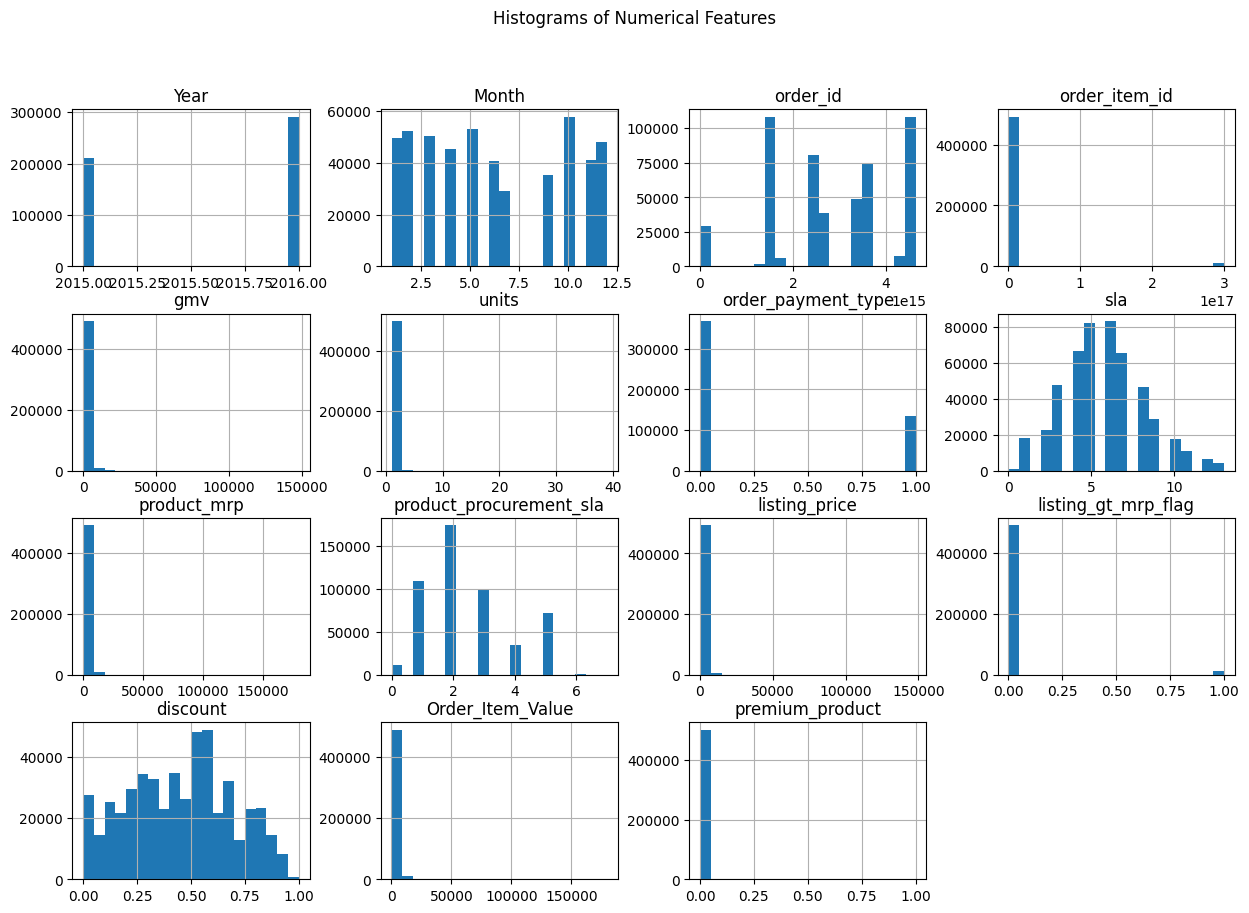

In [111]:
# Histograms for numerical data
numerical_data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

###### Insights

###### 1. Data Timeframe: The 'Year' histogram shows distinct bars around 2015.25, 2015.5, 2015.75, and 2016.0, with the tallest bar at 2016.0, suggesting a significant amount of data comes from the beginning of 2016.

###### 2. Order Size: Most orders seem to contain very few items. The 'order_item_id' histogram shows a very large concentration of values at the lowest point (likely representing orders with just one item), with counts dropping off sharply for subsequent values.

###### 3. Value Distribution: Financial values like 'gmv' (Gross Merchandise Value), 'listing_price', and 'Order_Item_Value' are heavily skewed to the right. This means that most items or orders have relatively low monetary values, while only a small number of items or orders have very high values.

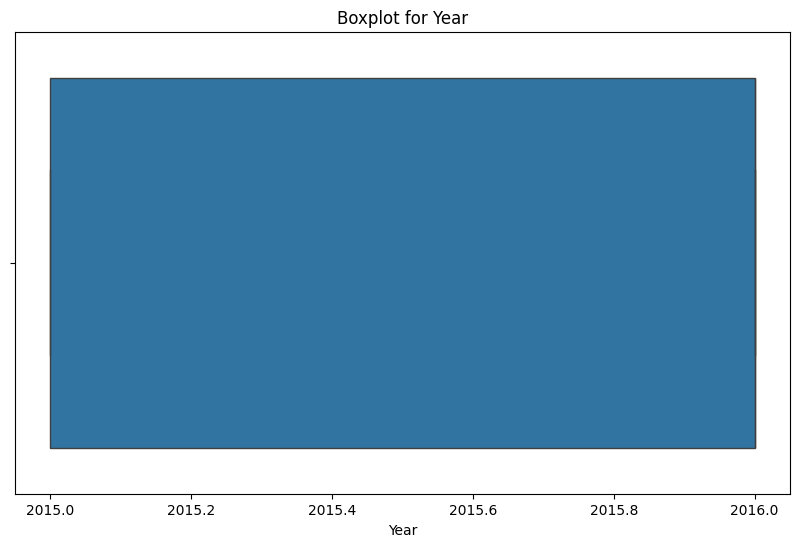

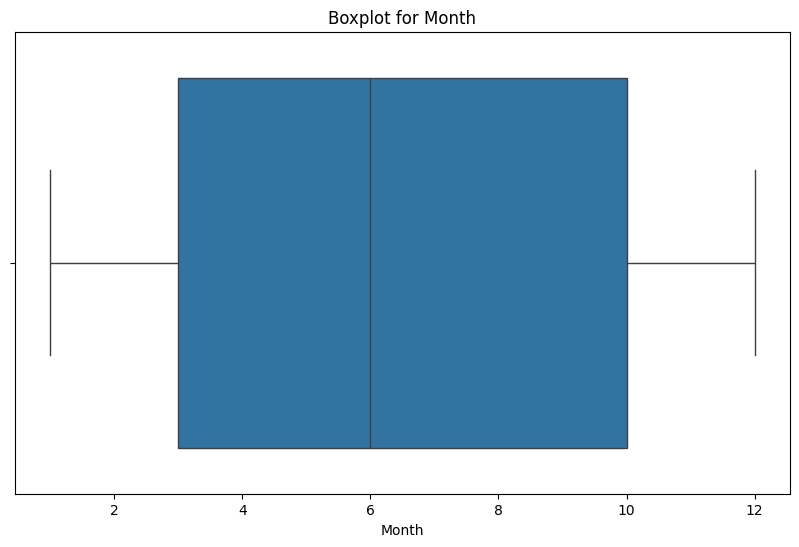

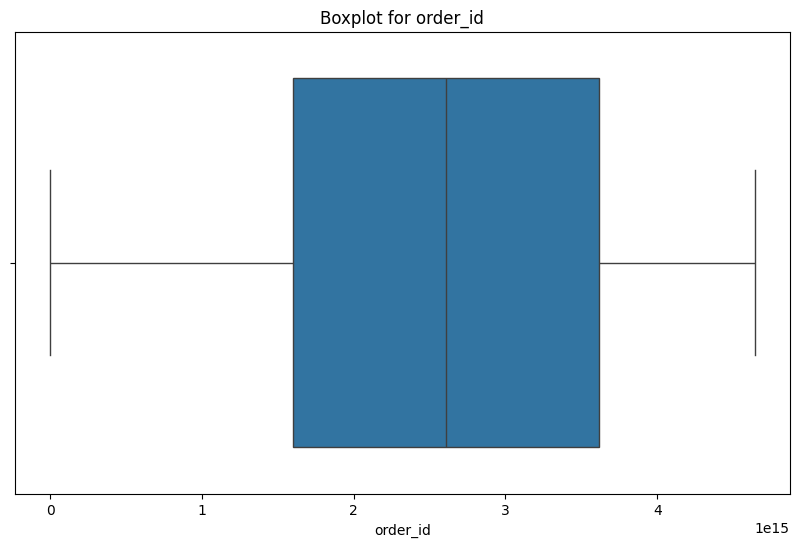

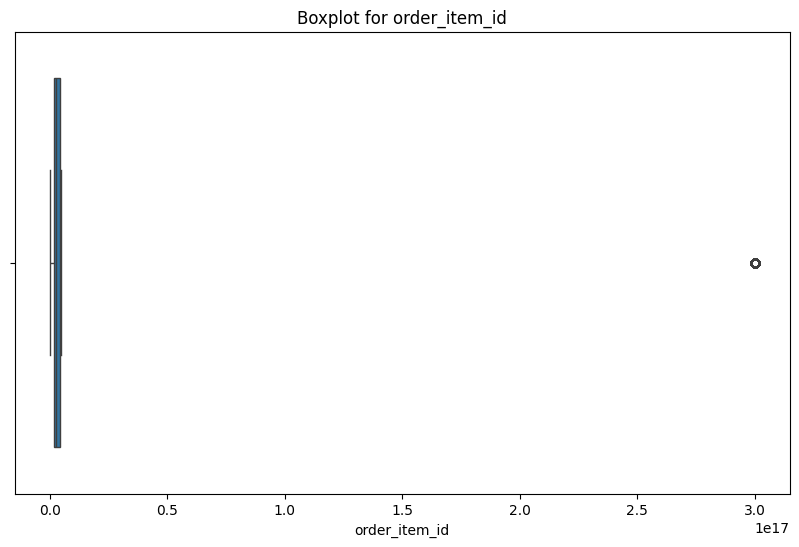

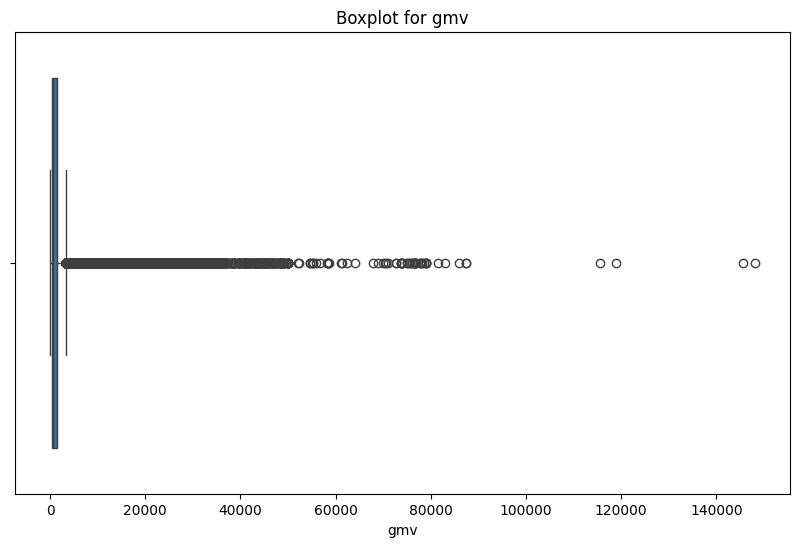

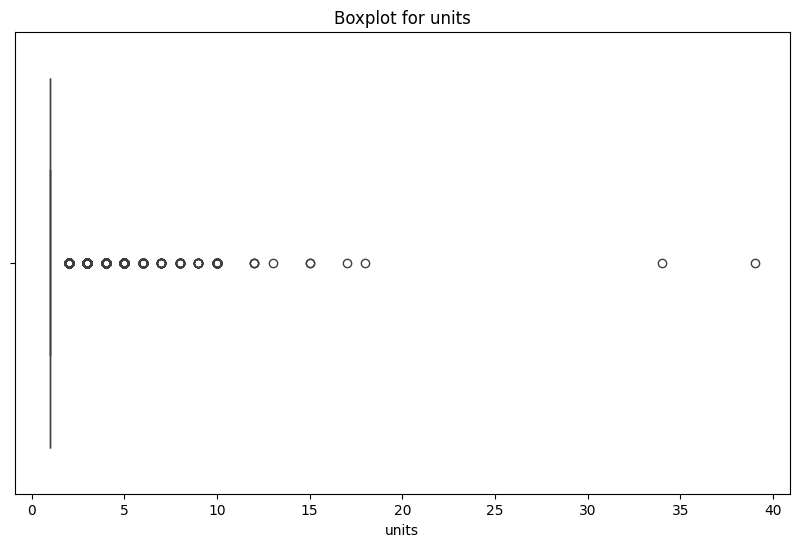

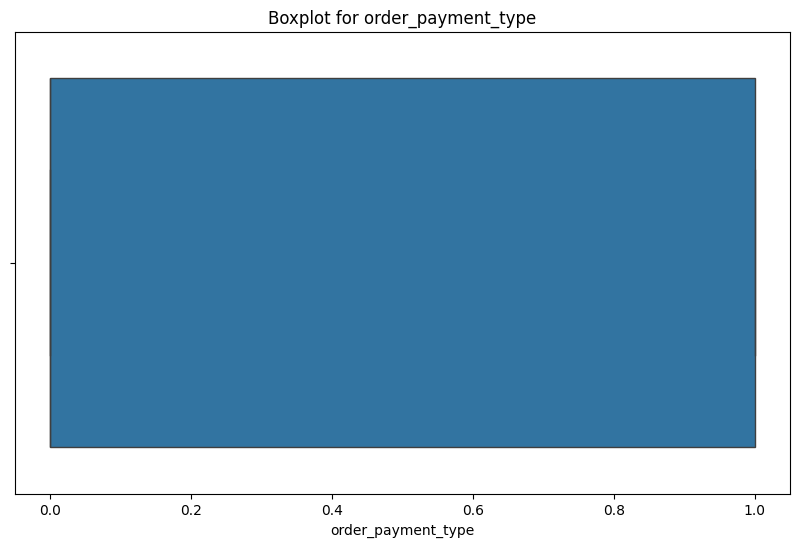

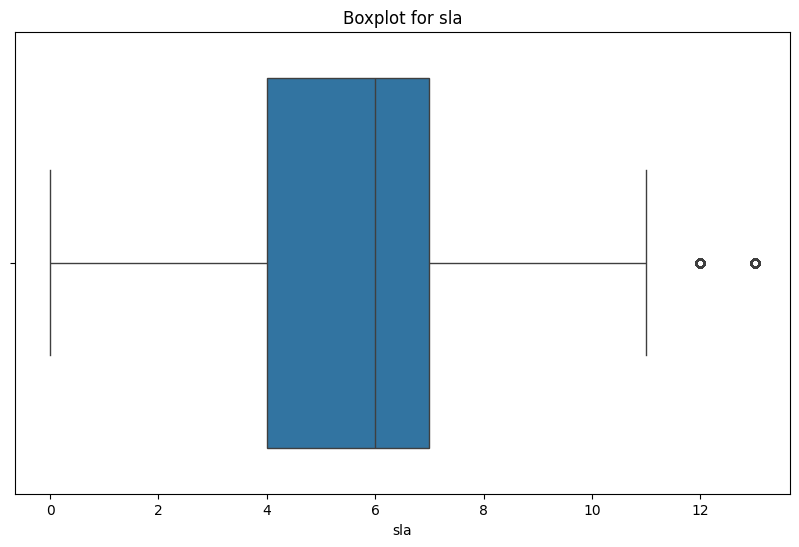

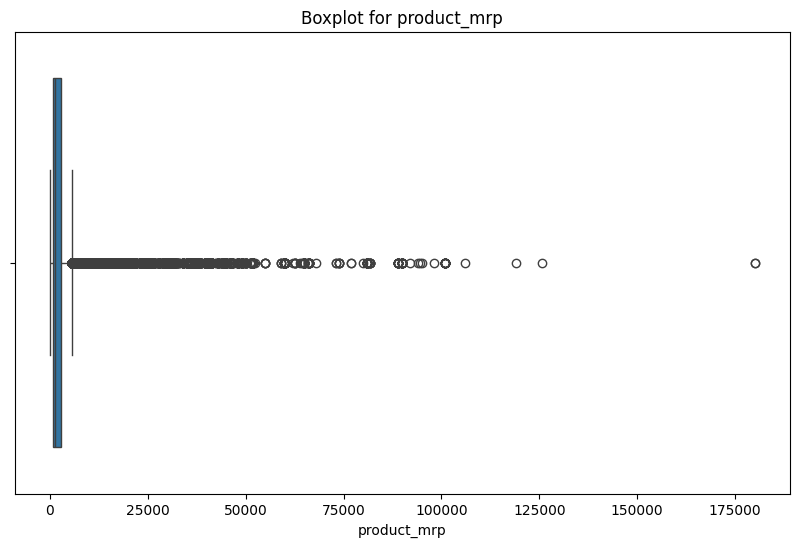

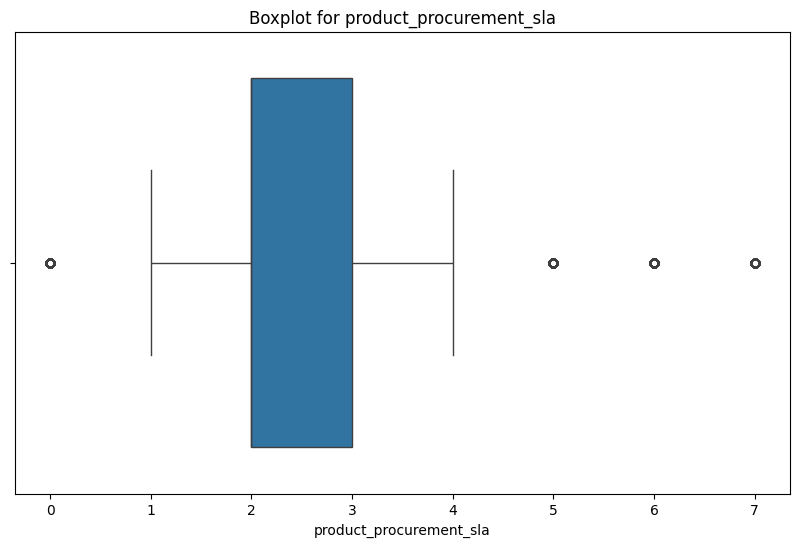

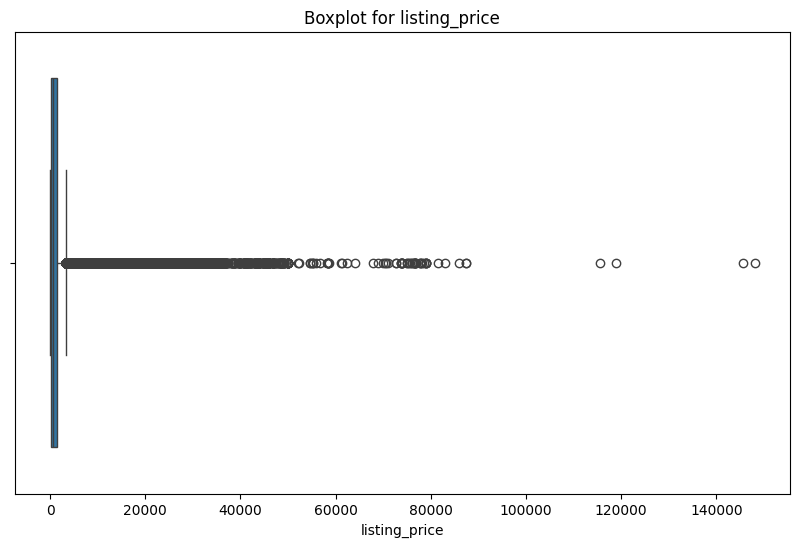

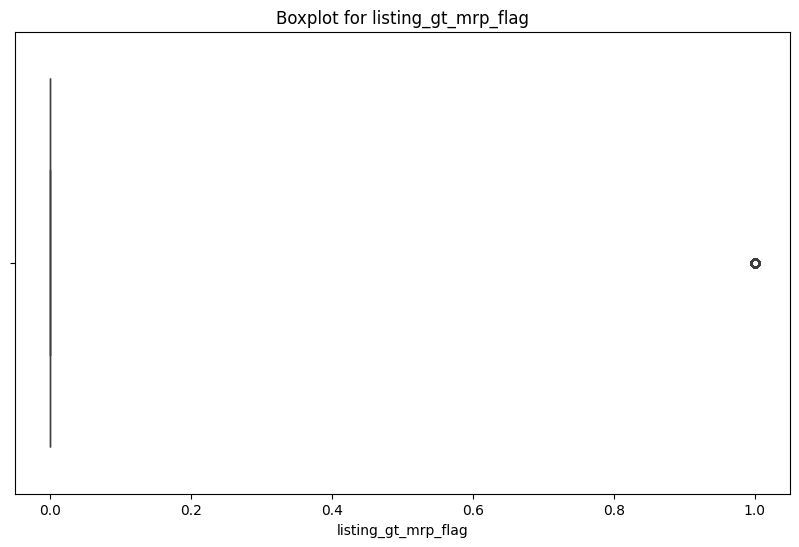

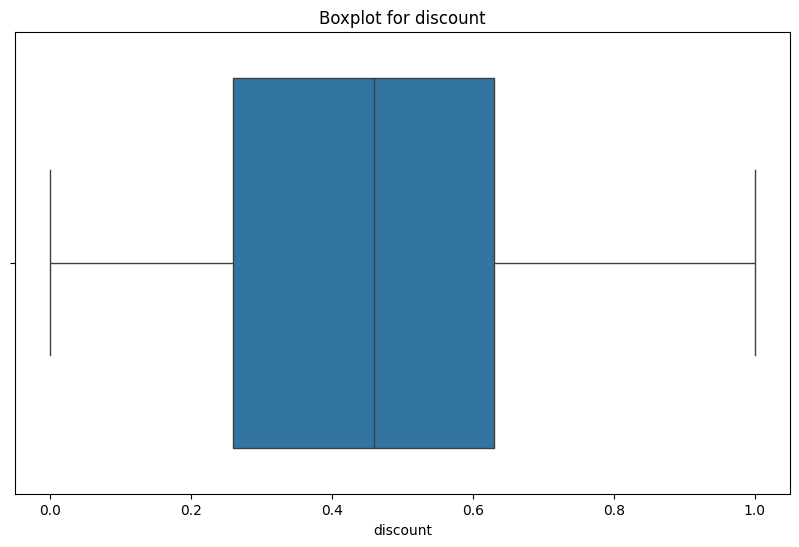

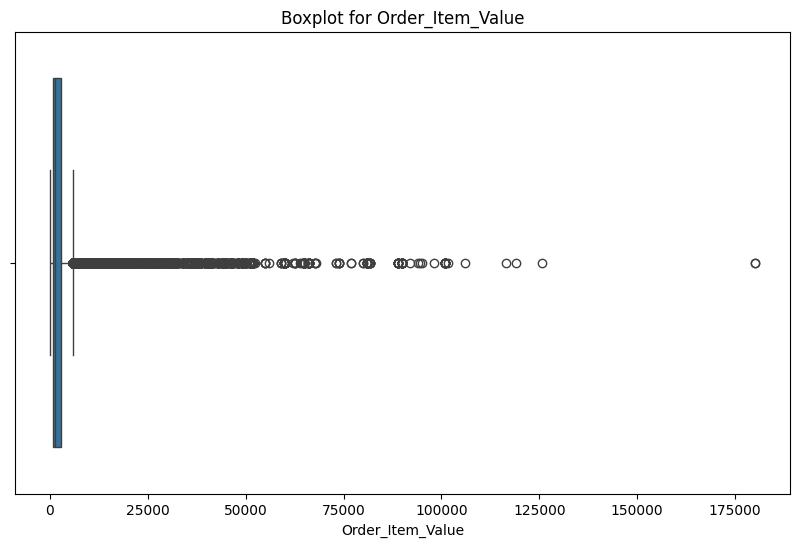

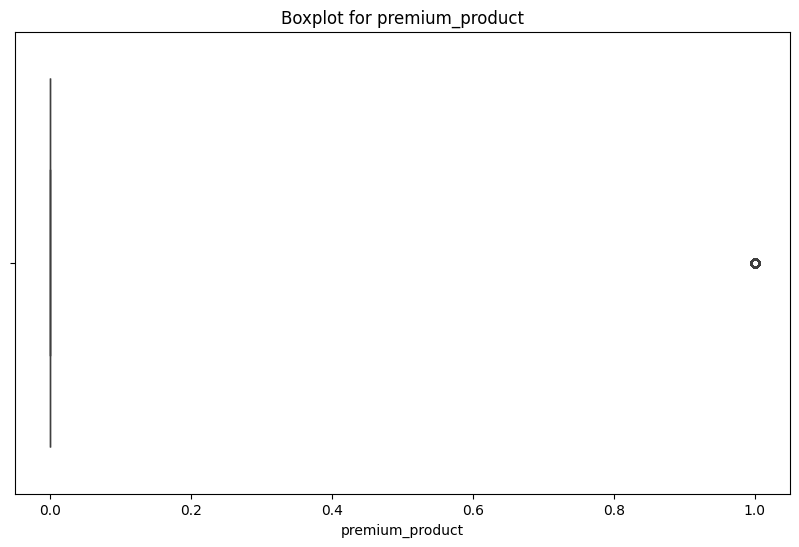

In [112]:
# Plot boxplots for all numerical columns

for col in numerical_data.columns:
    plt.figure(figsize=(10, 6))  # Individual plot size
    sns.boxplot(x=numerical_data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

##### Insights

###### 1. Unit boxplot shows a dataset with a very long right whisker and numerous outliers on the right side, indicating a positively skewed distribution with many high extreme values.

###### 2. The boxplot reveals a right-skewed distribution for 'gmv' with many outliers on the higher end, suggesting some significantly large values.

###### 3. This boxplot for 'order_item_id' shows almost all data concentrated at the lower end with a single, very large outlier.

In [113]:
#  Basic EDA on categorical columns

print("Categorical Columns EDA:")
# Count of unique values
print(categorical_data.nunique())

Categorical Columns EDA:
fsn_id                           8714
product_analytic_category           3
product_analytic_sub_category       3
dtype: int64


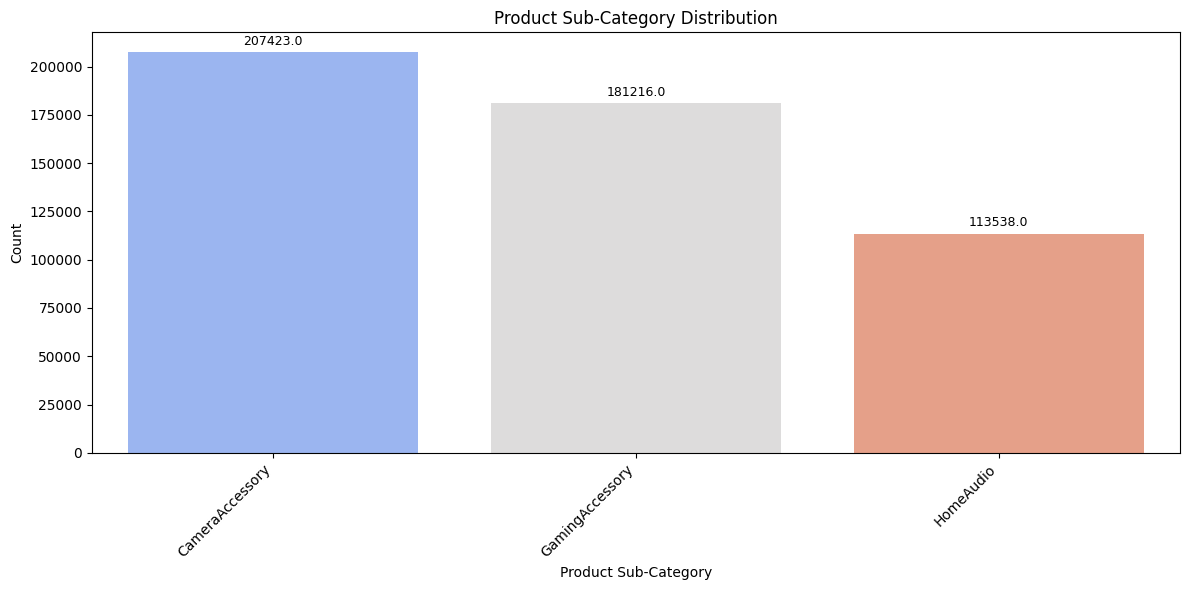

In [114]:
# To understand the subcategory of the products

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=consumer_elec, x='product_analytic_sub_category', palette='coolwarm')
plt.title("Product Sub-Category Distribution")
plt.xlabel("Product Sub-Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.tight_layout()
plt.show()


In [115]:
# We had a column in consumer_elec which was left for flagging the listing price, let us try to visualize it

consumer_elec.listing_gt_mrp_flag.value_counts()

listing_gt_mrp_flag
0    489926
1     12251
Name: count, dtype: int64

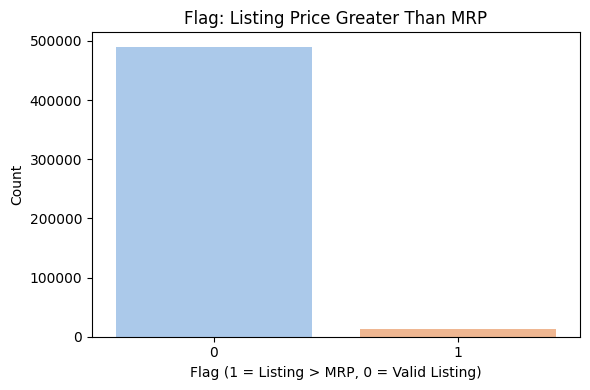

In [116]:
# Count plot for the flag

plt.figure(figsize=(6, 4))
sns.countplot(x='listing_gt_mrp_flag', data=consumer_elec, palette='pastel')
plt.title('Flag: Listing Price Greater Than MRP')
plt.xlabel('Flag (1 = Listing > MRP, 0 = Valid Listing)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [117]:
# Calculating the percentage of flagged listings

flag_percentage = (consumer_elec['listing_gt_mrp_flag'].value_counts(normalize=True)[1]) * 100
print(f"{flag_percentage:.2f}% of listings have a listing price greater than MRP.")

2.44% of listings have a listing price greater than MRP.


#### Pricing sanity check revealed that while the majority of product listings are within expected bounds, approximately X% have their listing price greater than the MRP, which is considered a red flag for potential pricing errors or system inconsistencies.

In [118]:
# Checking out the Ontario Climate data for visualization

ontario_climate.columns

Index(['Date', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)', 'week', 'sSnow on Grnd (cm)'], dtype='object')

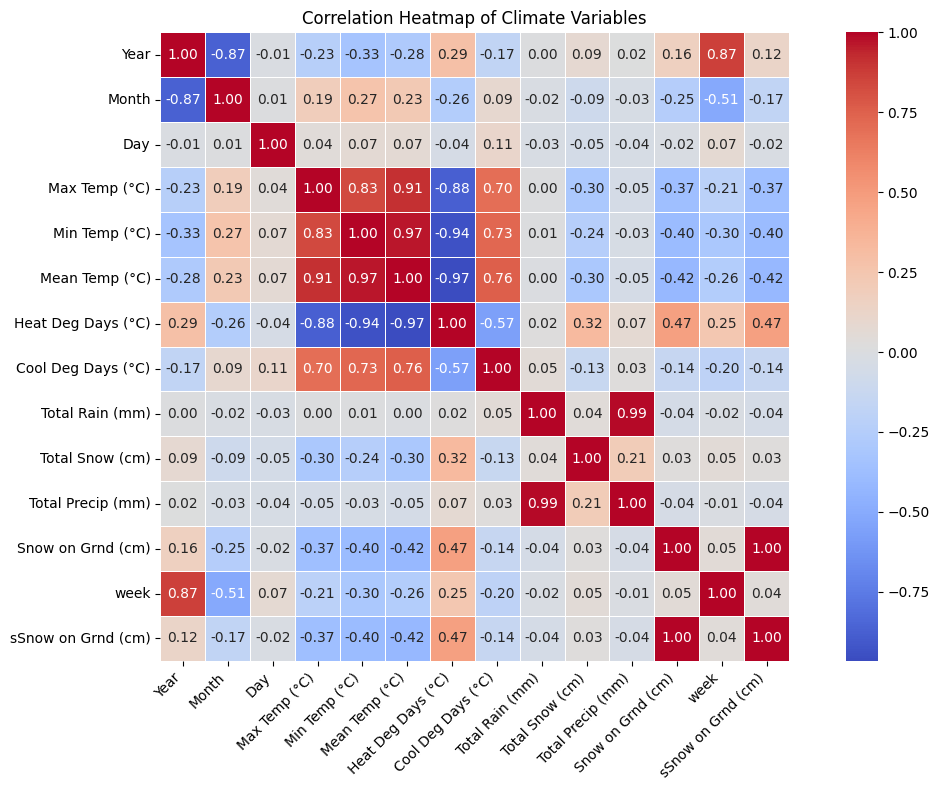

In [119]:
# Checking the correlation between the numerical aspects of the climate data

# Selecting only the numerical columns for correlation
climate_numerical = ontario_climate.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = climate_numerical.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
plt.title("Correlation Heatmap of Climate Variables")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

###### Insight

##### Temperature measures are highly correlated, while heat degree days show an inverse relationship. Cool degree days behave oppositely to heat degree days and are positively linked to temperature. Precipitation types are positively correlated, and snow variables are strongly related. Time variables generally have weak correlations, except for a moderate negative correlation between month and temperature, indicating seasonality.

##### All total it can be said that the heatmap highlights strong relationships between different temperature measures, the opposing behavior of heating and cooling degree days, the interconnectedness of precipitation types, and the correlation between snow-related variables. Time-based variables show weaker linear relationships with the climate factors.

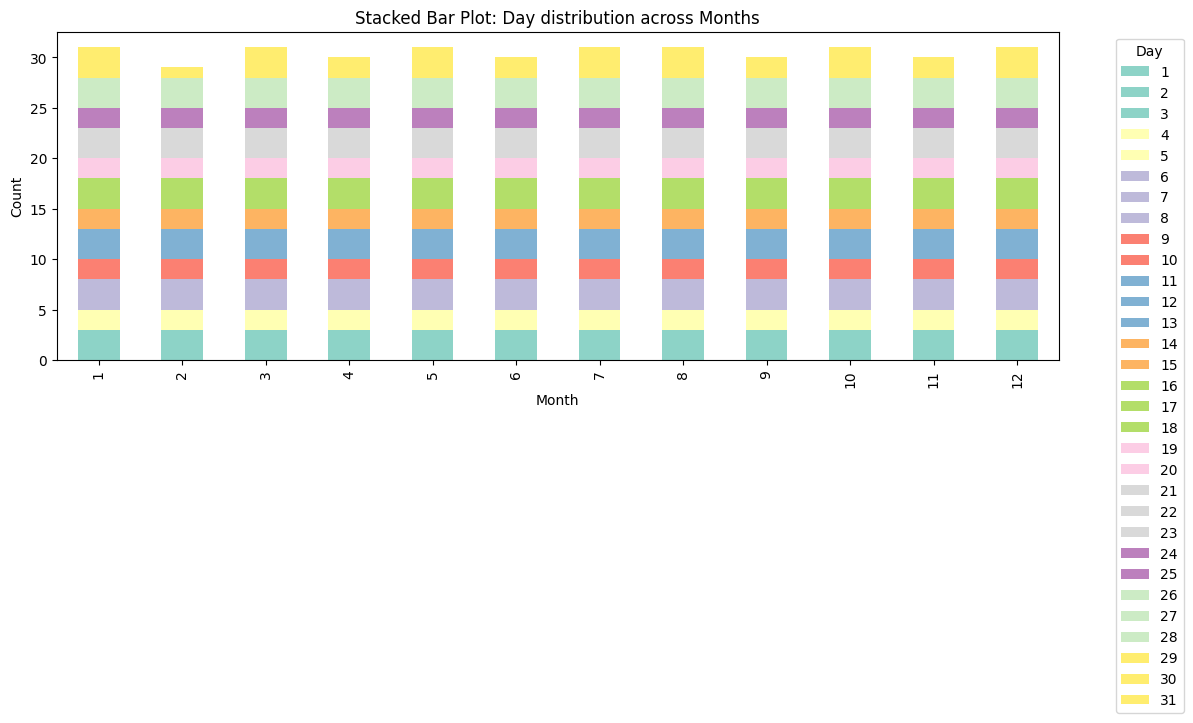

In [120]:
# Stacked bar plot for showing the categorical columns

cross_tab = pd.crosstab(ontario_climate['Month'], ontario_climate['Day'])

cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Stacked Bar Plot: Day distribution across Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


###### Insights

##### Monthly totals appear consistent, indicating a relatively even distribution of data points across the year.

##### The contribution of specific days within each month varies, suggesting non-uniform occurrences throughout the month.

##### The presence or absence of top segments (days 29-31) visually confirms the differing number of days in each month, aligning with the calendar structure.

In [121]:
# Checking nps_score dataset for any insight

nps_score.columns

Index(['NPS', 'Stock_Index', 'Month', 'Year'], dtype='object')

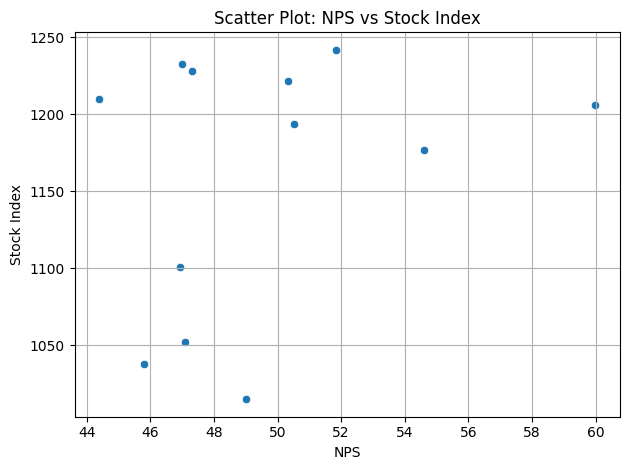

In [122]:

# Let us draw a scatterplot to understand the data distrubution, relationship among the columns and visualization

sns.scatterplot(x=nps_score['NPS'], y=nps_score['Stock_Index'])
plt.title('Scatter Plot: NPS vs Stock Index')
plt.xlabel('NPS')
plt.ylabel('Stock Index')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Insights

##### The scatter plot shows the relationship between NPS (Net Promoter Score) and the Stock Index. There doesn't appear to be a strong linear correlation between the two variables. Some instances of high NPS correspond with both high and moderate stock index values, and similarly for lower NPS values. This suggests that the stock index is likely influenced by factors beyond just the Net Promoter Score.

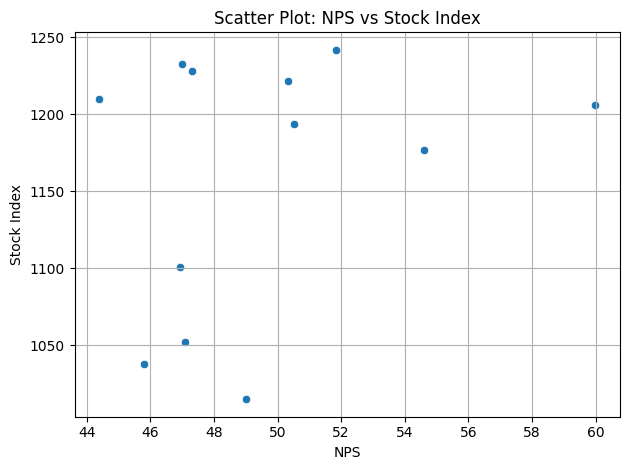

In [123]:
# Understanding the relationship between NPS and Stock dataset

sns.scatterplot(x='NPS', y='Stock_Index', data=nps_score)
plt.title('Scatter Plot: NPS vs Stock Index')
plt.xlabel('NPS')
plt.ylabel('Stock Index')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Insights

##### We can see that there is not a strong linear relationship between the Net Promoter Score (NPS) and the Stock Index. The data points are scattered across the graph without a clear upward or downward trend. This suggests that changes in NPS may not be a reliable predictor of changes in the Stock Index, and vice versa, based on this limited dataset.

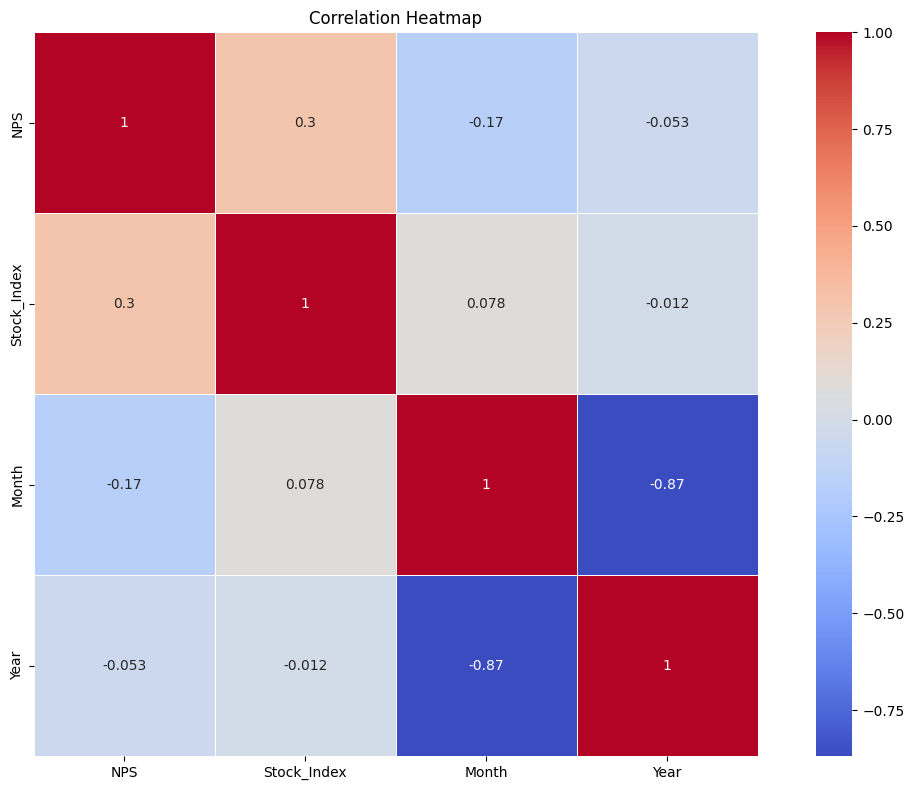

In [124]:
# Let us try correlation

# Extracting numerical columns
numerical_data = nps_score.select_dtypes(include='number')

# Calculating the correlation matrix
corr_matrix = numerical_data.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

##### Insight

##### The heatmap reveals a few interesting correlations. NPS and Stock Index show a weak positive correlation (0.3). Month and Year exhibit a strong negative correlation (-0.87), which is expected as the year progresses, the month number increases. Other correlations are quite weak. Overall, this suggests that while NPS and the Stock Index have a slightly positive relationship, the month and year are strongly inversely related, and other variable pairs show little linear association.

In [125]:
# Let us check out the final dataframe 'Marketing' to squeeze out a few insights before we move to the MMM creation

marketing.columns

Index(['Year', 'Month', 'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other', 'Adstocked_Advertising', 'TV_ads', 'Digital_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'Affiliates_ads', 'SEM_ads', 'Radio_ads', 'Other_ads'], dtype='object')

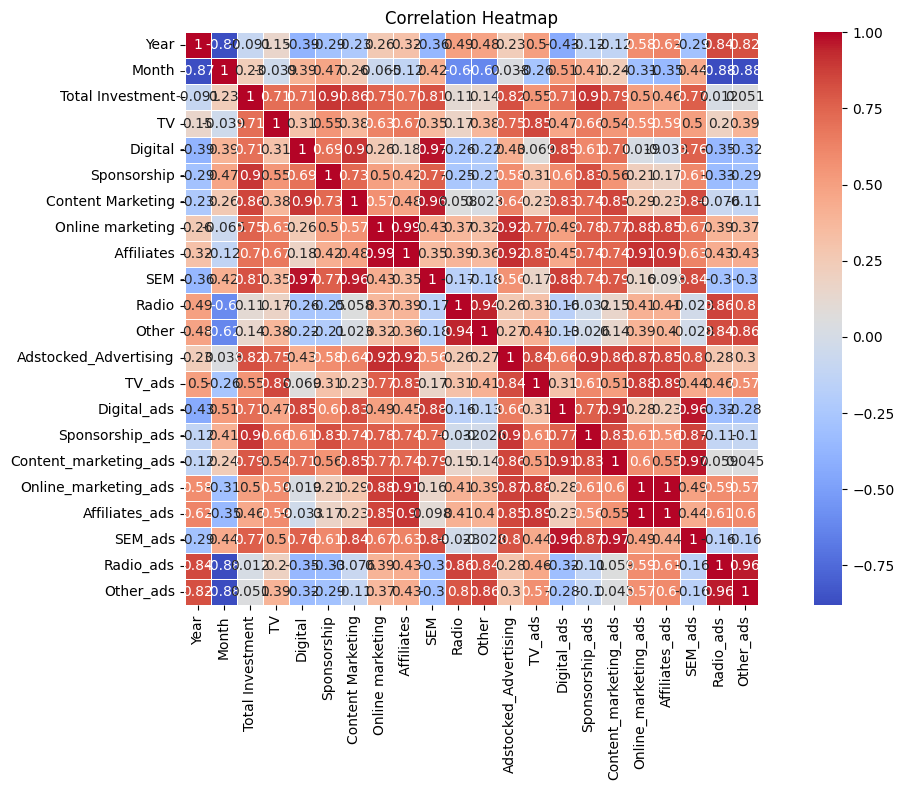

In [126]:
# Let us try correlation

# Extracting numerical columns
numerical_data = marketing.select_dtypes(include='number')

# Calculating the correlation matrix
corr_matrix = numerical_data.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

##### Insights

##### There is a very strong positive correlation within the advertising categories (TV, Digital, Sponsorship, etc.), which makes sense as they often move together in campaigns. Interestingly, 'Year' shows a moderate positive correlation with 'Total Investment' (0.8), suggesting increasing investment over time. Conversely, 'Year' has strong negative correlations with 'Radio' and 'Other' advertising, indicating a potential shift away from these channels. Most other correlations appear relatively weak, implying limited linear relationships between those variables.

#### Moving to Marketing Mix Model where we can work more on EDA after dividing them into the product types for detailed insights

### Camera Accesory

In [127]:
camera_df = consumer_elec[consumer_elec['product_analytic_sub_category'] == 'CameraAccessory']

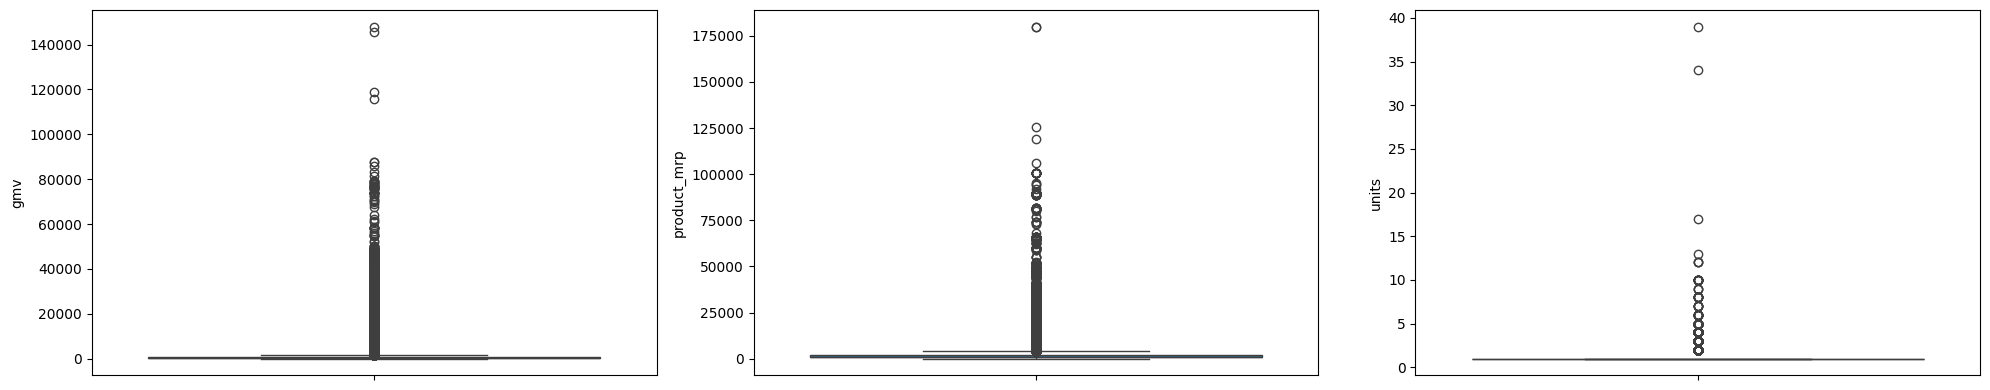

In [128]:
# Removing outliers is important as there maybe some unnecessary values and
# bulk orders can skew our analysis %%

fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(camera_df['gmv'], ax = axs[0])
plt2 = sns.boxplot(camera_df['units'], ax = axs[2])
plt4 = sns.boxplot(camera_df['product_mrp'], ax = axs[1])
plt.tight_layout()

In [129]:
# Define a function to remove outliers using IQR
def remove_outliers(camera_df, column):
    Q1 = camera_df[column].quantile(0.25)
    Q3 = camera_df[column].quantile(0.75)
    IQR = Q3 - Q1
    return camera_df[(camera_df[column] >= Q1 - 1.5 * IQR) & (camera_df[column] <= Q3 + 1.5 * IQR)]

# Apply the function to the columns
camera_df = remove_outliers(camera_df, 'gmv')
camera_df = remove_outliers(camera_df, 'product_mrp')

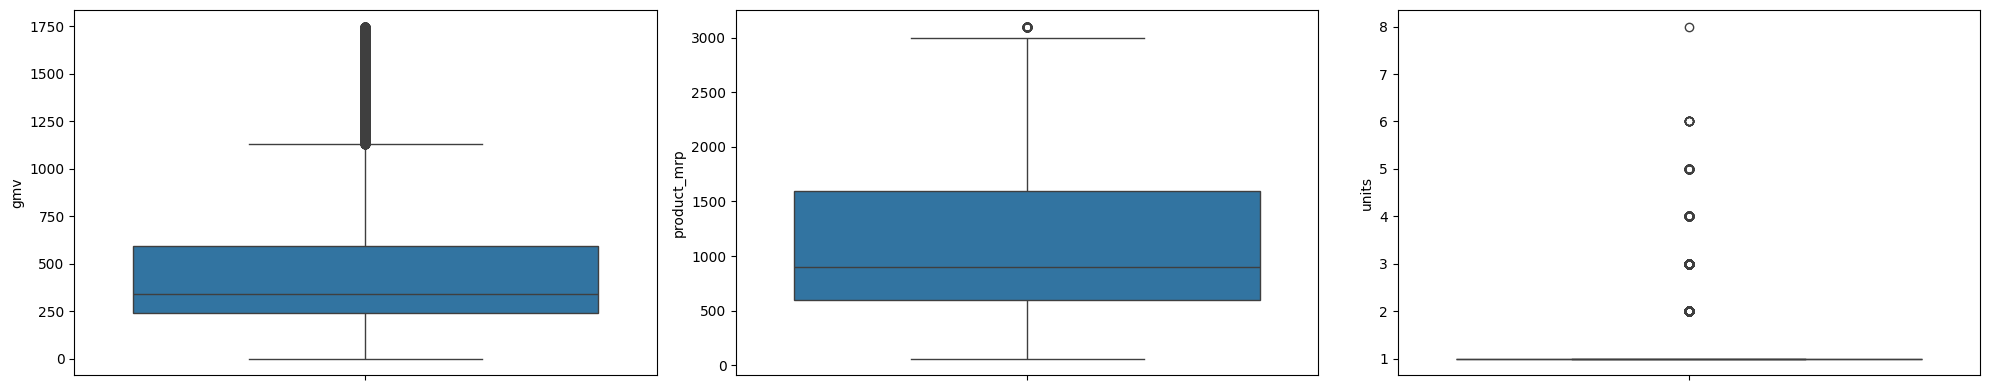

In [130]:
### Outlier Visualization

fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(camera_df['gmv'], ax = axs[0])
plt2 = sns.boxplot(camera_df['units'], ax = axs[2])
plt4 = sns.boxplot(camera_df['product_mrp'], ax = axs[1])
plt.tight_layout()
plt.show()

In [131]:
# Aggregating camera data at the weekly level

ca_week = camera_df.groupby('week').agg({
    'gmv': 'sum',
    'listing_price': 'mean',
    'product_mrp': 'mean',
    'discount': 'mean',
    'sla': 'mean',
    'product_procurement_sla': 'mean',
    'fsn_id': 'nunique',
    'order_item_id': 'nunique',
    'order_id': 'nunique',
    'order_payment_type': 'sum',
    'premium_product': 'sum'
}).reset_index()

In [132]:
ca_week.head(2)

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type  premium_product
0     1   11151.000        428.885     1115.038     0.491 2.423                    2.731      20             26        26                  26                0
1     2 1160259.000        504.230     1016.201     0.452 6.853                    2.549     527           2246      2208                 715                0

In [133]:
# Finding out AOV = Average Order Value, which is a key metric in E-Commerce to value each order is contributing on average.
# Also if customers are buying more per order Sum of GMV / No of unique Orders

ca_week['AOV'] = ca_week['gmv']/ca_week['order_id']

In [134]:
ca_week['online_order_perc'] = ca_week['order_payment_type']*100/ca_week['order_item_id']

In [135]:
ca_week.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 80], dtype=uint32)

In [136]:
calendar.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53], dtype=uint32)

In [137]:
ca_week['week'] = ca_week['week'].astype(str)
calendar['week'] = calendar['week'].astype(str)

ca_week = ca_week.merge(calendar, how='left', on='week')

In [138]:
# First, create a dummy date (like 1st of the month)

marketing['Date'] = pd.to_datetime(marketing['Year'].astype(str) + '-' + marketing['Month'].astype(str) + '-01')

# Then, extract week

marketing['week'] = marketing['Date'].dt.strftime('%Y-%U')

In [139]:
marketing['week'] = marketing['week'].astype(str)
ca_week['week'] = ca_week['week'].astype(str)

ca_week = ca_week.merge(marketing, how='left', on='week')

In [140]:
ca_week.head(2)

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type  premium_product     AOV  online_order_perc  index    NPS  Stock_Index  Special_sales  Payday  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  Year  Month  Total Investment  TV  Digital  Sponsorship  Content Marketing  Online marketing   Affiliates  SEM  Radio  Other  Adstocked_Advertising  TV_ads  Digital_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads  Affiliates_ads  SEM_ads  Radio_ads  Other_ads Date
0    1   11151.000        428.885     1115.038     0.491 2.423                    2.731      20             26        26                  26                0 428.885            100.000  0.000 54.600     1177.000          0.000   0.200         25.500         13.200          19.360               0.100               1.460            0.000            0.000              0.000              0.000   NaN    NaN               NaN NaN      NaN          NaN                NaN               NaN          NaN  NaN    NaN    NaN                    NaN     NaN          NaN              NaN                    NaN                   NaN             NaN      NaN        NaN        NaN  NaT
1    2 1160259.000        504.230     1016.201     0.452 6.853                    2.549     527           2246      2208                 715                0 525.480             31.834  1.000 54.600     1177.000          0.000   0.000         24.025         14.385          19.263               1.059               2.322            4.155            0.029              4.184              0.000   NaN    NaN               NaN NaN      NaN          NaN                NaN               NaN          NaN  NaN    NaN    NaN                    NaN     NaN          NaN              NaN                    NaN                   NaN             NaN      NaN        NaN        NaN  NaT

In [141]:
ca_week_viz = ca_week.round(2)

<Axes: xlabel='gmv', ylabel='Density'>

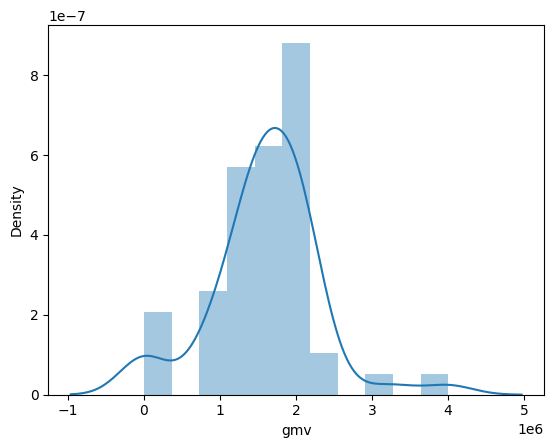

In [142]:
# Target Variable

sns.distplot(ca_week_viz['gmv'],kde=True)

#### Insights

#### Right Skew: The data is skewed to the right, indicating most 'gmv' values are lower, with fewer occurrences of higher values.

#### Modal Peak: There's a prominent peak around 2 million, suggesting this is the most frequent 'gmv' value.

#### Multiple Clusters: Smaller bumps hint at potential sub-groups or modes within the overall distribution.

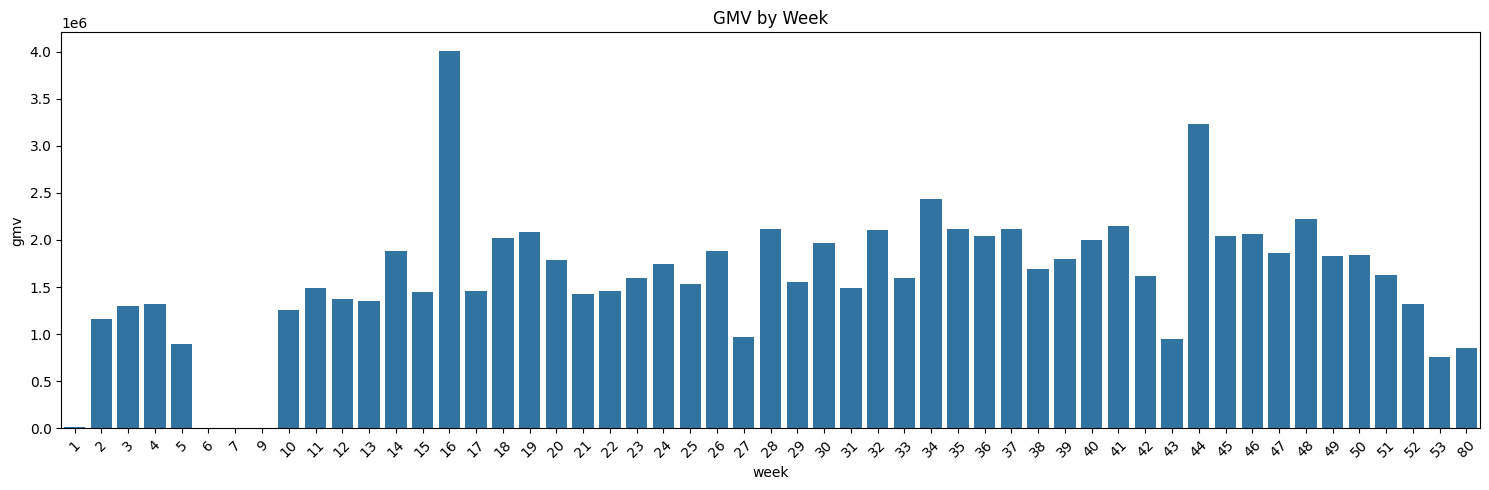

In [143]:
plt.figure(figsize=(15, 5))
sns.barplot(x='week', y='gmv', data=ca_week_viz)
plt.xticks(rotation=45)
plt.title("GMV by Week")
plt.tight_layout()
plt.show()

#### Insights

#### Spikes in GMV: Week 16 and Week 44 show significant spikes, indicating potential promotions, campaigns, or seasonal events driving high sales.

#### Mid-Year Stability: From Week 18 to 40, GMV appears relatively stable, suggesting consistent performance during the mid-year period.

#### End-Year Dip: Weeks 50 onwards show a noticeable decline, which could be due to seasonality, low campaign activity, or inventory issues.

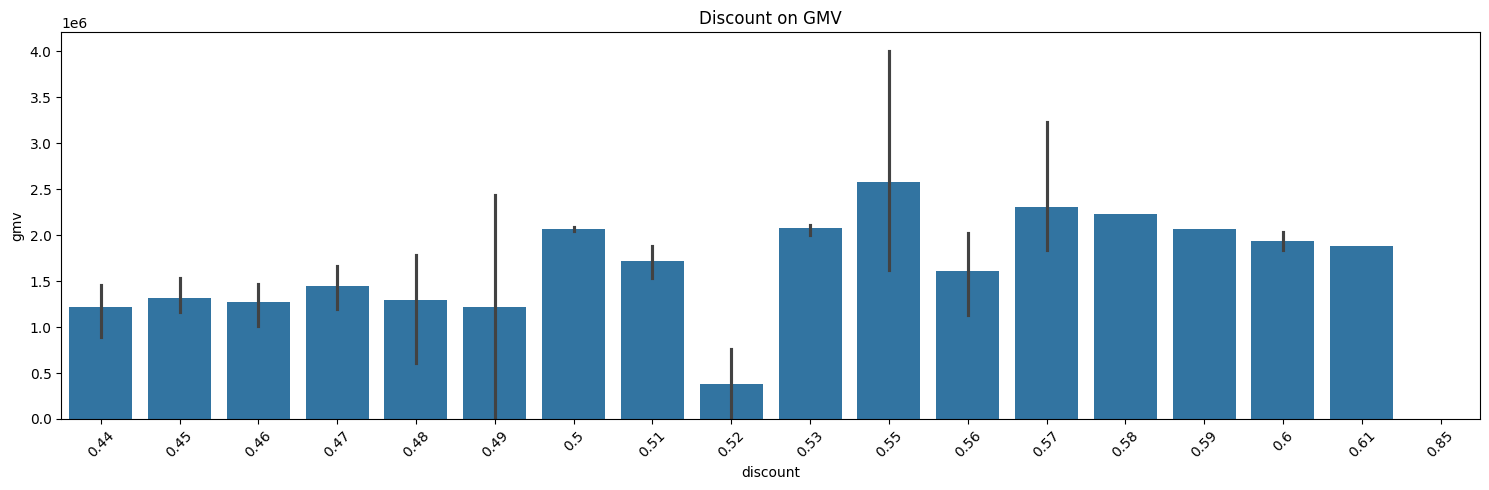

In [144]:
plt.figure(figsize=(15, 5))
sns.barplot(x='discount', y='gmv', data=ca_week_viz)
plt.xticks(rotation=45)
plt.title("Discount on GMV")
plt.tight_layout()
plt.show()

#### Insight

#### Variable Impact: The average GMV varies significantly across different discount levels. Some discount percentages (e.g., around 0.55) appear to correlate with higher average GMV, while others (e.g., 0.52) show a much lower average.

#### Volatility at Higher Discounts: The error bars, representing the variability or standard deviation, seem larger at some of the higher discount levels (like 0.55 and 0.57). This suggests that while the average GMV might be higher, the GMV values are also more spread out at these discount rates.

#### Non-Linear Relationship: The relationship between discount and GMV isn't strictly linear. Increasing the discount doesn't consistently lead to higher or lower GMV. There seems to be an optimal range or specific discount points that yield better GMV performance than others.

In [145]:
# Moving Averarage for Camera Accessory

# Moving Average for listing_price and discount

ca_week[['MA2_LP','MA2_Discount']] = ca_week[['listing_price','discount']].rolling(window=2,min_periods=1).mean()
ca_week[['MA3_LP','MA3_Discount']] = ca_week[['listing_price','discount']].rolling(window=3,min_periods=1).mean()
ca_week[['MA4_LP','MA4_Discount']] = ca_week[['listing_price','discount']].rolling(window=4,min_periods=1).mean()

In [146]:
# Referencing listed price Inflation

ca_week['MA2_listed_price'] = (ca_week['listing_price']-ca_week['MA2_LP'])/ca_week['MA2_LP']
ca_week['MA3_listed_price'] = (ca_week['listing_price']-ca_week['MA3_LP'])/ca_week['MA3_LP']
ca_week['MA4_listed_price'] = (ca_week['listing_price']-ca_week['MA4_LP'])/ca_week['MA4_LP']

In [147]:
### Referencing discount Inflation

ca_week['MA2_discount_offer'] = (ca_week['discount']-ca_week['MA2_Discount'])/ca_week['MA2_Discount']
ca_week['MA3_discount_offer'] = (ca_week['discount']-ca_week['MA3_Discount'])/ca_week['MA3_Discount']
ca_week['MA4_discount_offer'] = (ca_week['discount']-ca_week['MA4_Discount'])/ca_week['MA4_Discount']

In [148]:
ca_week.drop(['MA2_LP','MA3_LP','MA4_LP','MA2_Discount','MA3_Discount','MA4_Discount'], axis = 1, inplace = True)
ca_week.head(2)

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type  premium_product     AOV  online_order_perc  index    NPS  Stock_Index  Special_sales  Payday  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  Year  Month  Total Investment  TV  Digital  Sponsorship  Content Marketing  Online marketing   Affiliates  SEM  Radio  Other  Adstocked_Advertising  TV_ads  Digital_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads  Affiliates_ads  SEM_ads  Radio_ads  Other_ads Date  MA2_listed_price  MA3_listed_price  MA4_listed_price  MA2_discount_offer  MA3_discount_offer  MA4_discount_offer
0    1   11151.000        428.885     1115.038     0.491 2.423                    2.731      20             26        26                  26                0 428.885            100.000  0.000 54.600     1177.000          0.000   0.200         25.500         13.200          19.360               0.100               1.460            0.000            0.000              0.000              0.000   NaN    NaN               NaN NaN      NaN          NaN                NaN               NaN          NaN  NaN    NaN    NaN                    NaN     NaN          NaN              NaN                    NaN                   NaN             NaN      NaN        NaN        NaN  NaT             0.000             0.000             0.000               0.000               0.000               0.000
1    2 1160259.000        504.230     1016.201     0.452 6.853                    2.549     527           2246      2208                 715                0 525.480             31.834  1.000 54.600     1177.000          0.000   0.000         24.025         14.385          19.263               1.059               2.322            4.155            0.029              4.184              0.000   NaN    NaN               NaN NaN      NaN          NaN                NaN               NaN          NaN  NaN    NaN    NaN                    NaN     NaN          NaN              NaN                    NaN                   NaN             NaN      NaN        NaN        NaN  NaT             0.081             0.081             0.081              -0.041              -0.041              -0.041

In [149]:
# Filling the NaN's for even distribution of data

ca_week.fillna(0, inplace=True)

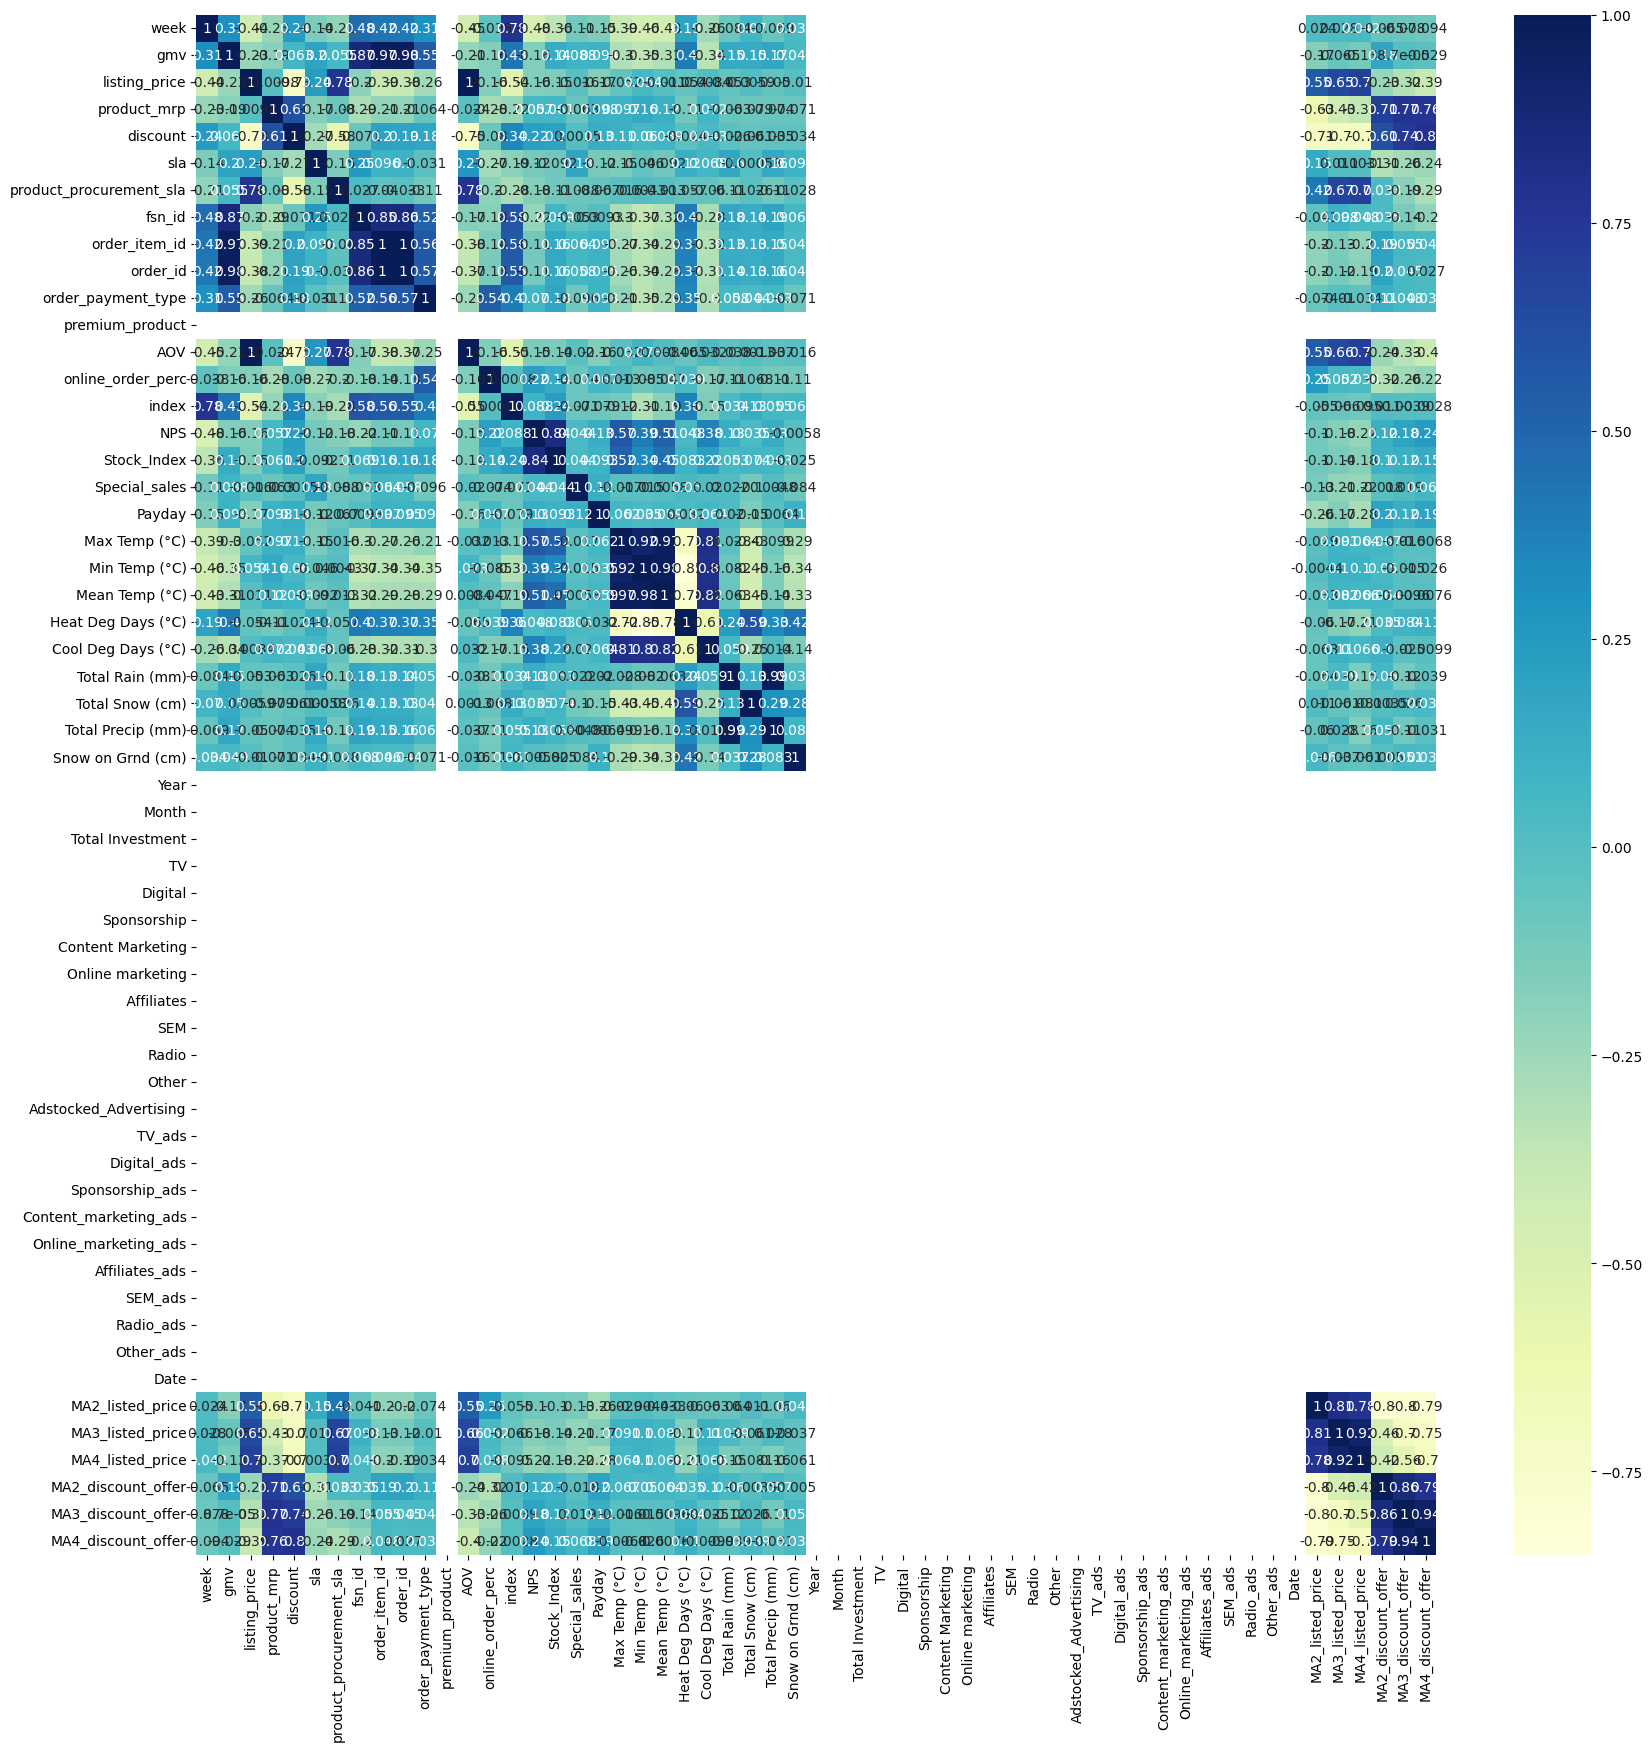

In [150]:
# ### To identify multicollinearity between variable
plt.figure(figsize=(20,20))
sns.heatmap(ca_week.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [151]:
### Highly Correlated Columns should be dropped

ca_week.drop(['TV', 'Digital', 'Sponsorship', 'Content Marketing','Online marketing', ' Affiliates', 'SEM','Radio',
              'Other'], axis = 1, inplace = True)

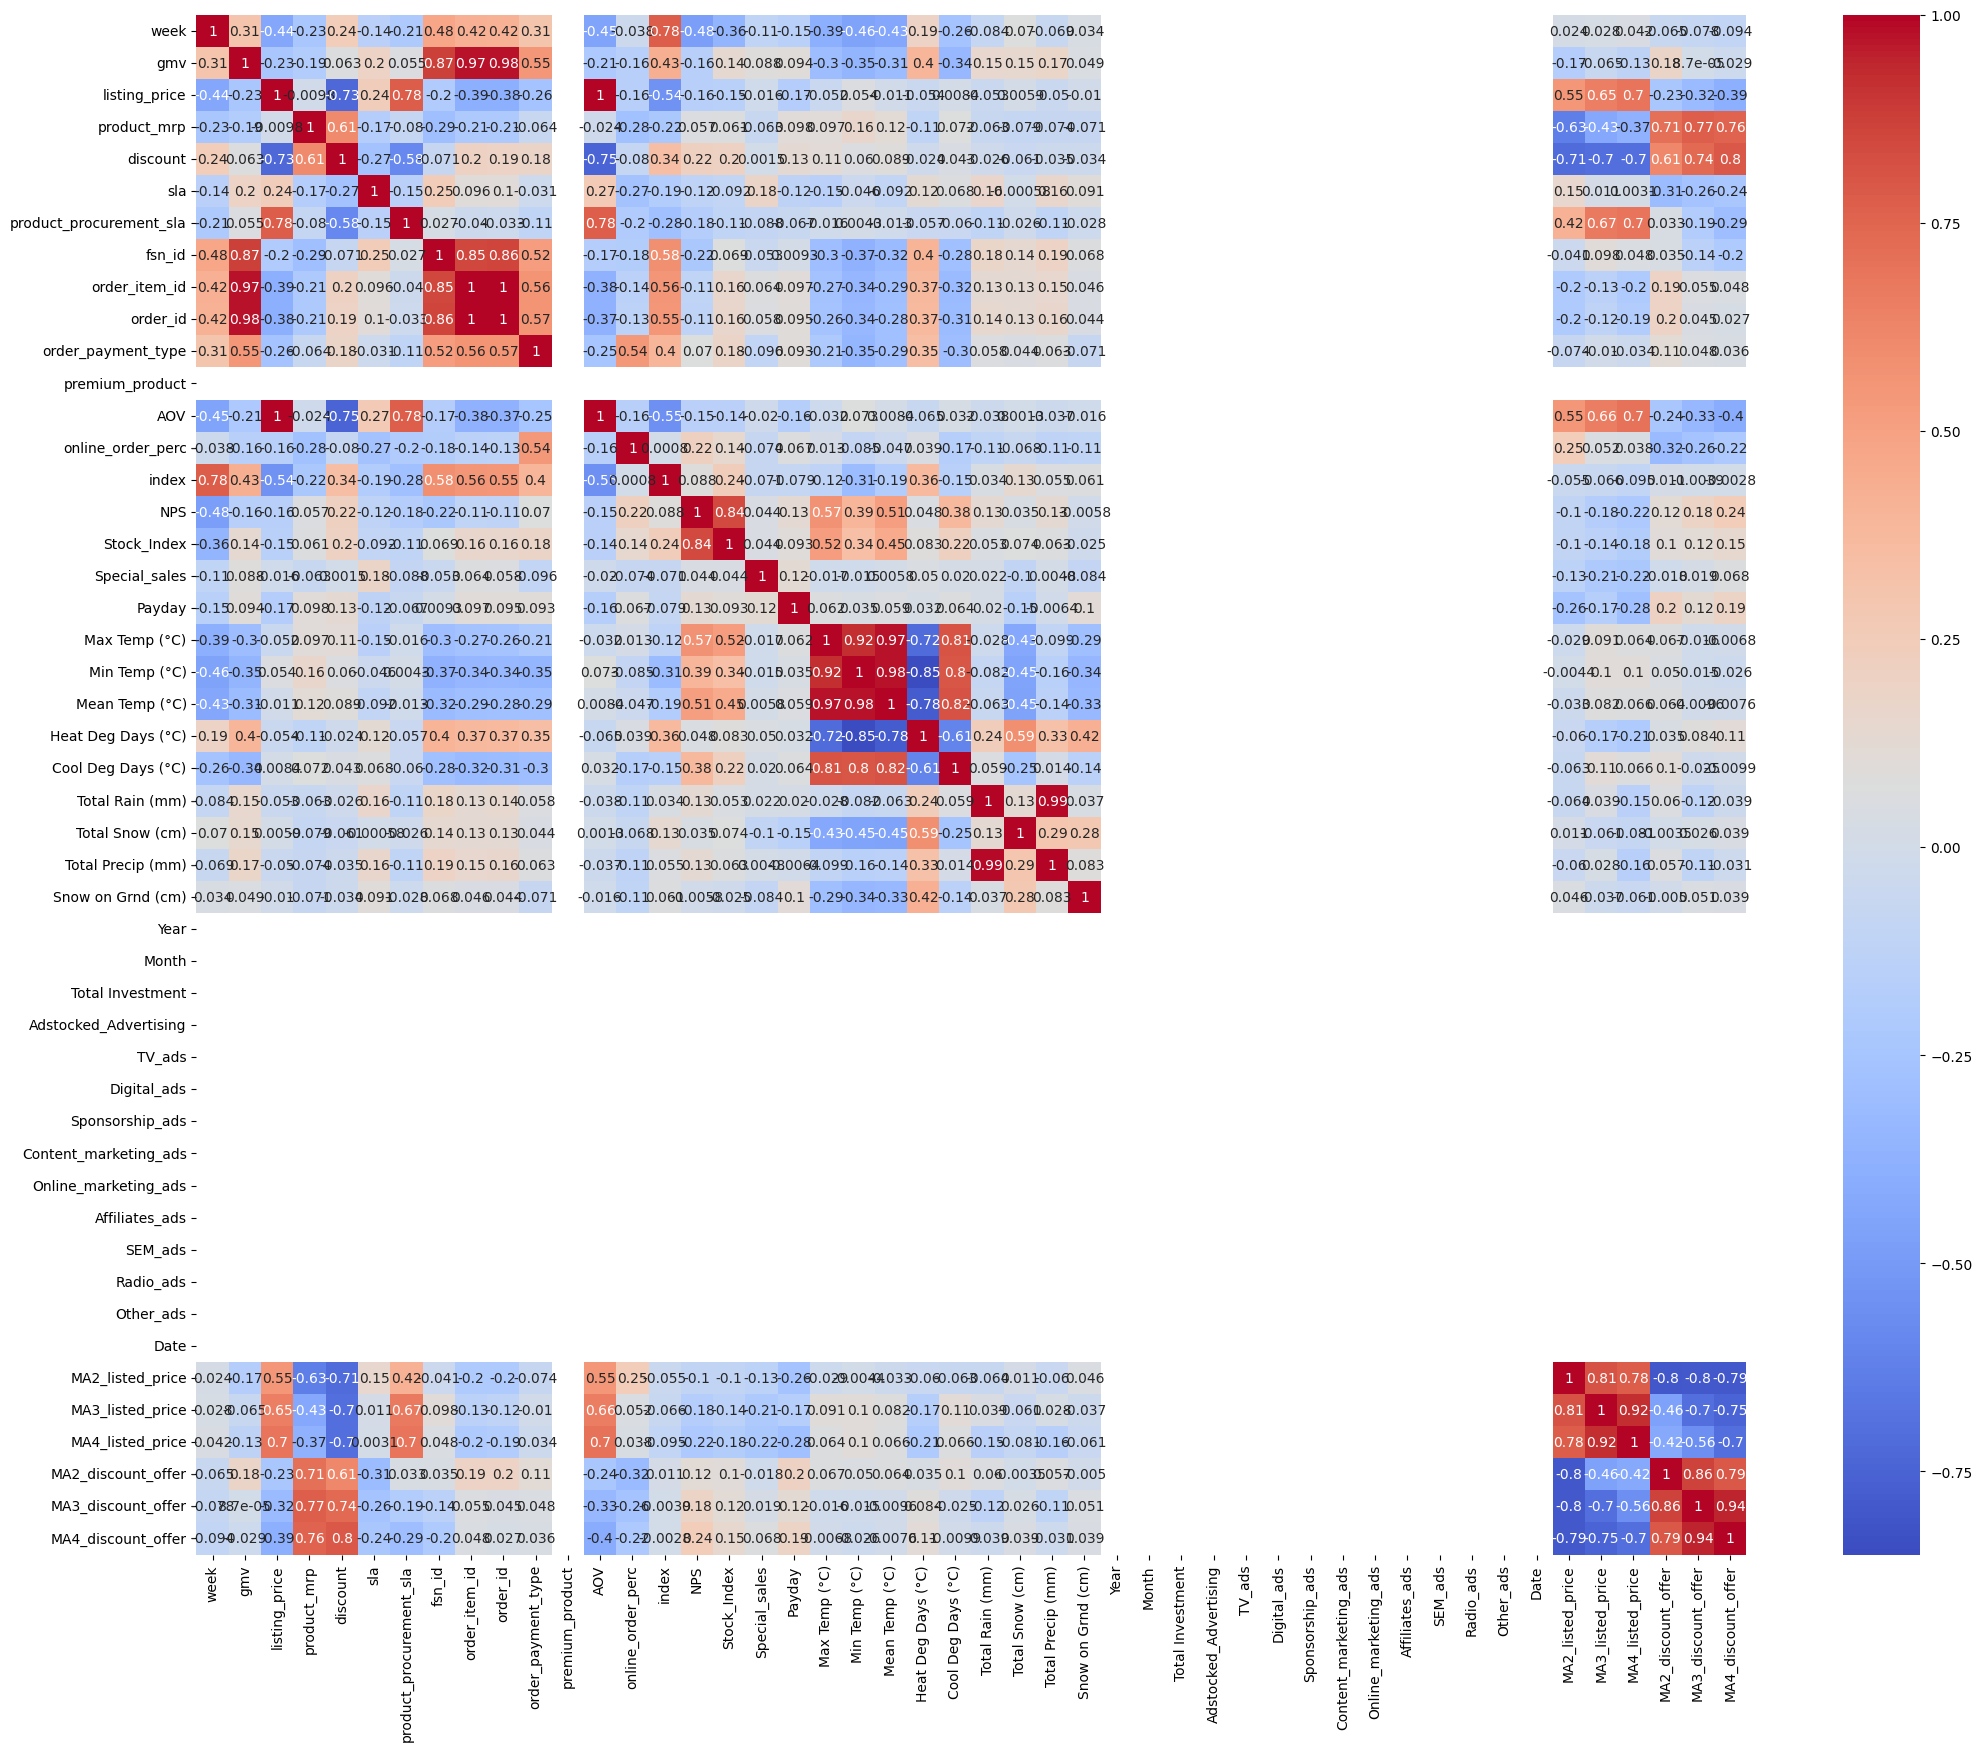

In [152]:
plt.figure(figsize=(25,20))
sns.heatmap(ca_week.corr(), cmap="coolwarm", annot=True)
plt.show()

In [153]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id', 'order_payment_type', 'premium_product', 'AOV', 'online_order_perc', 'index', 'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)', 'Year', 'Month', 'Total Investment', 'Adstocked_Advertising', 'TV_ads', 'Digital_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'Affiliates_ads', 'SEM_ads', 'Radio_ads', 'Other_ads', 'Date', 'MA2_listed_price', 'MA3_listed_price', 'MA4_listed_price', 'MA2_discount_offer', 'MA3_discount_offer', 'MA4_discount_offer'], dtype='object')

In [154]:
ca_week.drop(['Affiliates_ads','SEM_ads','Digital_ads','Radio_ads','Other_ads','Mean Temp (°C)','Min Temp (°C)',
              'order_id','order_item_id','Total Precip (mm)','Total Investment','MA3_discount_offer',
               'MA3_listed_price','AOV','Max Temp (°C)','MA2_listed_price','MA4_discount_offer'],axis=1,inplace=True)

In [155]:
# Lag Variable Function for Lag variable Functions

ca_week['lag_1_listed_price'] = ca_week['listing_price'].shift(-1).fillna(0)
ca_week['lag_2_listed_price'] = ca_week['listing_price'].shift(-2).fillna(0)
ca_week['lag_3_listed_price'] = ca_week['listing_price'].shift(-3).fillna(0)

In [156]:
ca_week['lag_1_discount'] = ca_week['discount'].shift(-1).fillna(0)
ca_week['lag_2_discount'] = ca_week['discount'].shift(-2).fillna(0)
ca_week['lag_3_discount'] = ca_week['discount'].shift(-3).fillna(0)

In [157]:
ca_week['lag_1_Stock_Index'] = ca_week['Stock_Index'].shift(-1).fillna(0)
ca_week['lag_2_Stock_Index'] = ca_week['Stock_Index'].shift(-2).fillna(0)
ca_week['lag_3_Stock_Index'] = ca_week['Stock_Index'].shift(-3).fillna(0)

In [158]:
ca_week['lag_1_Special_sales'] = ca_week['Special_sales'].shift(-1).fillna(0)
ca_week['lag_2_Special_sales'] = ca_week['Special_sales'].shift(-2).fillna(0)
ca_week['lag_3_Special_sales'] = ca_week['Special_sales'].shift(-3).fillna(0)

In [159]:
ca_week['lag_1_Payday'] = ca_week['Payday'].shift(-1).fillna(0)
ca_week['lag_2_Payday'] = ca_week['Payday'].shift(-2).fillna(0)
ca_week['lag_3_Payday'] = ca_week['Payday'].shift(-3).fillna(0)

In [160]:
ca_week['lag_1_NPS'] = ca_week['NPS'].shift(-1).fillna(0)
ca_week['lag_2_NPS'] = ca_week['NPS'].shift(-2).fillna(0)
ca_week['lag_3_NPS'] = ca_week['NPS'].shift(-3).fillna(0)

In [161]:
ca_week.head(2)

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_payment_type  premium_product  online_order_perc  index    NPS  Stock_Index  Special_sales  Payday  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Snow on Grnd (cm)  Year  Month  Adstocked_Advertising  TV_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads  Date  MA4_listed_price  MA2_discount_offer  lag_1_listed_price  lag_2_listed_price  lag_3_listed_price  lag_1_discount  lag_2_discount  lag_3_discount  lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  lag_1_Special_sales  lag_2_Special_sales  lag_3_Special_sales  lag_1_Payday  lag_2_Payday  lag_3_Payday  lag_1_NPS  lag_2_NPS  lag_3_NPS
0    1   11151.000        428.885     1115.038     0.491 2.423                    2.731      20                  26                0            100.000  0.000 54.600     1177.000          0.000   0.200               0.100               1.460            0.000            0.000              0.000 0.000  0.000                  0.000   0.000            0.000                  0.000                 0.000     0             0.000               0.000             504.230             511.410             511.943           0.452           0.458           0.444           1177.000           1177.000           1177.000                0.000                0.286                0.000         0.000         0.143         0.000     54.600     54.600     54.600
1    2 1160259.000        504.230     1016.201     0.452 6.853                    2.549     527                 715                0             31.834  1.000 54.600     1177.000          0.000   0.000               1.059               2.322            4.155            0.029              0.000 0.000  0.000                  0.000   0.000            0.000                  0.000                 0.000     0             0.081              -0.041             511.410             511.943             521.154           0.458           0.444           0.445           1177.000           1177.000           1185.286                0.286                0.000                0.000         0.143         0.000         0.143     54.600     54.600     56.139

### Gaming Accesory

In [162]:
gaming_accessory = consumer_elec[consumer_elec['product_analytic_sub_category'] == 'GamingAccessory']

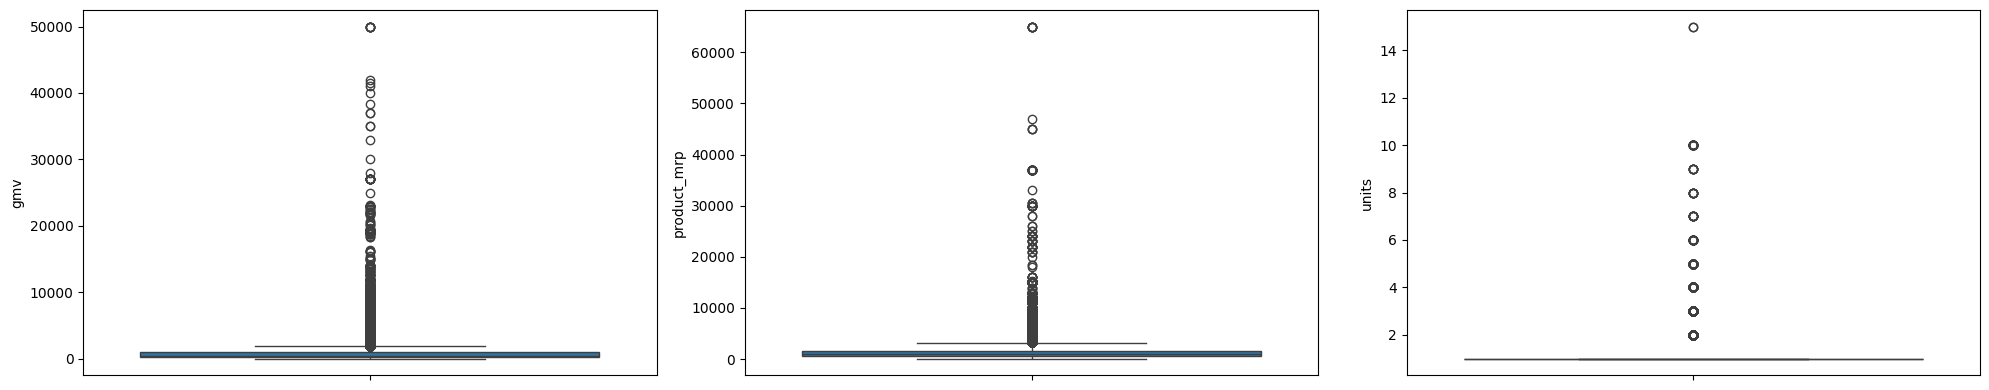

In [163]:
# Removing outliers is important as there maybe some unnecessary values and
# bulk orders can skew our analysis %%

fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(gaming_accessory['gmv'], ax = axs[0])
plt2 = sns.boxplot(gaming_accessory['units'], ax = axs[2])
plt4 = sns.boxplot(gaming_accessory['product_mrp'], ax = axs[1])
plt.tight_layout()

In [164]:
# Define a function to remove outliers using IQR
def remove_outliers(gaming_accessory, column):
    Q1 = gaming_accessory[column].quantile(0.25)
    Q3 = gaming_accessory[column].quantile(0.75)
    IQR = Q3 - Q1
    return gaming_accessory[(gaming_accessory[column] >= Q1 - 1.5 * IQR) & (gaming_accessory[column] <= Q3 + 1.5 * IQR)]

# Apply the function to the columns
gaming_accessory = remove_outliers(gaming_accessory, 'gmv')
gaming_accessory = remove_outliers(gaming_accessory, 'product_mrp')

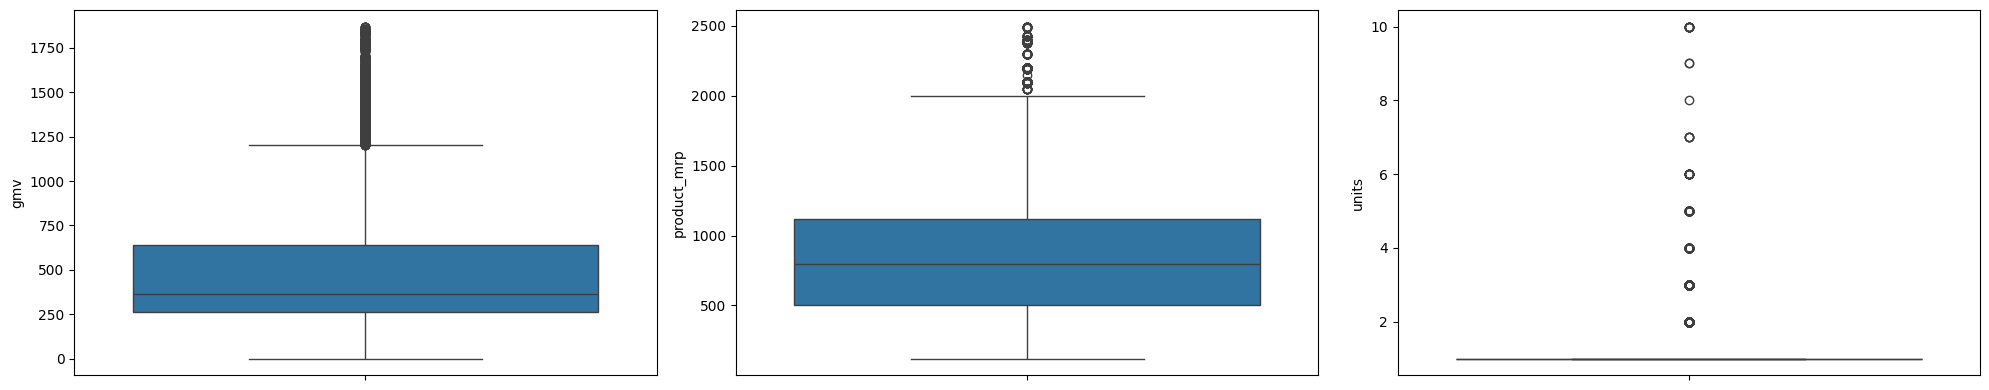

In [165]:
### Outlier Visualization

fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(gaming_accessory['gmv'], ax = axs[0])
plt2 = sns.boxplot(gaming_accessory['units'], ax = axs[2])
plt4 = sns.boxplot(gaming_accessory['product_mrp'], ax = axs[1])
plt.tight_layout()
plt.show()

In [166]:
### Aggregating dataset on weekly level

ga_week = pd.DataFrame(gaming_accessory.groupby('week').agg({'gmv':'sum','listing_price':'mean',
                                                             'product_mrp':'mean','discount':'mean',
                                                             'sla':'mean','product_procurement_sla':'mean',
                                                             'fsn_id':pd.Series.nunique,'order_item_id':pd.Series.nunique,
                                                             'order_id': pd.Series.nunique,
                                                             'order_payment_type':'sum'}))

ga_week.reset_index( inplace = True)

In [167]:
ga_week.head(2)

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type
0     1   17466.000        681.080      893.160     0.220 2.960                    2.560      19             25        25                  25
1     2 1395022.000        523.566      952.250     0.412 5.055                    3.026     204           2579      2445                 678

In [168]:
# Similar to Camera Accessory, we will move on with the steps
# Sum of GMV / No of unique Orders

ga_week['AOV'] = ga_week['gmv']/ga_week['order_id']

In [169]:
ga_week['online_order_perc'] = ga_week['order_payment_type']*100/ga_week['order_item_id']

In [170]:
ga_week.head(2)

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type     AOV  online_order_perc
0     1   17466.000        681.080      893.160     0.220 2.960                    2.560      19             25        25                  25 698.640            100.000
1     2 1395022.000        523.566      952.250     0.412 5.055                    3.026     204           2579      2445                 678 570.561             26.289

In [171]:
ga_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id', 'order_payment_type', 'AOV', 'online_order_perc'], dtype='object')

In [172]:
ga_week['week'] = ga_week['week'].astype(str)
calendar['week'] = calendar['week'].astype(str)

ga_week = ga_week.merge(calendar, how='left', on='week')

In [173]:
marketing['week'] = marketing['week'].astype(str)
ga_week['week'] = ga_week['week'].astype(str)

ga_week = ga_week.merge(marketing, how='left', on='week')

In [174]:
ga_week.head(2)

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type     AOV  online_order_perc  index    NPS  Stock_Index  Special_sales  Payday  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  Year  Month  Total Investment  TV  Digital  Sponsorship  Content Marketing  Online marketing   Affiliates  SEM  Radio  Other  Adstocked_Advertising  TV_ads  Digital_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads  Affiliates_ads  SEM_ads  Radio_ads  Other_ads Date
0    1   17466.000        681.080      893.160     0.220 2.960                    2.560      19             25        25                  25 698.640            100.000  0.000 54.600     1177.000          0.000   0.200         25.500         13.200          19.360               0.100               1.460            0.000            0.000              0.000              0.000   NaN    NaN               NaN NaN      NaN          NaN                NaN               NaN          NaN  NaN    NaN    NaN                    NaN     NaN          NaN              NaN                    NaN                   NaN             NaN      NaN        NaN        NaN  NaT
1    2 1395022.000        523.566      952.250     0.412 5.055                    3.026     204           2579      2445                 678 570.561             26.289  1.000 54.600     1177.000          0.000   0.000         24.025         14.385          19.263               1.059               2.322            4.155            0.029              4.184              0.000   NaN    NaN               NaN NaN      NaN          NaN                NaN               NaN          NaN  NaN    NaN    NaN                    NaN     NaN          NaN              NaN                    NaN                   NaN             NaN      NaN        NaN        NaN  NaT

In [175]:
# Visualizing ga_week

ga_week_viz = ga_week.round(2)

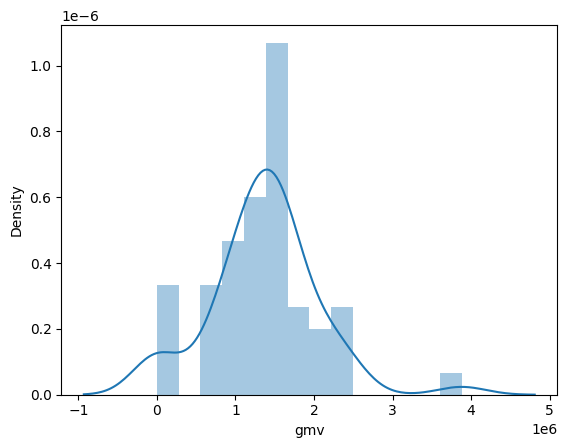

In [176]:
sns.distplot(ga_week_viz['gmv'],kde=True)
plt.show()

#### Insight

#### The 'gmv' distribution is multimodal, showing peaks around 0, 1.5 million, and a smaller one near 3.7 million. The highest density is observed around 1.5 million, suggesting this is a frequent 'gmv' value. The spread indicates variability in 'gmv', with some significantly higher values present.

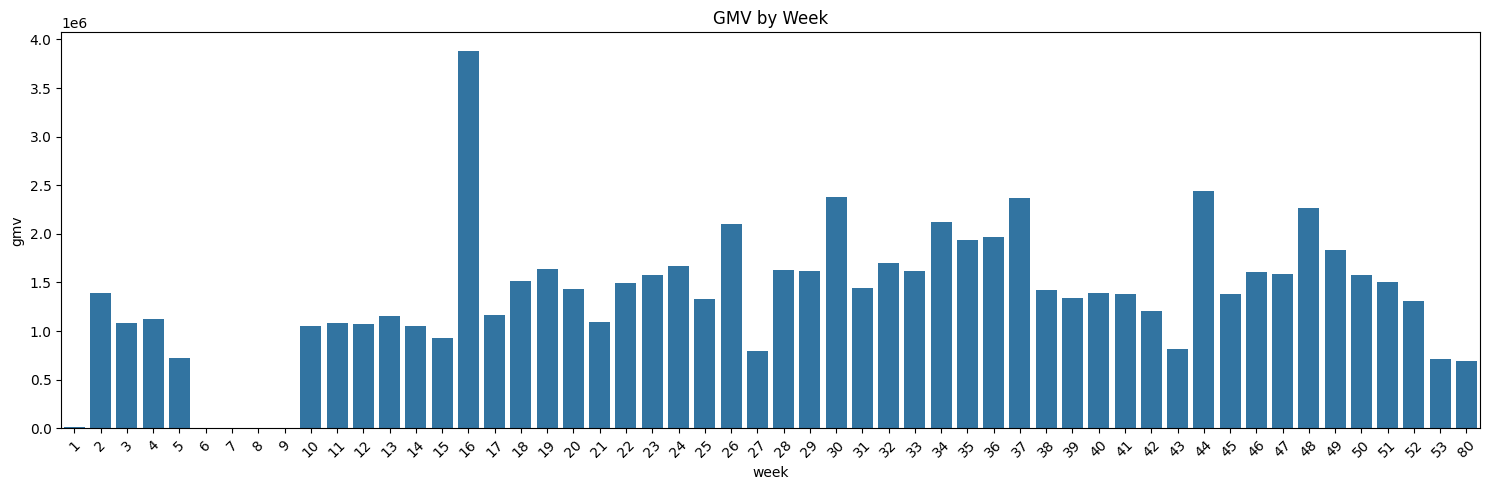

In [177]:
plt.figure(figsize=(15, 5))
sns.barplot(x='week', y='gmv', data=ga_week_viz)
plt.xticks(rotation=45)
plt.title("GMV by Week")
plt.tight_layout()
plt.show()

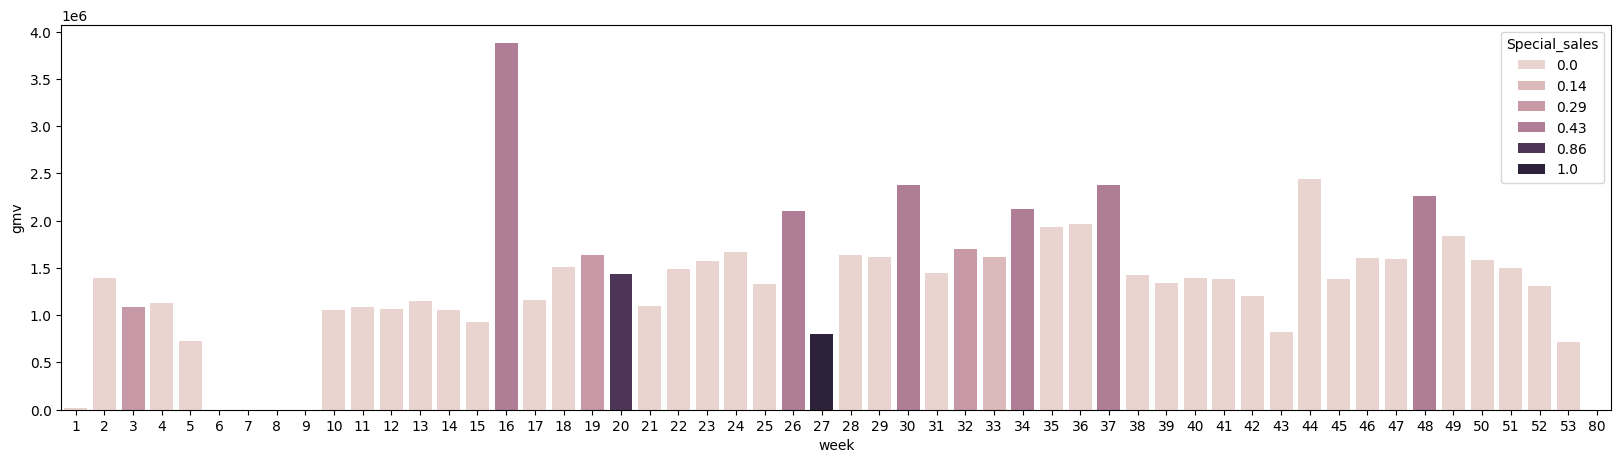

In [178]:
# GMV and Holiday Weekly

plt.figure(figsize=(20, 5))
sns.barplot(x= ga_week_viz['week'], y =ga_week_viz['gmv'], hue = ga_week_viz['Special_sales'], dodge = False)
plt.show()

In [179]:
# Moving Average for Gaming accessory

# Moving Average for listed_price and discount_offer

ga_week[['MA2_LP','MA2_Discount']] = ga_week[['listing_price','discount']].rolling(window=2,min_periods=1).mean()
ga_week[['MA3_LP','MA3_Discount']] = ga_week[['listing_price','discount']].rolling(window=3,min_periods=1).mean()
ga_week[['MA4_LP','MA4_Discount']] = ga_week[['listing_price','discount']].rolling(window=4,min_periods=1).mean()

In [180]:
# Referencing listed price Inflation

ga_week['MA2_listed_price'] = (ga_week['listing_price']-ga_week['MA2_LP'])/ga_week['MA2_LP']
ga_week['MA3_listed_price'] = (ga_week['listing_price']-ga_week['MA3_LP'])/ga_week['MA3_LP']
ga_week['MA4_listed_price'] = (ga_week['listing_price']-ga_week['MA4_LP'])/ga_week['MA4_LP']

In [181]:
### Referencing discount Inflation

ga_week['MA2_discount'] = (ga_week['discount']-ga_week['MA2_Discount'])/ga_week['MA2_Discount']
ga_week['MA3_discount'] = (ga_week['discount']-ga_week['MA3_Discount'])/ga_week['MA3_Discount']
ga_week['MA4_discount'] = (ga_week['discount']-ga_week['MA4_Discount'])/ga_week['MA4_Discount']

In [182]:
ga_week.drop(['MA2_LP','MA3_LP','MA4_LP','MA2_Discount','MA3_Discount','MA4_Discount'], axis = 1, inplace = True)
ga_week.head(2)

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type     AOV  online_order_perc  index    NPS  Stock_Index  Special_sales  Payday  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  Year  Month  Total Investment  TV  Digital  Sponsorship  Content Marketing  Online marketing   Affiliates  SEM  Radio  Other  Adstocked_Advertising  TV_ads  Digital_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads  Affiliates_ads  SEM_ads  Radio_ads  Other_ads Date  MA2_listed_price  MA3_listed_price  MA4_listed_price  MA2_discount  MA3_discount  MA4_discount
0    1   17466.000        681.080      893.160     0.220 2.960                    2.560      19             25        25                  25 698.640            100.000  0.000 54.600     1177.000          0.000   0.200         25.500         13.200          19.360               0.100               1.460            0.000            0.000              0.000              0.000   NaN    NaN               NaN NaN      NaN          NaN                NaN               NaN          NaN  NaN    NaN    NaN                    NaN     NaN          NaN              NaN                    NaN                   NaN             NaN      NaN        NaN        NaN  NaT             0.000             0.000             0.000         0.000         0.000         0.000
1    2 1395022.000        523.566      952.250     0.412 5.055                    3.026     204           2579      2445                 678 570.561             26.289  1.000 54.600     1177.000          0.000   0.000         24.025         14.385          19.263               1.059               2.322            4.155            0.029              4.184              0.000   NaN    NaN               NaN NaN      NaN          NaN                NaN               NaN          NaN  NaN    NaN    NaN                    NaN     NaN          NaN              NaN                    NaN                   NaN             NaN      NaN        NaN        NaN  NaT            -0.131            -0.131            -0.131         0.305         0.305         0.305

In [183]:
# Filling the NaN's for even distribution of data

ga_week.fillna(0, inplace=True)

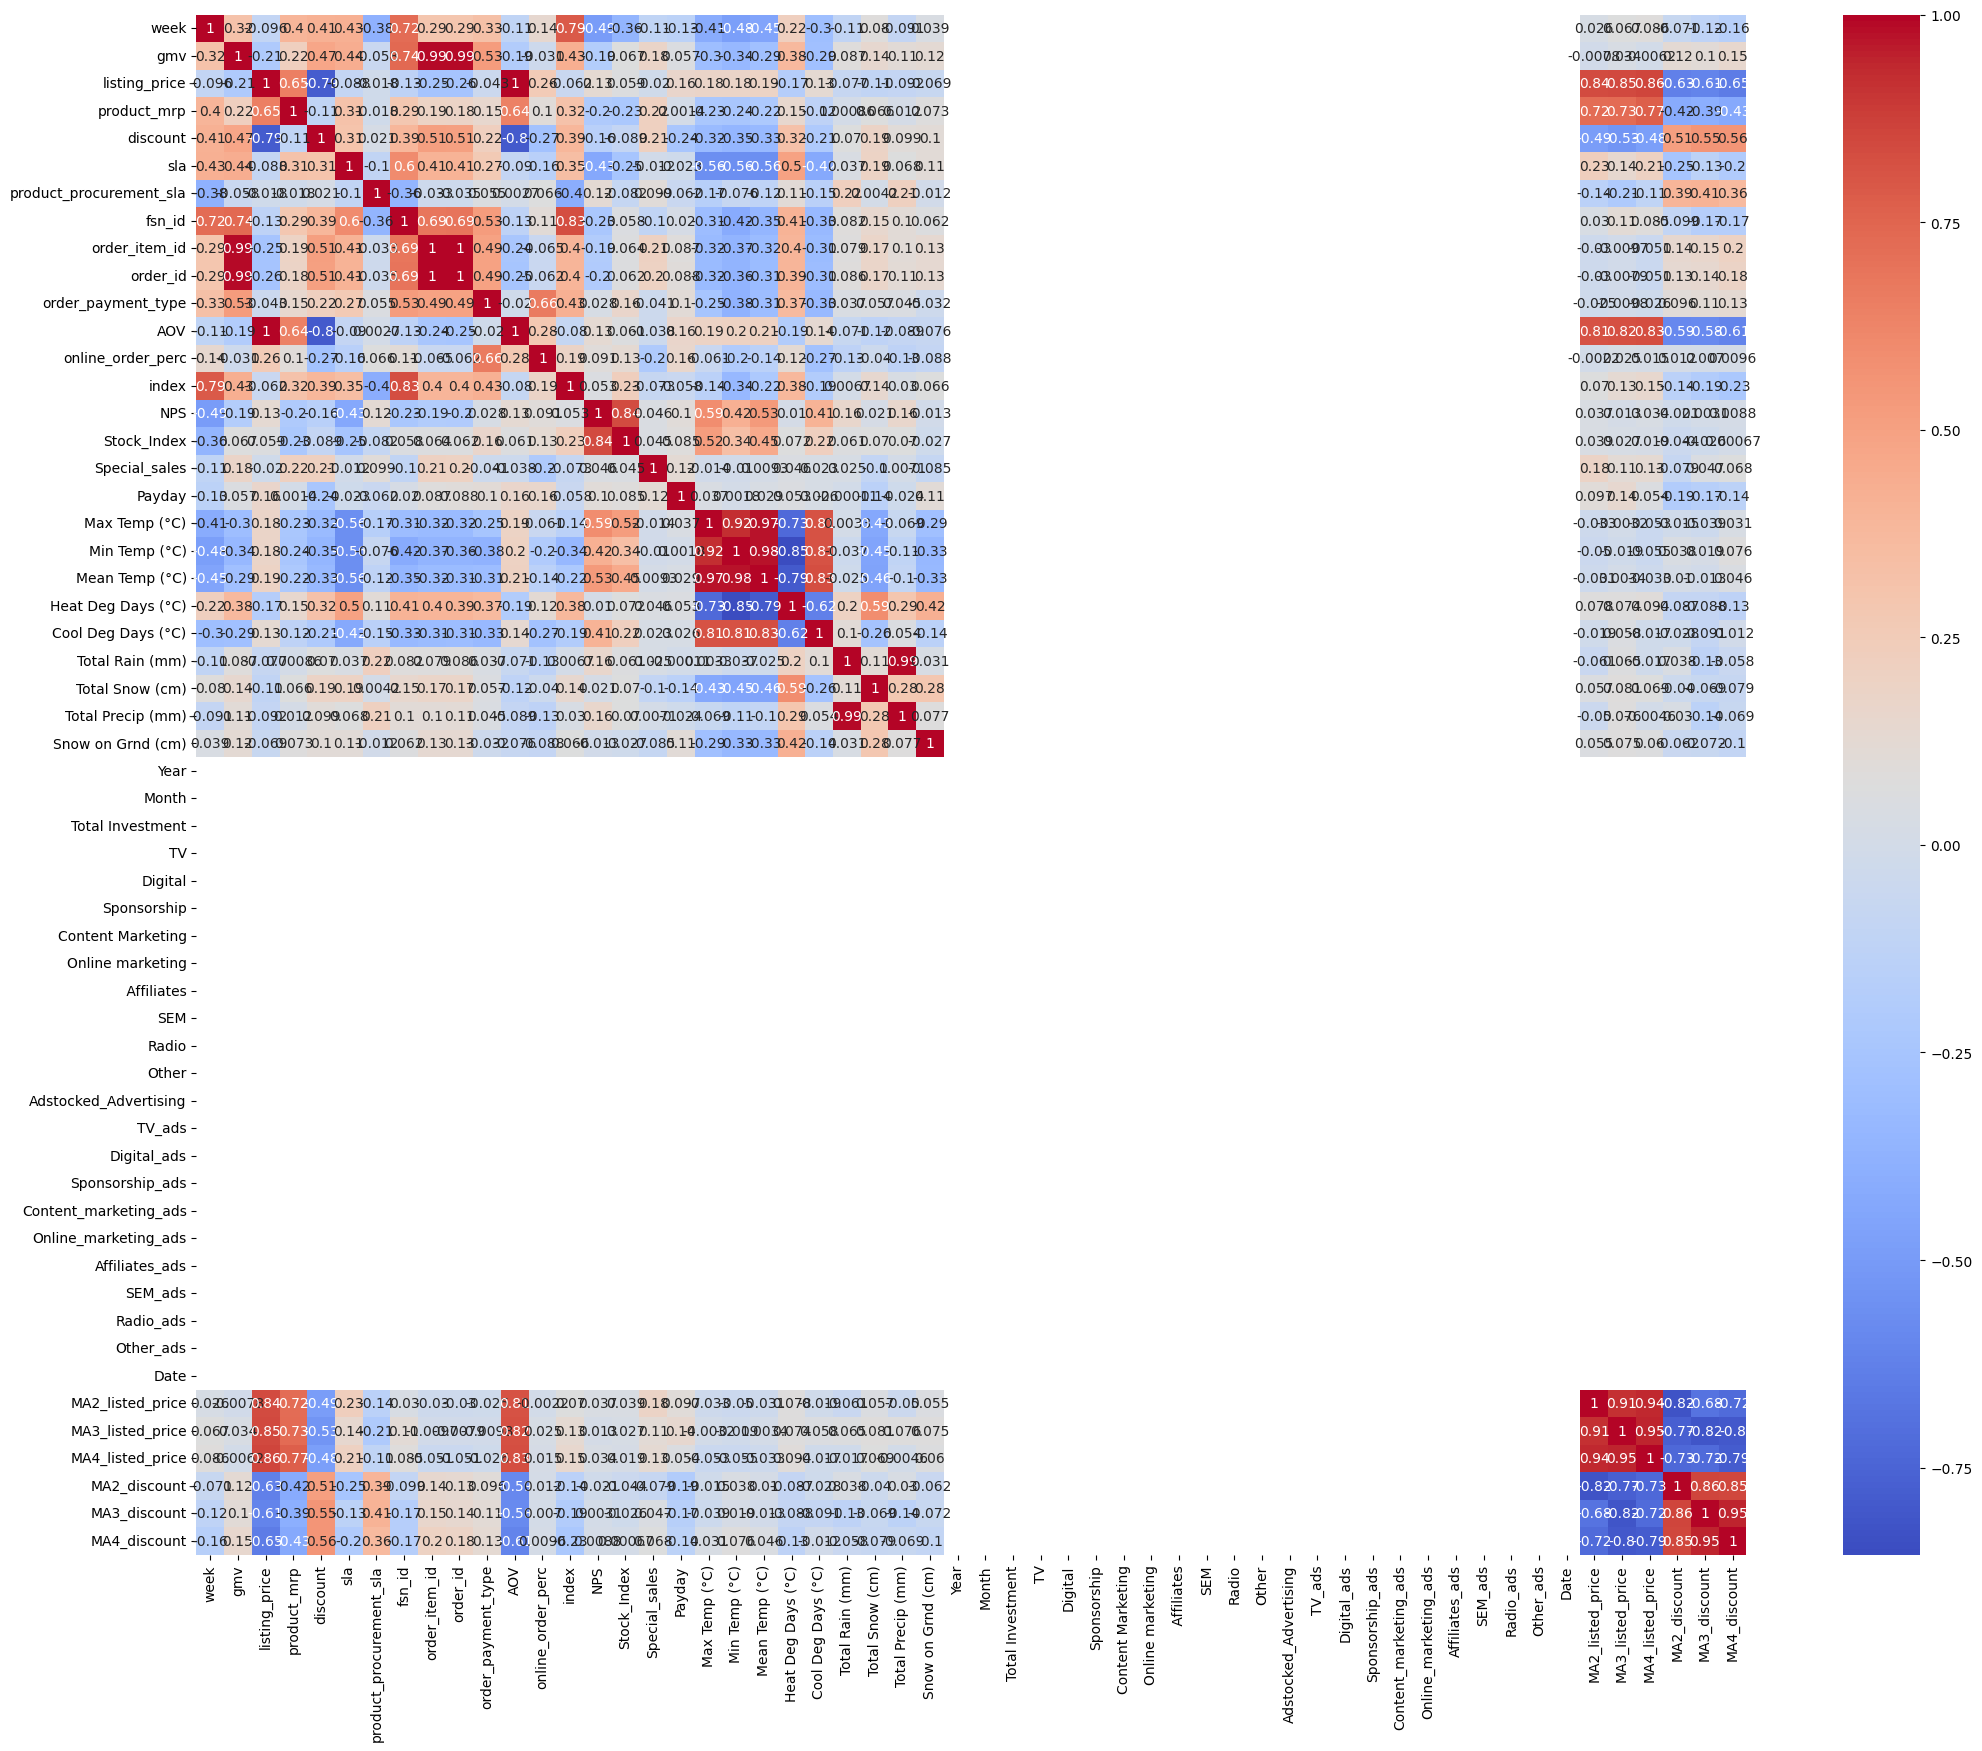

In [184]:
# Heatmap to visualize the multicollinearity

plt.figure(figsize=(25,20))

### Heatmap
sns.heatmap(ga_week.corr(), cmap="coolwarm", annot=True)
plt.show()

In [185]:
ga_week.drop(['TV', 'Digital', 'Sponsorship', 'Content Marketing','Online marketing', ' Affiliates', 'SEM','Radio',
              'Other','Affiliates_ads','SEM_ads','Digital_ads','Radio_ads','Other_ads','Mean Temp (°C)','Min Temp (°C)',
              'order_id','order_item_id','Total Precip (mm)','Total Investment','MA3_discount',
              'MA3_listed_price','AOV','MA4_listed_price'], axis = 1, inplace = True)

In [186]:
ga_week.drop(['Max Temp (°C)'], axis = 1, inplace = True)

In [187]:
# Lag Variable functions for Gaming Accessory

# Lag of listed_price, discount_offer, NPS, Special_sales

ga_week['lag_1_listed_price'] = ga_week['listing_price'].shift(-1).fillna(0)
ga_week['lag_2_listed_price'] = ga_week['listing_price'].shift(-2).fillna(0)
ga_week['lag_3_listed_price'] = ga_week['listing_price'].shift(-3).fillna(0)

In [188]:
ga_week['lag_1_discount_offer'] = ga_week['discount'].shift(-1).fillna(0)
ga_week['lag_2_discount_offer'] = ga_week['discount'].shift(-2).fillna(0)
ga_week['lag_3_discount_offer'] = ga_week['discount'].shift(-3).fillna(0)

In [189]:
ga_week['lag_1_NPS'] = ga_week['NPS'].shift(-1).fillna(0)
ga_week['lag_2_NPS'] = ga_week['NPS'].shift(-2).fillna(0)
ga_week['lag_3_NPS'] = ga_week['NPS'].shift(-3).fillna(0)

In [190]:
ga_week['lag_1_Stock_Index'] = ga_week['Stock_Index'].shift(-1).fillna(0)
ga_week['lag_2_Stock_Index'] = ga_week['Stock_Index'].shift(-2).fillna(0)
ga_week['lag_3_Stock_Index'] = ga_week['Stock_Index'].shift(-3).fillna(0)

In [191]:
ga_week['lag_1_Special_sales'] = ga_week['Special_sales'].shift(-1).fillna(0)
ga_week['lag_2_Special_sales'] = ga_week['Special_sales'].shift(-2).fillna(0)
ga_week['lag_3_Special_sales'] = ga_week['Special_sales'].shift(-3).fillna(0)

In [192]:
ga_week['lag_1_Payday'] = ga_week['Payday'].shift(-1).fillna(0)
ga_week['lag_2_Payday'] = ga_week['Payday'].shift(-2).fillna(0)
ga_week['lag_3_Payday'] = ga_week['Payday'].shift(-3).fillna(0)

In [193]:
ga_week.head(2)

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_payment_type  online_order_perc  index    NPS  Stock_Index  Special_sales  Payday  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Snow on Grnd (cm)  Year  Month  Adstocked_Advertising  TV_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads  Date  MA2_listed_price  MA2_discount  MA4_discount  lag_1_listed_price  lag_2_listed_price  lag_3_listed_price  lag_1_discount_offer  lag_2_discount_offer  lag_3_discount_offer  lag_1_NPS  lag_2_NPS  lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  lag_1_Special_sales  lag_2_Special_sales  lag_3_Special_sales  lag_1_Payday  lag_2_Payday  lag_3_Payday
0    1   17466.000        681.080      893.160     0.220 2.960                    2.560      19                  25            100.000  0.000 54.600     1177.000          0.000   0.200               0.100               1.460            0.000            0.000              0.000 0.000  0.000                  0.000   0.000            0.000                  0.000                 0.000     0             0.000         0.000         0.000             523.566             446.456             550.361                 0.412                 0.428                 0.352     54.600     54.600     54.600           1177.000           1177.000           1177.000                0.000                0.286                0.000         0.000         0.143         0.000
1    2 1395022.000        523.566      952.250     0.412 5.055                    3.026     204                 678             26.289  1.000 54.600     1177.000          0.000   0.000               1.059               2.322            4.155            0.029              0.000 0.000  0.000                  0.000   0.000            0.000                  0.000                 0.000     0            -0.131         0.305         0.305             446.456             550.361             551.453                 0.428                 0.352                 0.361     54.600     54.600     56.139           1177.000           1177.000           1185.286                0.286                0.000                0.000         0.143         0.000         0.143

### Home Audio Accessory

In [194]:
home_audio = consumer_elec[consumer_elec['product_analytic_sub_category'] == 'HomeAudio']

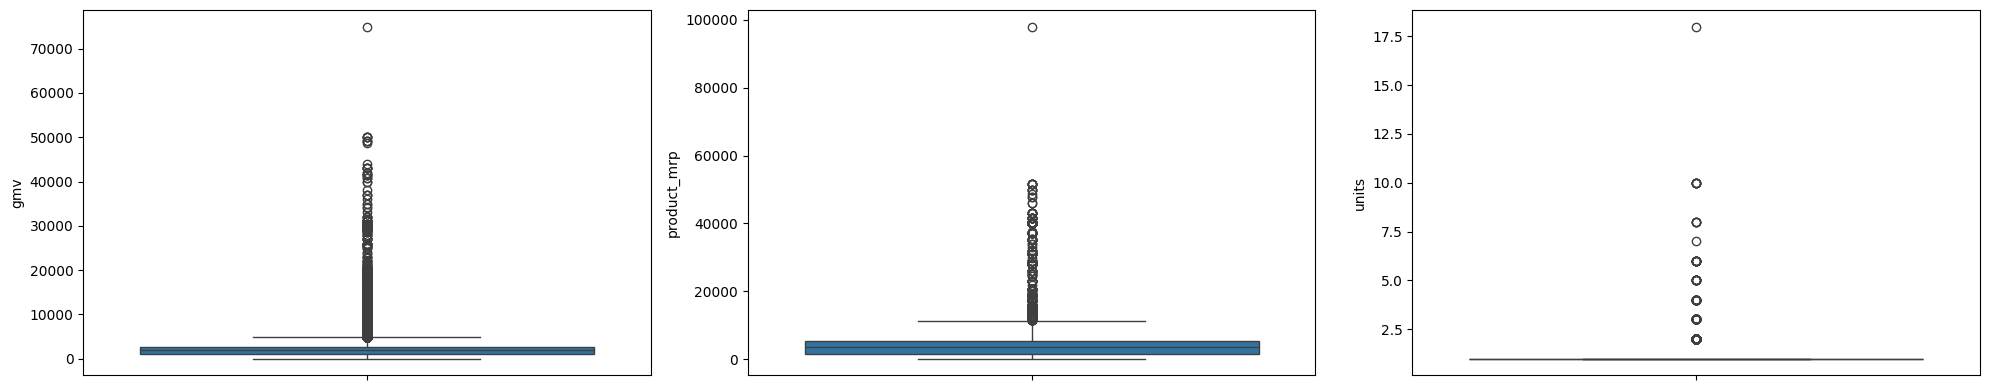

In [195]:
# Removing outliers is important as there maybe some unnecessary values and
# bulk orders can skew our analysis %%

fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(home_audio['gmv'], ax = axs[0])
plt2 = sns.boxplot(home_audio['units'], ax = axs[2])
plt4 = sns.boxplot(home_audio['product_mrp'], ax = axs[1])
plt.tight_layout()

In [196]:
# Define a function to remove outliers using IQR
def remove_outliers(home_audio, column):
    Q1 = home_audio[column].quantile(0.25)
    Q3 = home_audio[column].quantile(0.75)
    IQR = Q3 - Q1
    return home_audio[(home_audio[column] >= Q1 - 1.5 * IQR) & (home_audio[column] <= Q3 + 1.5 * IQR)]

# Apply the function to the columns
home_audio = remove_outliers(home_audio, 'gmv')
home_audio = remove_outliers(home_audio, 'product_mrp')

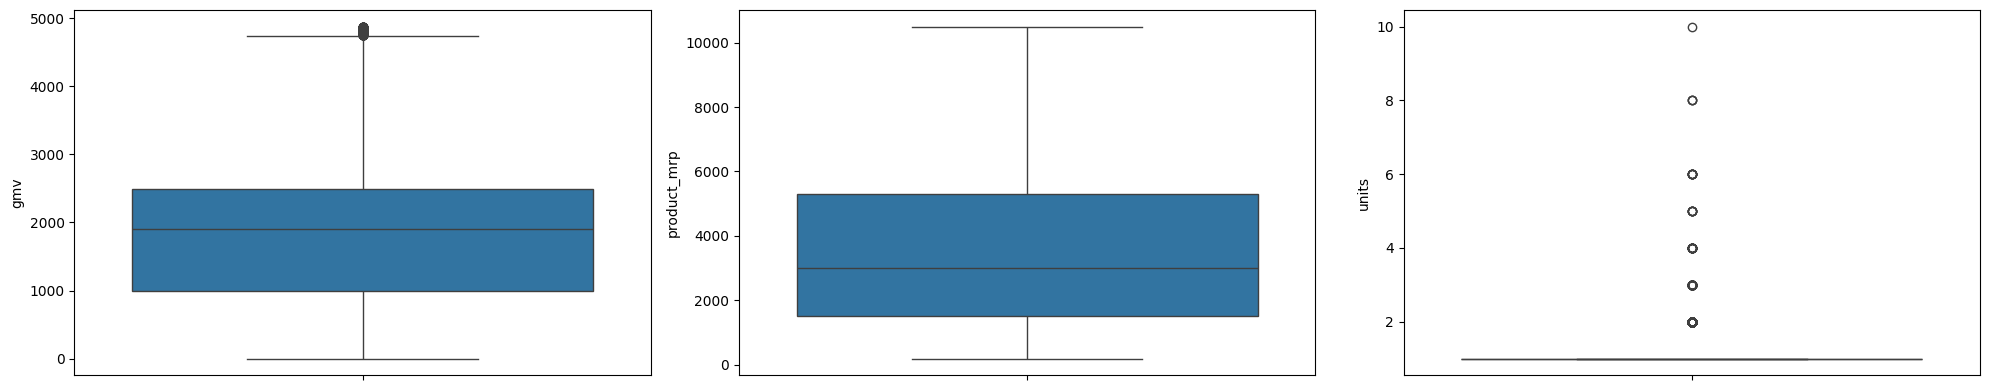

In [197]:
### Outlier Visualization

fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(home_audio['gmv'], ax = axs[0])
plt2 = sns.boxplot(home_audio['units'], ax = axs[2])
plt4 = sns.boxplot(home_audio['product_mrp'], ax = axs[1])
plt.tight_layout()
plt.show()

In [198]:
### Aggregating dataset on weekly level

ha_week = pd.DataFrame(home_audio.groupby('week').agg({'gmv':'sum','listing_price':'mean',
                                                             'product_mrp':'mean','discount':'mean',
                                                             'sla':'mean','product_procurement_sla':'mean',
                                                             'fsn_id':pd.Series.nunique,'order_item_id':pd.Series.nunique,
                                                             'order_id': pd.Series.nunique,
                                                             'order_payment_type':'sum'}))

ha_week.reset_index( inplace = True)

In [199]:
ha_week.head(2)

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type
0     1   83742.000       2392.629     4369.057     0.397 2.943                    3.486      19             35        35                  34
1     2 3438794.133       1854.852     2973.055     0.322 6.884                    2.736     196           1849      1848                 439

In [200]:
# Similar to Camera Accessory, we will move on with the steps
# Sum of GMV / No of unique Orders

ha_week['AOV'] = ha_week['gmv']/ha_week['order_id']

In [201]:
ha_week['online_order_perc'] = ha_week['order_payment_type']*100/ha_week['order_item_id']

In [202]:
ha_week.head(2)

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type      AOV  online_order_perc
0     1   83742.000       2392.629     4369.057     0.397 2.943                    3.486      19             35        35                  34 2392.629             97.143
1     2 3438794.133       1854.852     2973.055     0.322 6.884                    2.736     196           1849      1848                 439 1860.819             23.743

In [203]:
ha_week['week'] = ha_week['week'].astype(str)
calendar['week'] = calendar['week'].astype(str)

ha_week = ha_week.merge(calendar, how='left', on='week')

In [204]:
marketing['week'] = marketing['week'].astype(str)
ha_week['week'] = ha_week['week'].astype(str)

ha_week = ha_week.merge(marketing, how='left', on='week')

In [205]:
ha_week.head(2)

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type      AOV  online_order_perc  index    NPS  Stock_Index  Special_sales  Payday  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  Year  Month  Total Investment  TV  Digital  Sponsorship  Content Marketing  Online marketing   Affiliates  SEM  Radio  Other  Adstocked_Advertising  TV_ads  Digital_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads  Affiliates_ads  SEM_ads  Radio_ads  Other_ads Date
0    1   83742.000       2392.629     4369.057     0.397 2.943                    3.486      19             35        35                  34 2392.629             97.143  0.000 54.600     1177.000          0.000   0.200         25.500         13.200          19.360               0.100               1.460            0.000            0.000              0.000              0.000   NaN    NaN               NaN NaN      NaN          NaN                NaN               NaN          NaN  NaN    NaN    NaN                    NaN     NaN          NaN              NaN                    NaN                   NaN             NaN      NaN        NaN        NaN  NaT
1    2 3438794.133       1854.852     2973.055     0.322 6.884                    2.736     196           1849      1848                 439 1860.819             23.743  1.000 54.600     1177.000          0.000   0.000         24.025         14.385          19.263               1.059               2.322            4.155            0.029              4.184              0.000   NaN    NaN               NaN NaN      NaN          NaN                NaN               NaN          NaN  NaN    NaN    NaN                    NaN     NaN          NaN              NaN                    NaN                   NaN             NaN      NaN        NaN        NaN  NaT

In [206]:
#Visualizing the dataset

ha_week_viz = ha_week.round(2)

<Axes: xlabel='gmv', ylabel='Density'>

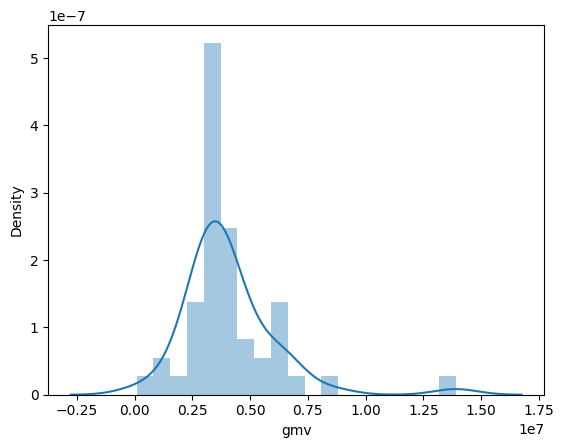

In [207]:
# Target Variable

sns.distplot(ha_week_viz['gmv'],kde=True)

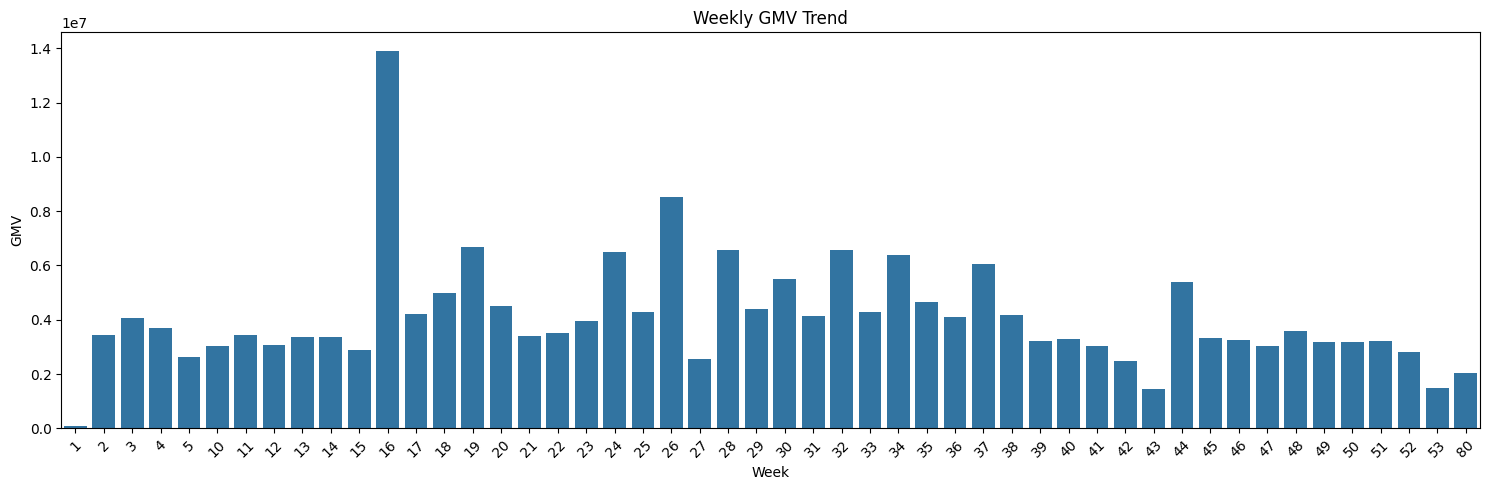

In [208]:
plt.figure(figsize=(15, 5))
sns.barplot(x='week', y='gmv', data=ha_week_viz)
plt.xticks(rotation=45)
plt.title('Weekly GMV Trend')
plt.xlabel('Week')
plt.ylabel('GMV')
plt.tight_layout()
plt.show()

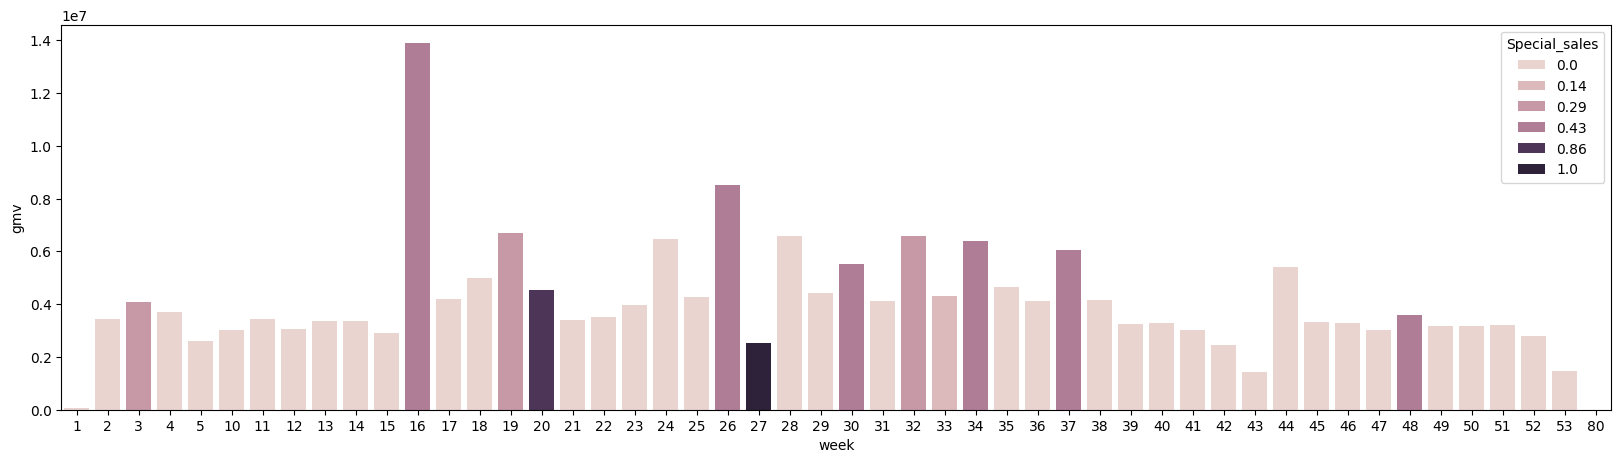

In [209]:
plt.figure(figsize=(20, 5))
sns.barplot(x= ha_week_viz['week'], y =ha_week_viz['gmv'], hue = ha_week_viz['Special_sales'], dodge = False)
plt.show()

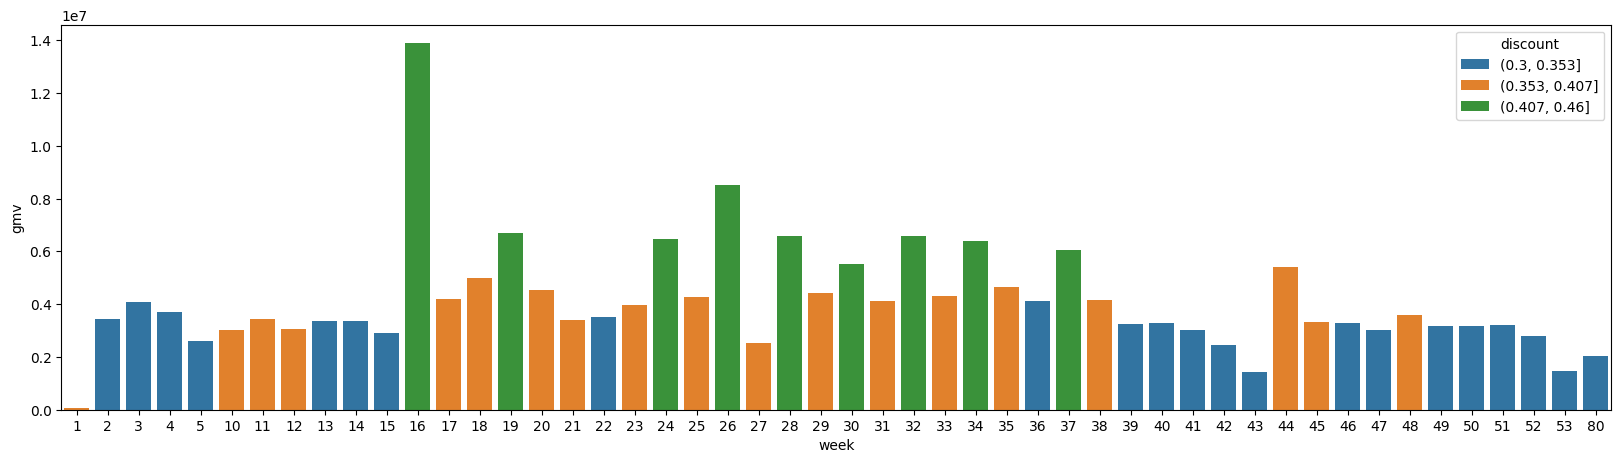

In [210]:
plt.figure(figsize=(20, 5))
sns.barplot(x= ha_week_viz['week'], y =ha_week_viz['gmv'], hue = pd.cut(ha_week_viz['discount'],3), dodge = False)
plt.show()

In [211]:
# Moving Average for Home Audio Accessory

# Moving Average for listed_price and discount_offer

ha_week[['MA2_LP','MA2_Discount']] = ha_week[['listing_price','discount']].rolling(window=2,min_periods=1).mean()
ha_week[['MA3_LP','MA3_Discount']] = ha_week[['listing_price','discount']].rolling(window=3,min_periods=1).mean()
ha_week[['MA4_LP','MA4_Discount']] = ha_week[['listing_price','discount']].rolling(window=4,min_periods=1).mean()

In [212]:
### Referencing listed price Inflation

ha_week['MA2_listed_price'] = (ha_week['listing_price']-ha_week['MA2_LP'])/ha_week['MA2_LP']
ha_week['MA3_listed_price'] = (ha_week['listing_price']-ha_week['MA3_LP'])/ha_week['MA3_LP']
ha_week['MA4_listed_price'] = (ha_week['listing_price']-ha_week['MA4_LP'])/ha_week['MA4_LP']

In [213]:
### Referencing discount Inflation

ha_week['MA2_discount'] = (ha_week['discount']-ha_week['MA2_Discount'])/ha_week['MA2_Discount']
ha_week['MA3_discount'] = (ha_week['discount']-ha_week['MA3_Discount'])/ha_week['MA3_Discount']
ha_week['MA4_discount'] = (ha_week['discount']-ha_week['MA4_Discount'])/ha_week['MA4_Discount']

In [214]:
ha_week.drop(['MA2_LP','MA3_LP','MA4_LP','MA2_Discount','MA3_Discount','MA4_Discount'], axis = 1, inplace = True)
ha_week.head(2)

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type      AOV  online_order_perc  index    NPS  Stock_Index  Special_sales  Payday  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  Year  Month  Total Investment  TV  Digital  Sponsorship  Content Marketing  Online marketing   Affiliates  SEM  Radio  Other  Adstocked_Advertising  TV_ads  Digital_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads  Affiliates_ads  SEM_ads  Radio_ads  Other_ads Date  MA2_listed_price  MA3_listed_price  MA4_listed_price  MA2_discount  MA3_discount  MA4_discount
0    1   83742.000       2392.629     4369.057     0.397 2.943                    3.486      19             35        35                  34 2392.629             97.143  0.000 54.600     1177.000          0.000   0.200         25.500         13.200          19.360               0.100               1.460            0.000            0.000              0.000              0.000   NaN    NaN               NaN NaN      NaN          NaN                NaN               NaN          NaN  NaN    NaN    NaN                    NaN     NaN          NaN              NaN                    NaN                   NaN             NaN      NaN        NaN        NaN  NaT             0.000             0.000             0.000         0.000         0.000         0.000
1    2 3438794.133       1854.852     2973.055     0.322 6.884                    2.736     196           1849      1848                 439 1860.819             23.743  1.000 54.600     1177.000          0.000   0.000         24.025         14.385          19.263               1.059               2.322            4.155            0.029              4.184              0.000   NaN    NaN               NaN NaN      NaN          NaN                NaN               NaN          NaN  NaN    NaN    NaN                    NaN     NaN          NaN              NaN                    NaN                   NaN             NaN      NaN        NaN        NaN  NaT            -0.127            -0.127            -0.127        -0.104        -0.104        -0.104

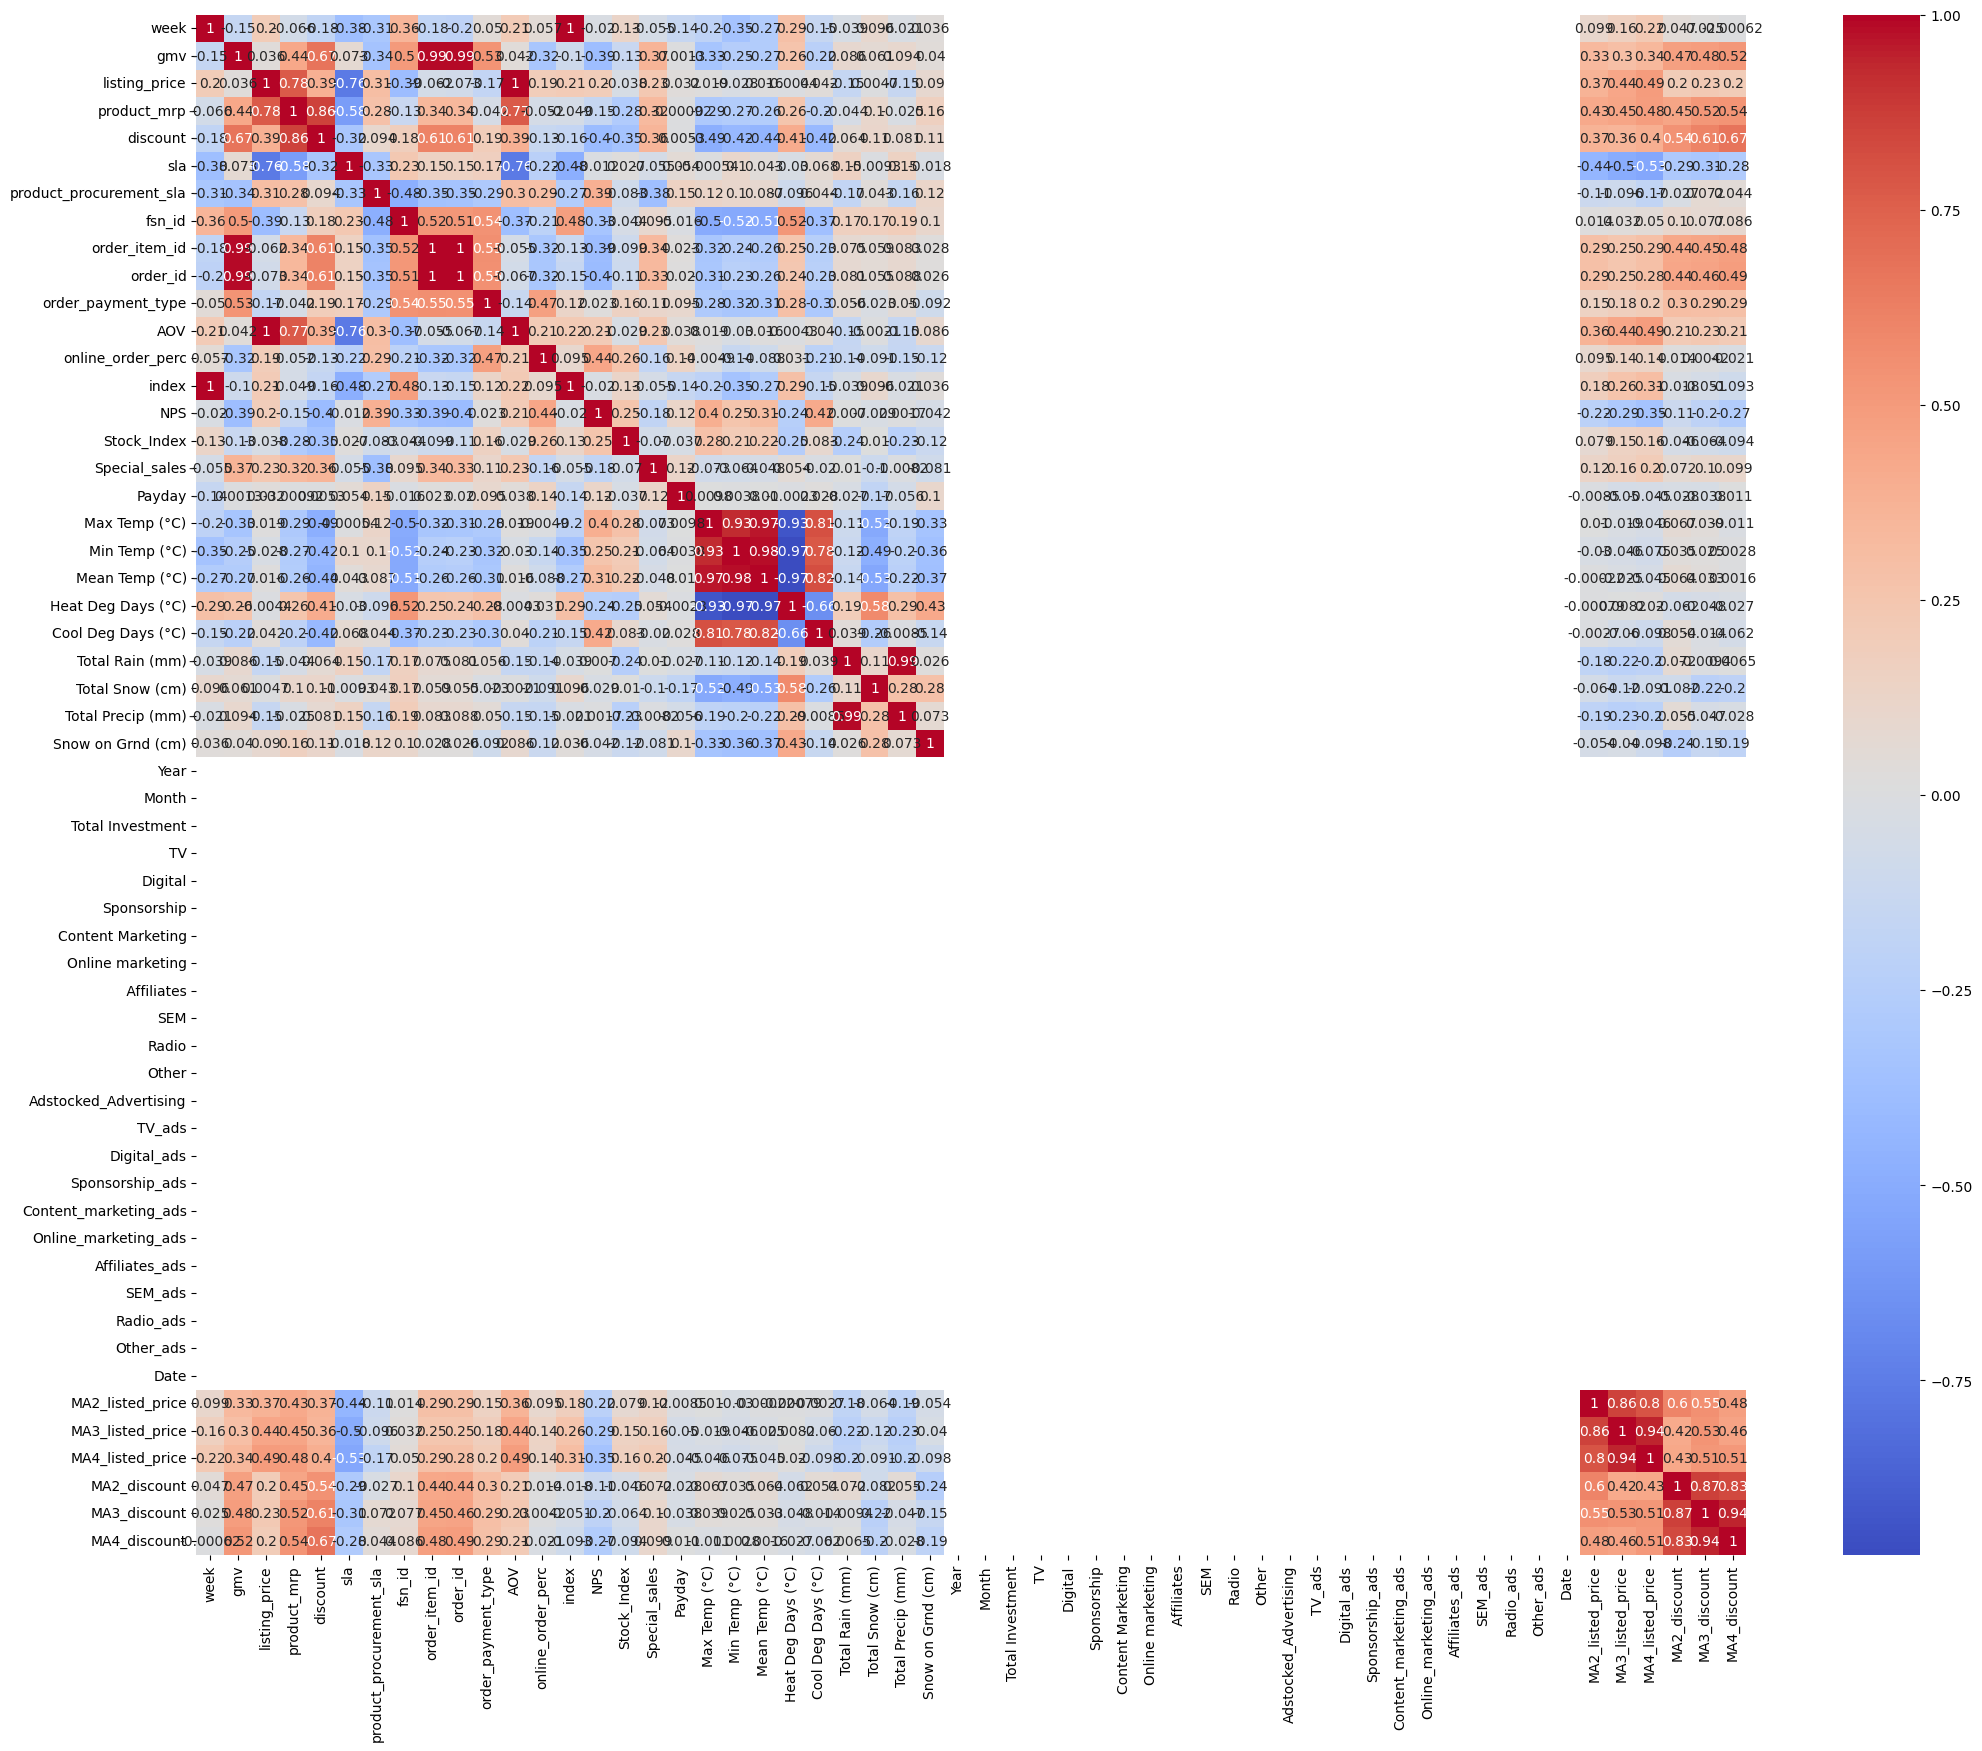

In [215]:
# Visualizing the multicollinearity

plt.figure(figsize=(25,20))

### Heatmap
sns.heatmap(ha_week.corr(), cmap="coolwarm", annot=True)
plt.show()

In [216]:
ha_week.drop(['TV', 'Digital', 'Sponsorship', 'Content Marketing','Online marketing', ' Affiliates', 'SEM','Radio',
              'Other','Affiliates_ads','SEM_ads','Digital_ads','Radio_ads','Other_ads','Mean Temp (°C)','Min Temp (°C)',
              'order_id','order_item_id','Total Precip (mm)','Total Investment','MA3_discount',
              'MA3_listed_price','AOV'], axis = 1, inplace = True)

In [217]:
ha_week.drop(['Max Temp (°C)'], axis = 1, inplace = True)
ha_week.head(2)

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_payment_type  online_order_perc  index    NPS  Stock_Index  Special_sales  Payday  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Snow on Grnd (cm)  Year  Month  Adstocked_Advertising  TV_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads Date  MA2_listed_price  MA4_listed_price  MA2_discount  MA4_discount
0    1   83742.000       2392.629     4369.057     0.397 2.943                    3.486      19                  34             97.143  0.000 54.600     1177.000          0.000   0.200               0.100               1.460            0.000            0.000              0.000   NaN    NaN                    NaN     NaN              NaN                    NaN                   NaN  NaT             0.000             0.000         0.000         0.000
1    2 3438794.133       1854.852     2973.055     0.322 6.884                    2.736     196                 439             23.743  1.000 54.600     1177.000          0.000   0.000               1.059               2.322            4.155            0.029              0.000   NaN    NaN                    NaN     NaN              NaN                    NaN                   NaN  NaT            -0.127            -0.127        -0.104        -0.104

In [218]:
# Filling the NaN's for even distribution of data

ha_week.fillna(0, inplace=True)
ha_week.head(2)

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_payment_type  online_order_perc  index    NPS  Stock_Index  Special_sales  Payday  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Snow on Grnd (cm)  Year  Month  Adstocked_Advertising  TV_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads  Date  MA2_listed_price  MA4_listed_price  MA2_discount  MA4_discount
0    1   83742.000       2392.629     4369.057     0.397 2.943                    3.486      19                  34             97.143  0.000 54.600     1177.000          0.000   0.200               0.100               1.460            0.000            0.000              0.000 0.000  0.000                  0.000   0.000            0.000                  0.000                 0.000     0             0.000             0.000         0.000         0.000
1    2 3438794.133       1854.852     2973.055     0.322 6.884                    2.736     196                 439             23.743  1.000 54.600     1177.000          0.000   0.000               1.059               2.322            4.155            0.029              0.000 0.000  0.000                  0.000   0.000            0.000                  0.000                 0.000     0            -0.127            -0.127        -0.104        -0.104

In [219]:
# Lag variable functions for Home Audio Accessory

ha_week['lag_1_listed_price'] = ha_week['listing_price'].shift(-1).fillna(0)
ha_week['lag_2_listed_price'] = ha_week['listing_price'].shift(-2).fillna(0)
ha_week['lag_3_listed_price'] = ha_week['listing_price'].shift(-3).fillna(0)

In [220]:
ha_week['lag_1_discount_offer'] = ha_week['discount'].shift(-1).fillna(0)
ha_week['lag_2_discount_offer'] = ha_week['discount'].shift(-2).fillna(0)
ha_week['lag_3_discount_offer'] = ha_week['discount'].shift(-3).fillna(0)

In [221]:
ha_week['lag_1_NPS'] = ha_week['NPS'].shift(-1).fillna(0)
ha_week['lag_2_NPS'] = ha_week['NPS'].shift(-2).fillna(0)
ha_week['lag_3_NPS'] = ha_week['NPS'].shift(-3).fillna(0)

In [222]:
ha_week['lag_1_Stock_Index'] = ha_week['Stock_Index'].shift(-1).fillna(0)
ha_week['lag_2_Stock_Index'] = ha_week['Stock_Index'].shift(-2).fillna(0)
ha_week['lag_3_Stock_Index'] = ha_week['Stock_Index'].shift(-3).fillna(0)

In [223]:
ha_week['lag_1_Special_sales'] = ha_week['Special_sales'].shift(-1).fillna(0)
ha_week['lag_2_Special_sales'] = ha_week['Special_sales'].shift(-2).fillna(0)
ha_week['lag_3_Special_sales'] = ha_week['Special_sales'].shift(-3).fillna(0)

In [224]:
ha_week['lag_1_Payday'] = ha_week['Payday'].shift(-1).fillna(0)
ha_week['lag_2_Payday'] = ha_week['Payday'].shift(-2).fillna(0)
ha_week['lag_3_Payday'] = ha_week['Payday'].shift(-3).fillna(0)

In [225]:
ha_week.head(2)

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_payment_type  online_order_perc  index    NPS  Stock_Index  Special_sales  Payday  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Snow on Grnd (cm)  Year  Month  Adstocked_Advertising  TV_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads  Date  MA2_listed_price  MA4_listed_price  MA2_discount  MA4_discount  lag_1_listed_price  lag_2_listed_price  lag_3_listed_price  lag_1_discount_offer  lag_2_discount_offer  lag_3_discount_offer  lag_1_NPS  lag_2_NPS  lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  lag_1_Special_sales  lag_2_Special_sales  lag_3_Special_sales  lag_1_Payday  lag_2_Payday  lag_3_Payday
0    1   83742.000       2392.629     4369.057     0.397 2.943                    3.486      19                  34             97.143  0.000 54.600     1177.000          0.000   0.200               0.100               1.460            0.000            0.000              0.000 0.000  0.000                  0.000   0.000            0.000                  0.000                 0.000     0             0.000             0.000         0.000         0.000            1854.852            1842.456            1775.448                 0.322                 0.338                 0.325     54.600     54.600     54.600           1177.000           1177.000           1177.000                0.000                0.286                0.000         0.000         0.143         0.000
1    2 3438794.133       1854.852     2973.055     0.322 6.884                    2.736     196                 439             23.743  1.000 54.600     1177.000          0.000   0.000               1.059               2.322            4.155            0.029              0.000 0.000  0.000                  0.000   0.000            0.000                  0.000                 0.000     0            -0.127            -0.127        -0.104        -0.104            1842.456            1775.448            1815.049                 0.338                 0.325                 0.324     54.600     54.600     56.139           1177.000           1177.000           1185.286                0.286                0.000                0.000         0.143         0.000         0.143

# Step 6: Model Building - Marketing Mix Wise (Linear, Logarithmic and Multiplicative Model)

### Model Building - Camera Accessory

##### 1. Linear/Basic Model



In [226]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_payment_type', 'premium_product', 'online_order_perc', 'index', 'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)', 'Year', 'Month', 'Adstocked_Advertising', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'Date', 'MA4_listed_price', 'MA2_discount_offer', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount', 'lag_2_discount', 'lag_3_discount', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS'], dtype='object')

In [227]:
camera_lm = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'MA4_listed_price',
       'MA2_discount_offer','premium_product']]


camera_lm.head(2)

gmv  discount   sla  product_procurement_sla  order_payment_type  online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Snow on Grnd (cm)  MA4_listed_price  MA2_discount_offer  premium_product
0   11151.000     0.491 2.423                    2.731                  26            100.000   0.000            0.000                  0.000                 0.000 54.600     1177.000          0.000   0.200               0.100               1.460            0.000            0.000              0.000             0.000               0.000                0
1 1160259.000     0.452 6.853                    2.549                 715             31.834   0.000            0.000                  0.000                 0.000 54.600     1177.000          0.000   0.000               1.059               2.322            4.155            0.029              0.000             0.081              -0.041                0

In [228]:
### Checking for any NaN value

camera_lm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     0
Sponsorship_ads            0
Content_marketing_ads      0
Online_marketing_ads       0
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
Heat Deg Days (°C)         0
Cool Deg Days (°C)         0
Total Rain (mm)            0
Total Snow (cm)            0
Snow on Grnd (cm)          0
MA4_listed_price           0
MA2_discount_offer         0
premium_product            0
dtype: int64

In [229]:
# Splitting the train and test dataset

np.random.seed(0)
df_train, df_test = train_test_split(camera_lm, train_size = 0.7, test_size = 0.3, random_state = 100)

In [230]:
### Creating scaling object

scaler = MinMaxScaler()


### Creating a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'MA4_listed_price',
       'MA2_discount_offer','premium_product']

### Scaling these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [231]:
df_train.head(2)

gmv  discount   sla  product_procurement_sla  order_payment_type  online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Snow on Grnd (cm)  MA4_listed_price  MA2_discount_offer  premium_product
26 0.529     0.423 0.346                    0.931               0.172              0.000   0.000            0.000                  0.000                 0.000 0.173        0.163          0.000   0.000               0.862               0.189            0.501            0.731              0.000             0.000               0.877            0.000
41 0.237     0.708 0.000                    0.674               0.437              0.948   0.000            0.000                  0.000                 0.000 0.477        1.000          0.000   0.000               0.400               0.142            0.054            0.039              0.000             0.450               0.776            0.000

In [232]:
### Splitting the train dataset into X and y

X_train = df_train.drop('gmv',axis=1)
y_train = df_train['gmv']

In [233]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [234]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('discount', np.True_, np.int64(1)),
 ('sla', np.True_, np.int64(1)),
 ('product_procurement_sla', np.True_, np.int64(1)),
 ('order_payment_type', np.True_, np.int64(1)),
 ('online_order_perc', np.True_, np.int64(1)),
 ('TV_ads', np.False_, np.int64(10)),
 ('Sponsorship_ads', np.False_, np.int64(11)),
 ('Content_marketing_ads', np.False_, np.int64(9)),
 ('Online_marketing_ads', np.False_, np.int64(8)),
 ('NPS', np.True_, np.int64(1)),
 ('Stock_Index', np.False_, np.int64(6)),
 ('Special_sales', np.True_, np.int64(1)),
 ('Payday', np.False_, np.int64(4)),
 ('Heat Deg Days (°C)', np.False_, np.int64(7)),
 ('Cool Deg Days (°C)', np.False_, np.int64(5)),
 ('Total Rain (mm)', np.False_, np.int64(3)),
 ('Total Snow (cm)', np.True_, np.int64(1)),
 ('Snow on Grnd (cm)', np.False_, np.int64(2)),
 ('MA4_listed_price', np.True_, np.int64(1)),
 ('MA2_discount_offer', np.True_, np.int64(1)),
 ('premium_product', np.False_, np.int64(12))]

In [235]:
X_train.columns[rfe.support_]

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'online_order_perc', 'NPS', 'Special_sales', 'Total Snow (cm)', 'MA4_listed_price', 'MA2_discount_offer'], dtype='object')

In [236]:
# Building model with statsmodel

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head(2)

discount   sla  product_procurement_sla  order_payment_type  online_order_perc   NPS  Special_sales  Total Snow (cm)  MA4_listed_price  MA2_discount_offer
26     0.423 0.346                    0.931               0.172              0.000 0.173          0.000            0.731             0.000               0.877
41     0.708 0.000                    0.674               0.437              0.948 0.477          0.000            0.039             0.450               0.776

In [237]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [238]:
# Model 1

X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     29.30
Date:                Tue, 06 May 2025   Prob (F-statistic):           1.22e-11
Time:                        12:20:52   Log-Likelihood:                 61.341
No. Observations:                  37   AIC:                            -100.7
Df Residuals:                      26   BIC:                            -82.96
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [239]:
checkVIF(X_train_new)

Features     VIF
0                     const 315.270
1                  discount   8.500
3   product_procurement_sla   7.640
10       MA2_discount_offer   5.270
5         online_order_perc   5.150
4        order_payment_type   4.590
2                       sla   4.050
6                       NPS   2.420
9          MA4_listed_price   2.290
7             Special_sales   1.500
8           Total Snow (cm)   1.430

In [240]:
# Dropping columns to adjust the VIF

X_train_new = X_train_rfe.drop(["discount"], axis = 1)

In [241]:
# Model 2

X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     22.10
Date:                Tue, 06 May 2025   Prob (F-statistic):           3.08e-10
Time:                        12:20:59   Log-Likelihood:                 54.262
No. Observations:                  37   AIC:                            -88.52
Df Residuals:                      27   BIC:                            -72.41
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [242]:
# Checking VIF once again

checkVIF(X_train_new)

Features     VIF
0                    const 104.370
9       MA2_discount_offer   4.890
4        online_order_perc   4.240
2  product_procurement_sla   3.850
3       order_payment_type   3.210
1                      sla   2.350
5                      NPS   2.010
8         MA4_listed_price   2.010
6            Special_sales   1.450
7          Total Snow (cm)   1.200

In [243]:
# So we can see that all the parameters have VIF less than 5, so we can move on to Residual Analysis of Model

lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

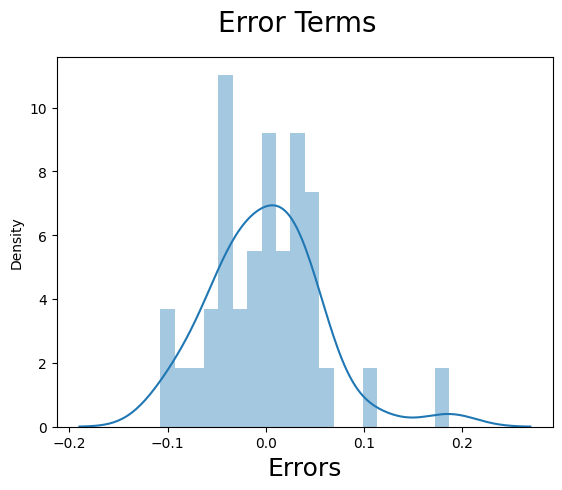

In [244]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

##### Error curve looks like an approximate normal distribution, so the assumption on the linear modeling seems to be fulfilled.

In [245]:
# Prediction and Evaluation

#Scaling the test set
num_vars = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
              'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'MA4_listed_price',
       'MA2_discount_offer','premium_product']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [246]:
#Dividing into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [247]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [248]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [249]:
r2_score(y_test, y_pred)

0.8314157388785294

Text(0, 0.5, 'y_pred')

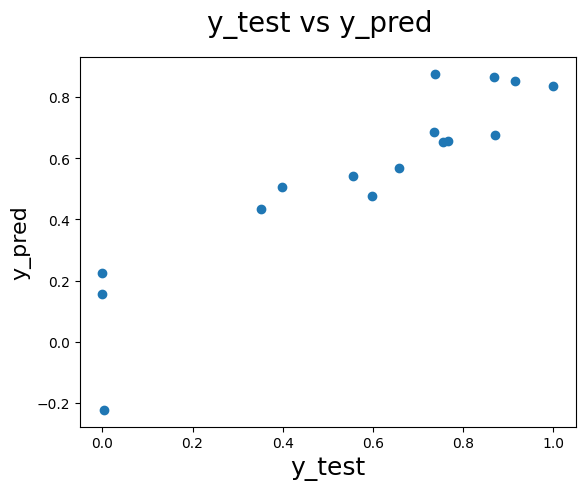

In [250]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

#### Insights

##### Positive Correlation: Generally, as the true values (y_test) increase, the predicted values (y_pred) also tend to increase. This indicates that your model has captured some of the underlying relationship in the data.

##### Scatter Indicates Errors: The fact that the points aren't perfectly aligned along a straight diagonal line (where y_test would equal y_pred) shows that there are errors in the predictions. The further a point is from this imaginary diagonal, the larger the prediction error for that particular data point.

In [251]:
#Evaluation of the model statistics

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     22.10
Date:                Tue, 06 May 2025   Prob (F-statistic):           3.08e-10
Time:                        12:21:31   Log-Likelihood:                 54.262
No. Observations:                  37   AIC:                            -88.52
Df Residuals:                      27   BIC:                            -72.41
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### Model Summary:

##### The linear regression model achieved an R-squared of 0.88, indicating that 88% of the variation in GMV

##### The variation is explained by the selected predictors. The adjusted R-squared (0.84) confirms the model's strong fit.

##### Significant drivers include order_payment_type (positive), online_order_perc (negative), and special_sales (positive).

##### While a few variables like discount and snow did not show statistical significance

##### Overall we can say that the model performed well.

##### 2. Logarithmic Model

In [252]:
# Log transform target

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [253]:
# Training the model

lr = LinearRegression()
lr.fit(X_train, y_train_log)

LinearRegression()

In [254]:
# Predicting on test

y_pred_log = lr.predict(X_test)

In [255]:
# Converting prediction back to original scale

y_pred = np.expm1(y_pred_log)

In [256]:
# Evaluating

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE (on original scale): {rmse:.4f}")

RMSE (on original scale): 0.1723


#### Model Summary:

##### The log-linear model yielded an RMSE of 0.1723 on the original GMV scale,
##### It indicates a reasonably good fit with low prediction error.
##### The logarithmic transformation helped stabilize variance and capture non-linear effects.


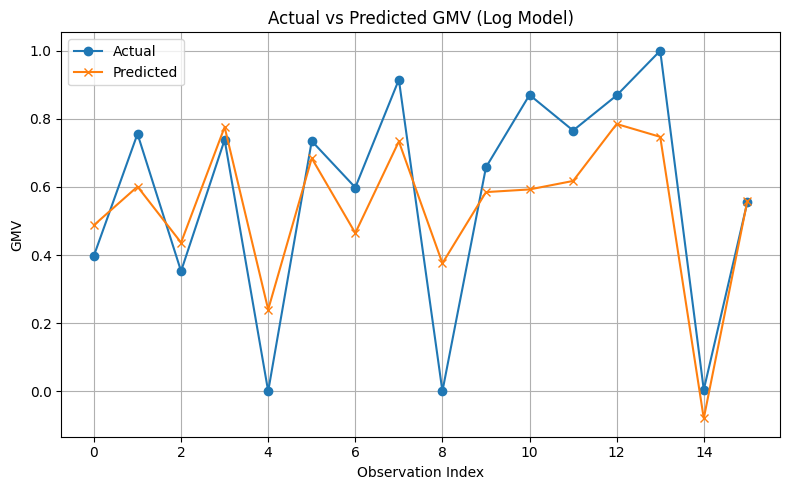

In [257]:
# Visualizing the RMSE score for a comprehensive view

plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted GMV (Log Model)")
plt.xlabel("Observation Index")
plt.ylabel("GMV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### 3. Multiplicative Model

In [258]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_payment_type', 'premium_product', 'online_order_perc', 'index', 'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)', 'Year', 'Month', 'Adstocked_Advertising', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'Date', 'MA4_listed_price', 'MA2_discount_offer', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount', 'lag_2_discount', 'lag_3_discount', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS'], dtype='object')

In [259]:
camera_mm = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)','MA4_listed_price','MA2_discount_offer']]

camera_mm.head(2)

gmv  discount   sla  product_procurement_sla  order_payment_type  online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Snow on Grnd (cm)  MA4_listed_price  MA2_discount_offer
0   11151.000     0.491 2.423                    2.731                  26            100.000   0.000            0.000                  0.000                 0.000 54.600     1177.000          0.000   0.200               0.100               1.460            0.000            0.000              0.000             0.000               0.000
1 1160259.000     0.452 6.853                    2.549                 715             31.834   0.000            0.000                  0.000                 0.000 54.600     1177.000          0.000   0.000               1.059               2.322            4.155            0.029              0.000             0.081              -0.041

In [260]:
### Applying Log
camera_mm=np.log(camera_mm)

camera_mm = camera_mm.fillna(0)
camera_mm = camera_mm.replace([np.inf, -np.inf], 0)

In [261]:
camera_mm.head(2)

gmv  discount   sla  product_procurement_sla  order_payment_type  online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Snow on Grnd (cm)  MA4_listed_price  MA2_discount_offer
0  9.319    -0.712 0.885                    1.005               3.258              4.605   0.000            0.000                  0.000                 0.000 4.000        7.071          0.000  -1.609              -2.303               0.378            0.000            0.000              0.000             0.000               0.000
1 13.964    -0.794 1.925                    0.936               6.572              3.461   0.000            0.000                  0.000                 0.000 4.000        7.071          0.000   0.000               0.057               0.842            1.424           -3.532              0.000            -2.516               0.000

In [262]:
# Scaling the dataset

scaler = MinMaxScaler()

# Creating a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'MA4_listed_price',
       'MA2_discount_offer']

### Scaling these variables using 'fit_transform'
camera_mm[varlist] = scaler.fit_transform(camera_mm[varlist])

In [263]:
# Splitting the train dataset into X and y

x = camera_mm.drop('gmv',axis=1)
y = camera_mm['gmv']

camera_train_mm = camera_mm

In [264]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(53, 20) (53,)


In [265]:
### Instantiate
mm = LinearRegression()

### Fit a line
mm.fit(x,y)

LinearRegression()

In [266]:
### Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

0  Coefficient
0                  discount       -0.322
1                       sla       -0.110
2   product_procurement_sla       -0.180
3        order_payment_type        1.065
4         online_order_perc       -0.270
5                    TV_ads       -0.000
6           Sponsorship_ads       -0.000
7     Content_marketing_ads       -0.000
8      Online_marketing_ads        0.000
9                       NPS       -1.966
10              Stock_Index        1.829
11            Special_sales       -0.004
12                   Payday        0.009
13       Heat Deg Days (°C)        0.049
14       Cool Deg Days (°C)        0.064
15          Total Rain (mm)        0.003
16          Total Snow (cm)       -0.029
17        Snow on Grnd (cm)        0.036
18         MA4_listed_price        0.053
19       MA2_discount_offer       -0.007

In [267]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'online_order_perc', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)', 'MA4_listed_price', 'MA2_discount_offer'], dtype='object')

In [268]:
# Creating elasticity

df = pd.DataFrame({
    'Feature': ['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'online_order_perc', 'NPS', 'Stock_Index', 'Special_sales', 'Payday'],
    'Elasticity': [-0.322, -0.110, -0.180, 1.065, -0.270, -1.966, 1.829, -0.004, 0.009]
})

df = df.round(3)
df.sort_values(by='Elasticity', ascending=False, inplace=True)


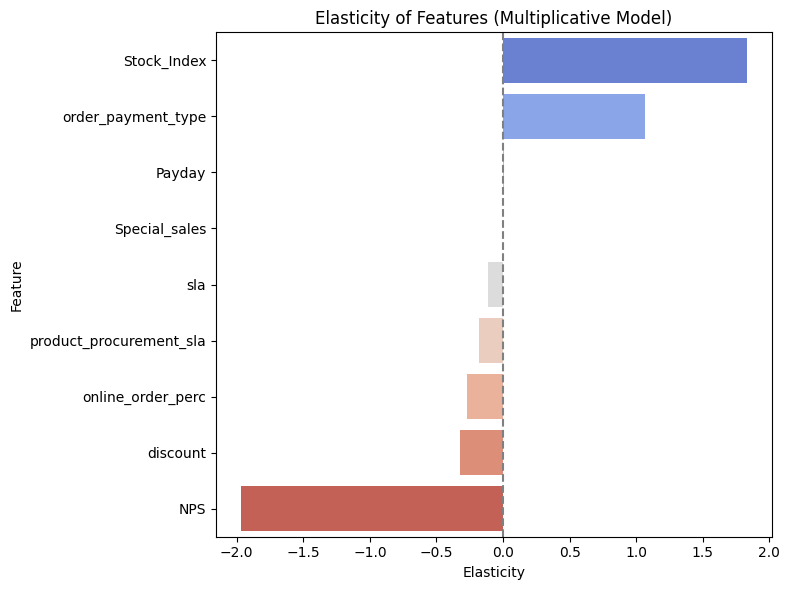

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x='Elasticity', y='Feature', data=df, palette='coolwarm')
plt.title('Elasticity of Features (Multiplicative Model)')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


### Multiplicative model

#### coefficients directly represent elasticities.
#### Positive elasticities indicate a % increase in GMV with a 1% increase in the variable.
#### Negative elasticities show diminishing returns or adverse effects.
#### Key positive drivers: order_payment_type (1.07), Stock_Index (1.83)
#### Strong negative drivers: NPS (-1.97), discount (-0.32), online_order_perc (-0.27)

# Model Building - Gaming Accessory

### 1. Linear/Basic Model

In [270]:
ga_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_payment_type', 'online_order_perc', 'index', 'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)', 'Year', 'Month', 'Adstocked_Advertising', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'Date', 'MA2_listed_price', 'MA2_discount', 'MA4_discount', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday'], dtype='object')

In [272]:
gaming_lm = ga_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)', 'MA2_listed_price']]


gaming_lm.head(2)

gmv  discount   sla  product_procurement_sla  order_payment_type  online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Snow on Grnd (cm)  MA2_listed_price
0   17466.000     0.220 2.960                    2.560                  25            100.000   0.000            0.000                  0.000                 0.000 54.600     1177.000          0.000   0.200               0.100               1.460            0.000            0.000              0.000             0.000
1 1395022.000     0.412 5.055                    3.026                 678             26.289   0.000            0.000                  0.000                 0.000 54.600     1177.000          0.000   0.000               1.059               2.322            4.155            0.029              0.000            -0.131

In [273]:
### Checking for any NaN values

gaming_lm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     0
Sponsorship_ads            0
Content_marketing_ads      0
Online_marketing_ads       0
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
Heat Deg Days (°C)         0
Cool Deg Days (°C)         0
Total Rain (mm)            0
Total Snow (cm)            0
Snow on Grnd (cm)          0
MA2_listed_price           0
dtype: int64

In [367]:
# Splitting the train and test dataset

np.random.seed(0)
df_train, df_test = train_test_split(gaming_lm, train_size = 0.7, test_size = 0.3, random_state = 100)

In [368]:
### Creating a scaling object

scaler = MinMaxScaler()


### Creating a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)']


### Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [369]:
df_train.head(2)

gmv  discount   sla  product_procurement_sla  order_payment_type  online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Snow on Grnd (cm)  MA2_listed_price
41 0.310     0.544 0.809                    0.389               0.782              1.000   0.000            0.000                  0.000                 0.000 0.477        1.000          0.000   1.000               0.639               0.094            0.000            0.027              0.000             0.429
42 0.211     0.625 0.441                    0.181               0.523              0.975   0.000            0.000                  0.000                 0.000 0.477        1.000          0.000   0.000               0.456               0.142            0.045            0.054              0.000             0.437

In [370]:
### Splitting the train dataset into X and y

X_train = df_train.drop('gmv',axis=1)
y_train = df_train['gmv']

In [371]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [372]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('discount', np.True_, np.int64(1)),
 ('sla', np.True_, np.int64(1)),
 ('product_procurement_sla', np.False_, np.int64(5)),
 ('order_payment_type', np.True_, np.int64(1)),
 ('online_order_perc', np.True_, np.int64(1)),
 ('TV_ads', np.False_, np.int64(9)),
 ('Sponsorship_ads', np.False_, np.int64(7)),
 ('Content_marketing_ads', np.False_, np.int64(10)),
 ('Online_marketing_ads', np.False_, np.int64(8)),
 ('NPS', np.True_, np.int64(1)),
 ('Stock_Index', np.False_, np.int64(3)),
 ('Special_sales', np.False_, np.int64(2)),
 ('Payday', np.False_, np.int64(6)),
 ('Heat Deg Days (°C)', np.True_, np.int64(1)),
 ('Cool Deg Days (°C)', np.True_, np.int64(1)),
 ('Total Rain (mm)', np.False_, np.int64(4)),
 ('Total Snow (cm)', np.True_, np.int64(1)),
 ('Snow on Grnd (cm)', np.True_, np.int64(1)),
 ('MA2_listed_price', np.True_, np.int64(1))]

In [373]:
X_train.columns[rfe.support_]

Index(['discount', 'sla', 'order_payment_type', 'online_order_perc', 'NPS', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Snow (cm)', 'Snow on Grnd (cm)', 'MA2_listed_price'], dtype='object')

In [374]:
# Building model with statsmodel

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head(2)

discount   sla  order_payment_type  online_order_perc   NPS  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Snow (cm)  Snow on Grnd (cm)  MA2_listed_price
41     0.544 0.809               0.782              1.000 0.477               0.639               0.094            0.027              0.000             0.429
42     0.625 0.441               0.523              0.975 0.477               0.456               0.142            0.054              0.000             0.437

In [375]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [376]:
# Model 1

X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     15.49
Date:                Tue, 06 May 2025   Prob (F-statistic):           1.50e-08
Time:                        13:47:15   Log-Likelihood:                 48.239
No. Observations:                  37   AIC:                            -74.48
Df Residuals:                      26   BIC:                            -56.76
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1821      0

In [377]:
# Checking the VIF

checkVIF(X_train_new)

Features    VIF
0                const 85.120
6   Heat Deg Days (°C)  6.980
8      Total Snow (cm)  4.270
4    online_order_perc  4.100
2                  sla  3.960
3   order_payment_type  3.930
7   Cool Deg Days (°C)  3.510
10    MA2_listed_price  2.410
1             discount  2.350
9    Snow on Grnd (cm)  2.340
5                  NPS  2.250

In [378]:
# Dropping columns to adjust the VIF

X_train_new = X_train_rfe.drop(["Heat Deg Days (°C)"], axis = 1)

In [379]:
# Model 2

X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     17.75
Date:                Tue, 06 May 2025   Prob (F-statistic):           3.67e-09
Time:                        13:47:40   Log-Likelihood:                 48.129
No. Observations:                  37   AIC:                            -76.26
Df Residuals:                      27   BIC:                            -60.15
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1797      0

In [380]:
# Checking VIF once again

checkVIF(X_train_new)

Features    VIF
0               const 84.890
3  order_payment_type  3.820
4   online_order_perc  3.740
2                 sla  2.990
6  Cool Deg Days (°C)  2.730
7     Total Snow (cm)  2.410
9    MA2_listed_price  2.290
5                 NPS  2.240
8   Snow on Grnd (cm)  2.180
1            discount  1.850

In [381]:
# So we can see that all the parameters have VIF less than 5, so we can move on to Residual Analysis of Model

lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

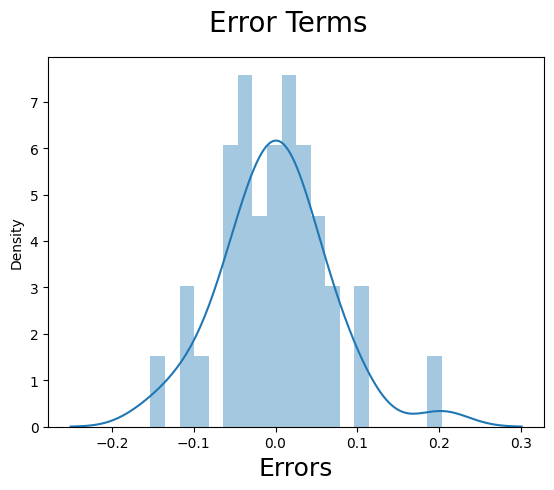

In [382]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

##### Error curve looks like an approximate normal distribution, so the assumption on the linear modeling seems to be fulfilled.

In [384]:
# Prediction and Evaluation

num_vars = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
              'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [385]:
#Dividing into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [386]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [387]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [388]:
r2_score(y_test, y_pred)

-1.1026050110248824

Text(0, 0.5, 'y_pred')

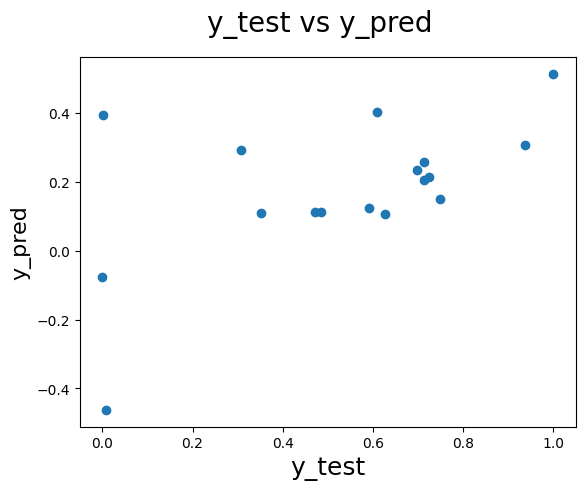

In [389]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [390]:
#Evaluation of the model statistics

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     17.75
Date:                Tue, 06 May 2025   Prob (F-statistic):           3.67e-09
Time:                        13:49:32   Log-Likelihood:                 48.129
No. Observations:                  37   AIC:                            -76.26
Df Residuals:                      27   BIC:                            -60.15
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1797      0

### Model Summary

##### The model explains approximately 85.5% of the variance in GMV, with several predictors like order_payment_type, online_order_perc, and NPS showing strong statistical significance. Overall, the model demonstrates a solid fit and captures key drivers of GMV effectively.

#### 2. Logarithmic Model


In [300]:
# Log transform target

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [301]:
# Training the model

lr = LinearRegression()
lr.fit(X_train, y_train_log)

LinearRegression()

In [302]:
# Predicting on test

y_pred_log = lr.predict(X_test)

In [303]:
# Converting prediction back to original scale

y_pred = np.expm1(y_pred_log)

In [304]:
# Evaluating

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE (on original scale): {rmse:.4f}")

RMSE (on original scale): 0.3281


#### Model Summary

#### The RMSE of 0.3281 on the logarithmic model indicates a reasonably good predictive accuracy, especially considering the transformed nature of the target variable.

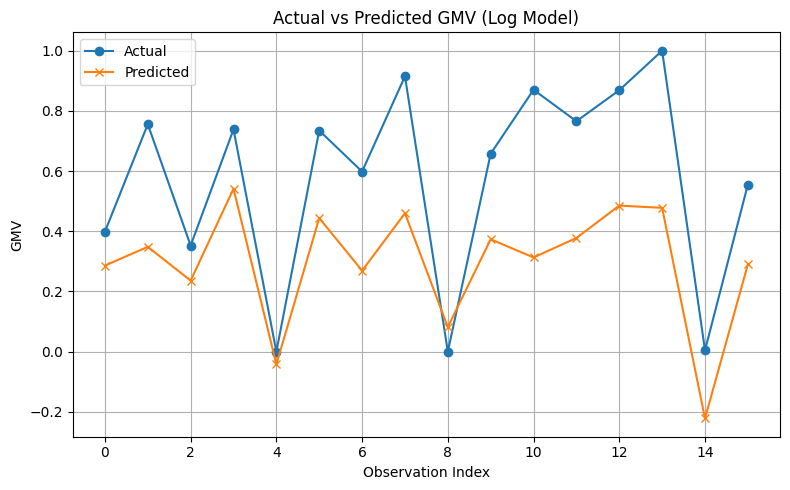

In [305]:
# Visualizing the RMSE score for a comprehensive view

plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted GMV (Log Model)")
plt.xlabel("Observation Index")
plt.ylabel("GMV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 3. Multiplicative Model

In [306]:
ga_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_payment_type', 'online_order_perc', 'index', 'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)', 'Year', 'Month', 'Adstocked_Advertising', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'Date', 'MA2_listed_price', 'MA2_discount', 'MA4_discount', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday'], dtype='object')

In [308]:
gaming_mm = ga_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)']]

gaming_mm.head(2)

gmv  discount   sla  product_procurement_sla  order_payment_type  online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Snow on Grnd (cm)
0   17466.000     0.220 2.960                    2.560                  25            100.000   0.000            0.000                  0.000                 0.000 54.600     1177.000          0.000   0.200               0.100               1.460            0.000            0.000              0.000
1 1395022.000     0.412 5.055                    3.026                 678             26.289   0.000            0.000                  0.000                 0.000 54.600     1177.000          0.000   0.000               1.059               2.322            4.155            0.029              0.000

In [309]:
### Applying Log

gaming_mm=np.log(gaming_mm)

gaming_mm = gaming_mm.fillna(0)
gaming_mm = gaming_mm.replace([np.inf, -np.inf], 0)

In [310]:
gaming_mm.head(2)

gmv  discount   sla  product_procurement_sla  order_payment_type  online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Snow on Grnd (cm)
0  9.768    -1.516 1.085                    0.940               3.219              4.605   0.000            0.000                  0.000                 0.000 4.000        7.071          0.000  -1.609              -2.303               0.378            0.000            0.000              0.000
1 14.148    -0.886 1.620                    1.107               6.519              3.269   0.000            0.000                  0.000                 0.000 4.000        7.071          0.000   0.000               0.057               0.842            1.424           -3.532              0.000

In [311]:
# Scaling the dataset

scaler = MinMaxScaler()

# Creating a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)']

### Scaling these variables using 'fit_transform'
gaming_mm[varlist] = scaler.fit_transform(gaming_mm[varlist])

In [312]:
# Splitting the train dataset into X and y

x = gaming_mm.drop('gmv',axis=1)
y = gaming_mm['gmv']

gaming_train_mm = gaming_mm

In [313]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(54, 18) (54,)


In [314]:
### Instantiate
mm = LinearRegression()

### Fit a line
mm.fit(x,y)

LinearRegression()

In [315]:
### Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

0  Coefficient
0                  discount       -0.199
1                       sla        0.141
2   product_procurement_sla        0.037
3        order_payment_type        1.343
4         online_order_perc       -0.534
5                    TV_ads        0.000
6           Sponsorship_ads       -0.000
7     Content_marketing_ads        0.000
8      Online_marketing_ads        0.000
9                       NPS       -0.658
10              Stock_Index        0.675
11            Special_sales        0.017
12                   Payday        0.003
13       Heat Deg Days (°C)       -0.180
14       Cool Deg Days (°C)       -0.001
15          Total Rain (mm)       -0.006
16          Total Snow (cm)        0.058
17        Snow on Grnd (cm)        0.031

In [316]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'online_order_perc', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)'], dtype='object')

In [320]:
# Creating elasticity

df = pd.DataFrame({
    'Feature': ['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'online_order_perc', 'NPS', 'Stock_Index', 'Special_sales', 'Payday'],
    'Elasticity': [-0.199, 0.141, 0.037, 1.343, -0.534, -0.658, 0.675, 0.017, 0.003]
})

df = df.round(3)
df.sort_values(by='Elasticity', ascending=False, inplace=True)


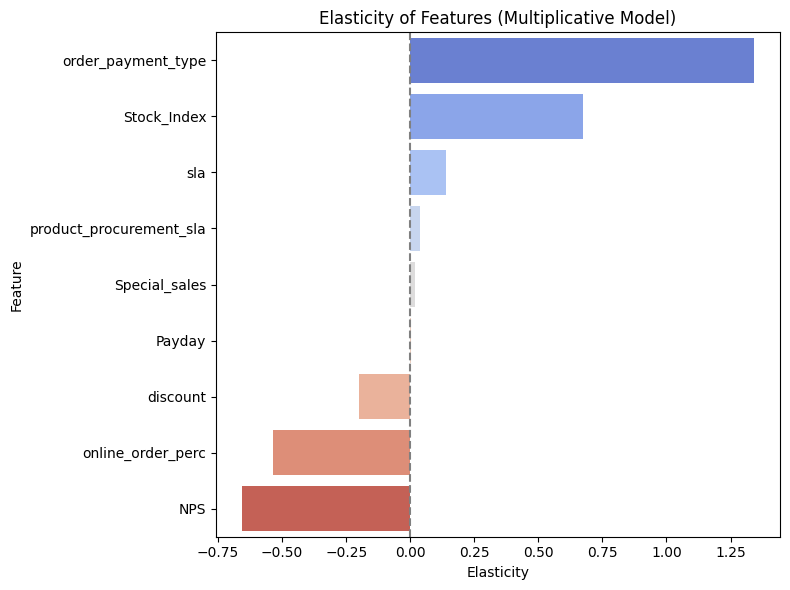

In [321]:
# Visualizing the elasticity

plt.figure(figsize=(8, 6))
sns.barplot(x='Elasticity', y='Feature', data=df, palette='coolwarm')
plt.title('Elasticity of Features (Multiplicative Model)')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

##### Multiplicative Model

##### The bar chart displays the elasticity of various features in a multiplicative model. Positive elasticity indicates that a one percent increase in the feature leads to a greater than one percent increase in the target variable, while negative elasticity suggests the opposite.

##### 'order_payment_type' shows the highest positive impact, meaning changes in payment methods strongly influence the target. 'Stock_Index' and 'sla' also have positive elasticities. Conversely, 'NPS', 'online_order_perc', and 'discount' exhibit negative elasticities, implying that increases in these features are associated with a decrease in the target variable. The remaining features have relatively small elasticities close to zero.

### Model Building - Home Audio Accessory

#### 1. Linear/Basic Model





In [322]:
ha_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_payment_type', 'online_order_perc', 'index', 'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)', 'Year', 'Month', 'Adstocked_Advertising', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'Date', 'MA2_listed_price', 'MA4_listed_price', 'MA2_discount', 'MA4_discount', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday'], dtype='object')

In [324]:
home_audio_lm = ha_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'MA4_listed_price']]


home_audio_lm.head(2)

gmv  discount   sla  product_procurement_sla  order_payment_type  online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Snow on Grnd (cm)  MA4_listed_price
0   83742.000     0.397 2.943                    3.486                  34             97.143   0.000            0.000                  0.000                 0.000 54.600     1177.000          0.000   0.200               0.100               1.460            0.000            0.000              0.000             0.000
1 3438794.133     0.322 6.884                    2.736                 439             23.743   0.000            0.000                  0.000                 0.000 54.600     1177.000          0.000   0.000               1.059               2.322            4.155            0.029              0.000            -0.127

In [325]:
### Checking for any NaN value

home_audio_lm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     0
Sponsorship_ads            0
Content_marketing_ads      0
Online_marketing_ads       0
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
Heat Deg Days (°C)         0
Cool Deg Days (°C)         0
Total Rain (mm)            0
Total Snow (cm)            0
Snow on Grnd (cm)          0
MA4_listed_price           0
dtype: int64

In [326]:
# Splitting the train and test dataset

np.random.seed(0)
df_train, df_test = train_test_split(home_audio_lm, train_size = 0.7, test_size = 0.3, random_state = 100)

In [327]:
### Creating scaling object

scaler = MinMaxScaler()


### Creating a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'MA4_listed_price']

### Scaling these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [328]:
df_train.head(2)

gmv  discount   sla  product_procurement_sla  order_payment_type  online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Snow on Grnd (cm)  MA4_listed_price
25 0.572     0.718 0.480                    0.514               0.298              0.163   0.000            0.000                  0.000                 0.000 0.230        0.164          0.429   0.000               0.416               0.331            0.121            0.079              0.000             0.545
26 0.376     0.493 0.540                    0.704               0.167              0.096   0.000            0.000                  0.000                 0.000 0.230        0.164          0.000   0.000               0.587               0.283            0.121            0.079              0.000             0.519

In [329]:
### Splitting the train dataset into X and y

X_train = df_train.drop('gmv',axis=1)
y_train = df_train['gmv']

In [330]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [331]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('discount', np.True_, np.int64(1)),
 ('sla', np.True_, np.int64(1)),
 ('product_procurement_sla', np.True_, np.int64(1)),
 ('order_payment_type', np.True_, np.int64(1)),
 ('online_order_perc', np.True_, np.int64(1)),
 ('TV_ads', np.False_, np.int64(8)),
 ('Sponsorship_ads', np.False_, np.int64(10)),
 ('Content_marketing_ads', np.False_, np.int64(7)),
 ('Online_marketing_ads', np.False_, np.int64(9)),
 ('NPS', np.True_, np.int64(1)),
 ('Stock_Index', np.True_, np.int64(1)),
 ('Special_sales', np.True_, np.int64(1)),
 ('Payday', np.False_, np.int64(4)),
 ('Heat Deg Days (°C)', np.False_, np.int64(5)),
 ('Cool Deg Days (°C)', np.True_, np.int64(1)),
 ('Total Rain (mm)', np.False_, np.int64(3)),
 ('Total Snow (cm)', np.False_, np.int64(6)),
 ('Snow on Grnd (cm)', np.False_, np.int64(2)),
 ('MA4_listed_price', np.True_, np.int64(1))]

In [332]:
X_train.columns[rfe.support_]

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'online_order_perc', 'NPS', 'Stock_Index', 'Special_sales', 'Cool Deg Days (°C)', 'MA4_listed_price'], dtype='object')

In [333]:
# Building model with statsmodel

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head(2)

discount   sla  product_procurement_sla  order_payment_type  online_order_perc   NPS  Stock_Index  Special_sales  Cool Deg Days (°C)  MA4_listed_price
25     0.718 0.480                    0.514               0.298              0.163 0.230        0.164          0.429               0.331             0.545
26     0.493 0.540                    0.704               0.167              0.096 0.230        0.164          0.000               0.283             0.519

In [334]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [335]:
# Model 1

X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     48.34
Date:                Tue, 06 May 2025   Prob (F-statistic):           1.91e-13
Time:                        13:21:03   Log-Likelihood:                 57.685
No. Observations:                  35   AIC:                            -93.37
Df Residuals:                      24   BIC:                            -76.26
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [336]:
# Checking VIF

checkVIF(X_train_new)

Features    VIF
0                     const 69.630
4        order_payment_type 10.030
5         online_order_perc  9.630
1                  discount  7.530
6                       NPS  4.530
9        Cool Deg Days (°C)  4.340
10         MA4_listed_price  3.250
2                       sla  1.970
3   product_procurement_sla  1.930
7               Stock_Index  1.710
8             Special_sales  1.610

In [337]:
# Dropping columns to adjust the VIF

X_train_new = X_train_rfe.drop(["order_payment_type"], axis = 1)

In [338]:
# Model 2

X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     17.23
Date:                Tue, 06 May 2025   Prob (F-statistic):           1.24e-08
Time:                        13:22:21   Log-Likelihood:                 38.840
No. Observations:                  35   AIC:                            -57.68
Df Residuals:                      25   BIC:                            -42.13
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [339]:
# Checking VIF once again

checkVIF(X_train_new)

Features    VIF
0                    const 68.070
5                      NPS  4.520
8       Cool Deg Days (°C)  4.250
9         MA4_listed_price  3.230
1                 discount  3.090
2                      sla  1.840
4        online_order_perc  1.760
3  product_procurement_sla  1.720
6              Stock_Index  1.590
7            Special_sales  1.550

In [340]:
# So we can see that all the parameters have VIF less than 5, so we can move on to Residual Analysis of Model

lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

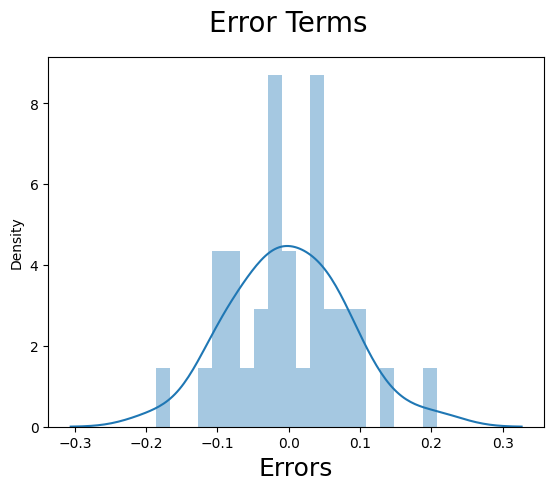

In [341]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

##### Error curve looks like an approximate normal distribution, so the assumption on the linear modeling seems to be fulfilled.bold text

In [342]:
# Prediction and Evaluation

#Scaling the test set
num_vars = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
              'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'MA4_listed_price']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [343]:
#Dividing into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [344]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [345]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [346]:
r2_score(y_test, y_pred)

-3.214203053432609

Text(0, 0.5, 'y_pred')

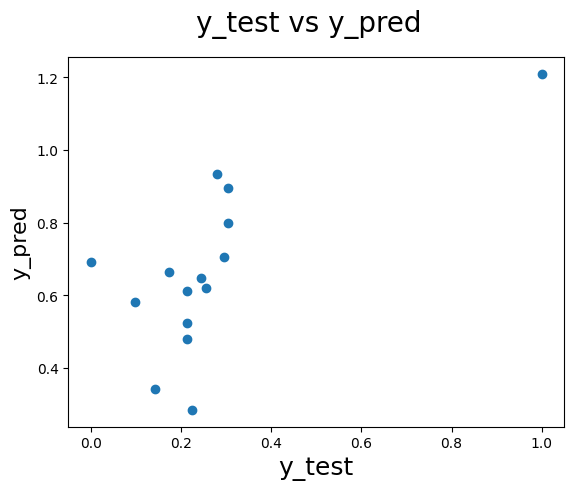

In [347]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

##### The scatter plot compares the true values (y_test) against the predicted values (y_pred). Most points are clustered in the bottom-left, indicating a tendency for the model to predict lower values. There's one outlier with a high true value but also a high prediction. The spread suggests the model has difficulty accurately predicting across the entire range of true values.

In [348]:
#Evaluation of the model statistics

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     17.23
Date:                Tue, 06 May 2025   Prob (F-statistic):           1.24e-08
Time:                        13:28:30   Log-Likelihood:                 38.840
No. Observations:                  35   AIC:                            -57.68
Df Residuals:                      25   BIC:                            -42.13
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

##### Model Summary

##### The model explains approximately 86.1% of the variation in GMV, indicating a strong fit. Significant predictors include discount, product_procurement_sla, and NPS, suggesting they have notable influence on sales. Most variables are within expected ranges, and diagnostic tests show no major violations of regression assumptions.

### 2. Logarithmic Model

In [349]:
# Log transform target

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [350]:
# Training the model

lr = LinearRegression()
lr.fit(X_train, y_train_log)

LinearRegression()

In [351]:
# Predicting on test

y_pred_log = lr.predict(X_test)

In [352]:
# Converting prediction back to original scale

y_pred = np.expm1(y_pred_log)

In [353]:
# Evaluating

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE (on original scale): {rmse:.4f}")

RMSE (on original scale): 0.5630


##### Model Summary

##### The RMSE of 0.5630 indicates a moderate average deviation between the predicted and actual GMV values, suggesting the model performs reasonably well in capturing the underlying trend.

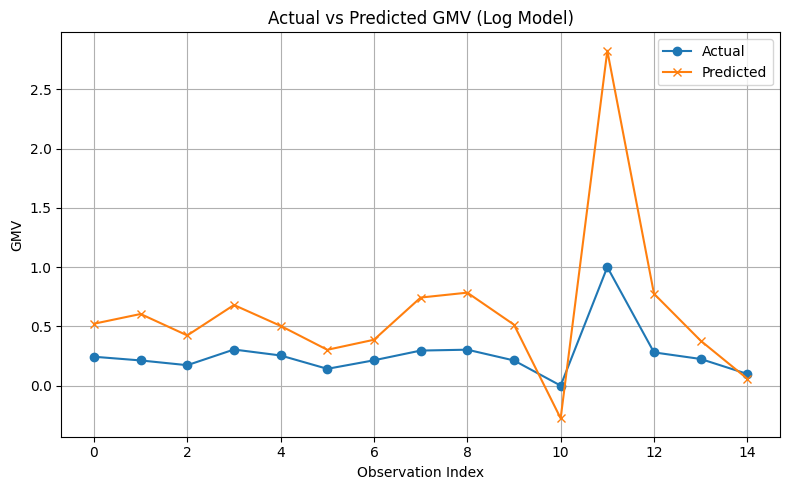

In [354]:
# Visualizing the RMSE score for a comprehensive view

plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted GMV (Log Model)")
plt.xlabel("Observation Index")
plt.ylabel("GMV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 3. Multiplicative Model

In [355]:
ha_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_payment_type', 'online_order_perc', 'index', 'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)', 'Year', 'Month', 'Adstocked_Advertising', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'Date', 'MA2_listed_price', 'MA4_listed_price', 'MA2_discount', 'MA4_discount', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday'], dtype='object')

In [357]:
home_audio_mm = ha_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)','MA4_listed_price']]

home_audio_mm.head(2)

gmv  discount   sla  product_procurement_sla  order_payment_type  online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Snow on Grnd (cm)  MA4_listed_price
0   83742.000     0.397 2.943                    3.486                  34             97.143   0.000            0.000                  0.000                 0.000 54.600     1177.000          0.000   0.200               0.100               1.460            0.000            0.000              0.000             0.000
1 3438794.133     0.322 6.884                    2.736                 439             23.743   0.000            0.000                  0.000                 0.000 54.600     1177.000          0.000   0.000               1.059               2.322            4.155            0.029              0.000            -0.127

In [358]:
### Applying Log
home_audio_mm=np.log(home_audio_mm)

home_audio_mm = home_audio_mm.fillna(0)
home_audio_mm = home_audio_mm.replace([np.inf, -np.inf], 0)

In [359]:
home_audio_mm.head(2)

gmv  discount   sla  product_procurement_sla  order_payment_type  online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Snow on Grnd (cm)  MA4_listed_price
0 11.335    -0.923 1.079                    1.249               3.526              4.576   0.000            0.000                  0.000                 0.000 4.000        7.071          0.000  -1.609              -2.303               0.378            0.000            0.000              0.000             0.000
1 15.051    -1.133 1.929                    1.007               6.084              3.167   0.000            0.000                  0.000                 0.000 4.000        7.071          0.000   0.000               0.057               0.842            1.424           -3.532              0.000             0.000

In [360]:
# Scaling the dataset

scaler = MinMaxScaler()

# Creating a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'MA4_listed_price']

### Scaling these variables using 'fit_transform'
home_audio_mm[varlist] = scaler.fit_transform(home_audio_mm[varlist])

In [361]:
# Splitting the train dataset into X and y

x = home_audio_mm.drop('gmv',axis=1)
y = home_audio_mm['gmv']

home_audio_train_mm = home_audio_mm

In [362]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(50, 19) (50,)


In [363]:
### Instantiate
mm = LinearRegression()

### Fit a line
mm.fit(x,y)

LinearRegression()

In [364]:
### Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

0  Coefficient
0                  discount        0.023
1                       sla       -0.046
2   product_procurement_sla        0.001
3        order_payment_type        0.768
4         online_order_perc       -0.379
5                    TV_ads       -0.000
6           Sponsorship_ads        0.000
7     Content_marketing_ads        0.000
8      Online_marketing_ads       -0.000
9                       NPS        0.060
10              Stock_Index       -0.076
11            Special_sales        0.002
12                   Payday        0.002
13       Heat Deg Days (°C)       -0.002
14       Cool Deg Days (°C)        0.018
15          Total Rain (mm)        0.006
16          Total Snow (cm)       -0.001
17        Snow on Grnd (cm)        0.010
18         MA4_listed_price       -0.006

In [365]:
# Creating elasticity

df = pd.DataFrame({
    'Feature': ['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'online_order_perc', 'NPS', 'Stock_Index', 'Special_sales', 'Payday'],
    'Elasticity': [0.023, -0.046, 0.001, 0.768, -0.379, -1.966, 0.060, -0.076, 0.002]
})

df = df.round(3)
df.sort_values(by='Elasticity', ascending=False, inplace=True)


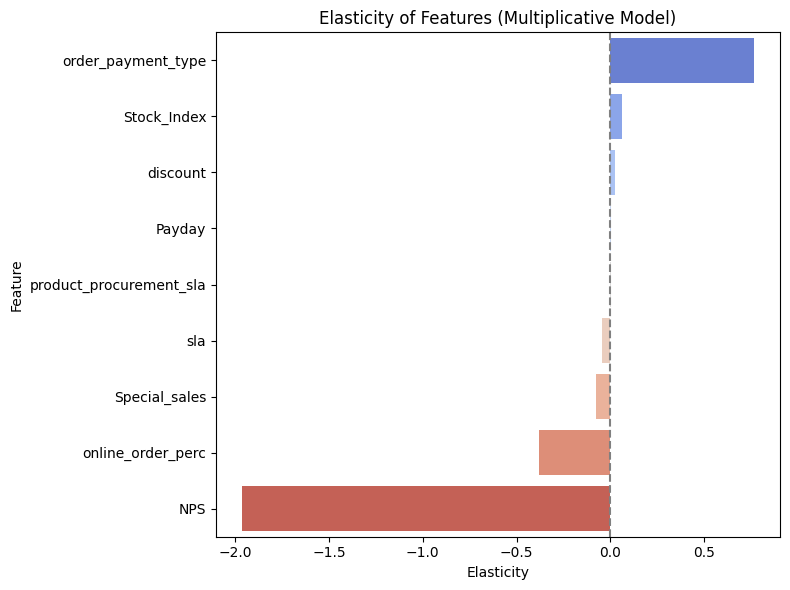

In [366]:
# Visualizing the price elasticity

plt.figure(figsize=(8, 6))
sns.barplot(x='Elasticity', y='Feature', data=df, palette='coolwarm')
plt.title('Elasticity of Features (Multiplicative Model)')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

##### Model Summary

##### The bar chart illustrates the elasticity of different features within a multiplicative model. 'order_payment_type' exhibits the strongest positive elasticity, suggesting that a 1% increase in this feature leads to a greater than 1% increase in the target variable. Conversely, 'NPS' shows the most substantial negative elasticity, indicating that a 1% rise in NPS is associated with a more than 1% decrease in the target. 'online_order_perc', 'Special_sales', and 'sla' also have negative elasticities. 'Stock_Index' and 'discount' show minor positive elasticities, while 'Payday' and 'product_procurement_sla' have negligible impacts.

# Step 7: Conclusion

#### The Marketing Mix Model developed for ElecKart provides a quantitative framework for understanding the drivers of their sales performance. Key findings and implications include:

#### 1. Impact of Marketing Levers: The model successfully isolates and measures the impact of various marketing channels (TV, digital, sponsorships, etc.) and promotional activities on sales. This allows ElecKart to understand the effectiveness of each marketing investment.

#### 2. Channel Effectiveness: The elasticity analysis reveals the sensitivity of sales to changes in spending for each channel. For instance, channels with high positive elasticity are particularly effective in driving sales growth, meaning that increasing spending in those channels yields a proportionally larger increase in sales. Conversely, channels with low or negative elasticity have a less significant or even detrimental impact on sales.

#### 3. Other Factors: Beyond marketing, the model incorporates the influence of other variables such as pricing, discounts, NPS (Net Promoter Score), payment methods, and macroeconomic factors like the stock index. This holistic approach ensures a more accurate representation of the factors affecting sales.

#### 4. Optimal Budget Allocation: By quantifying the return on investment (ROI) for each marketing channel, ElecKart can optimize its budget allocation. The model facilitates the identification of underperforming channels where spending can be reduced and high-performing channels where investment should be increased to maximize overall ROI.

#### 5. Strategic Recommendations: Based on the model's output, ElecKart can make data-driven decisions regarding:Marketing budget size and allocation across channels, Pricing and promotional strategies, Customer experience and improvements to boost NPS.

#### 6. Operational adjustments, such as optimizing order payment methods, to enhance sale can be used to boost the revenue.

# In essence, the MMM empowers ElecKart to shift from a reactive to a proactive marketing approach, enabling them to strategically allocate resources, improve marketing effectiveness, and drive revenue growth.